Import Libraries:

In [1]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
import numpy as np
import random
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches
import seaborn as sns
import duka.app.app as import_ticks_method
from duka.core.utils import TimeFrame
import datetime
import time
import os
# import tensorflow
from sklearn.cluster import KMeans
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from IPython.core.display import display, HTML
from IPython.display import clear_output
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from random import randrange
from pandas.core.common import SettingWithCopyWarning
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from random import randrange
from pandas.core.common import SettingWithCopyWarning
from sklearn import model_selection 
from sklearn.metrics import precision_score
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, TimeDistributed
import keras
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import featuretools as ft
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from random import randrange
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from datetime import date, timedelta
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
import mlflow
import os
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
import scope
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
from numpy import concatenate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

from pandas.core.common import SettingWithCopyWarning
display(HTML("<style>.container { width:100% !important; }</style>")) 

C:\Users\diego.bettega\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)
Using TensorFlow backend.


The object of this notebook is to understand if is possible to use ML to buy/sell currency pairs in the Forex Market.

The dataset has been downloaded from MetaTrader 4 (broker: Axitrader). I am going to work with the EURUSD currency pair.

There are about 2.5 years of data. The interval between each row is 15 minutes. Please see below the first few rows of the datasets:

Check the first rows of a dataset:

In [2]:
def import_and_clean_df(currency):
    '''
    Import and clean the dataset for any given currency
    '''
    df = pd.read_csv(currency+'/'+currency+'.csv')
    df = df.set_index(pd.to_datetime(df['Date'] + ' ' + df['Time']))
    df.drop(['Date','Time'], axis=1, inplace=True)
    df.columns = ['open','high','low','close','volume']
    df = df.sort_index(axis=1)
    columns_order = ['open','high','low','close','volume']
    df = df.reindex(columns=columns_order)
    return(pd.DataFrame(df))



df = import_and_clean_df(currency='EURUSD')
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
df.head()

This dataset has 65000 rows, and 5 columns


open     high      low    close  volume
2017-09-26 07:30:00  1.18568  1.18571  1.18557  1.18567     401
2017-09-26 07:45:00  1.18567  1.18574  1.18533  1.18534     443
2017-09-26 08:00:00  1.18535  1.18539  1.18467  1.18469     661
2017-09-26 08:15:00  1.18470  1.18479  1.18428  1.18448     543
2017-09-26 08:30:00  1.18447  1.18466  1.18377  1.18398     865

- Index: DateTime when the data has been recorded
- open: price recorded at the beginning of the timeframe interval
- high: highest price recorded during the timeframe interval
- low: lowest price recorded during the timeframe interval
- close: price recorded at the end of the timeframe interval
- volume: amount of transactions recorded during the timeframe interval

I could group the data in different timeframes. In this notebook, I am going to analyze the data at 15 minutes, 1 hour, 4 hours and 24 hours timeframe.

In [3]:
def resampler(df, timeframe='1H'):
    """
    param timeframe: periods for which to resample the data: '1H', '4H', '24H'
    return: dataframe resampled
    """
    
    df['day'] = df.index.date
    df['hour'] = df.index.hour

    if timeframe =='4H':
        df['hour'] = np.where(df['hour']<=3, 0, 
                     np.where((df['hour']>3) & (df['hour']<=7), 4, 
                     np.where((df['hour']>7) & (df['hour']<=11), 8,
                     np.where((df['hour']>11) & (df['hour']<=15), 12,
                     np.where((df['hour']>15) & (df['hour']<=19), 16,
                               20)))))
    elif timeframe == '24H':
        df['hour'] = 0

    df_resampled = df.groupby(['day','hour']).agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'})
    df_resampled = pd.DataFrame(df_resampled.to_records())
    df_resampled = df_resampled.set_index(pd.to_datetime(df_resampled['day']) + pd.to_timedelta(df_resampled.copy().pop('hour'), unit='H'))
    df_resampled.drop(['day','hour'], axis=1, inplace=True)
    return(df_resampled)


df = import_and_clean_df(currency='EURUSD')
df_1H = resampler(df, timeframe='1H')
print('EURUSD resampled using 1 Hour timeframe')
df_1H.head()

EURUSD resampled using 1 Hour timeframe


open     high      low    close  volume
2017-09-26 07:00:00  1.18568  1.18574  1.18533  1.18534     844
2017-09-26 08:00:00  1.18535  1.18539  1.18361  1.18409    3053
2017-09-26 09:00:00  1.18411  1.18591  1.18399  1.18463    5629
2017-09-26 10:00:00  1.18463  1.18464  1.18106  1.18127    9230
2017-09-26 11:00:00  1.18124  1.18192  1.18099  1.18171    5275

Please see below a visualizations of the closing price and volume of the datasets.

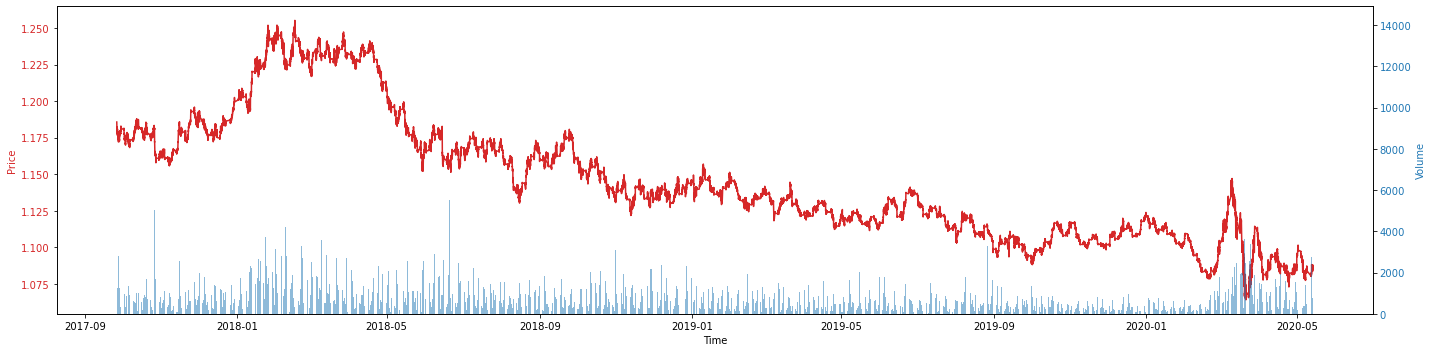

In [4]:
def visualize_datasets(currency):
    
    df = import_and_clean_df(currency)
    fig, ax1 = plt.subplots(figsize=(20, 5))

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Price', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.plot(df.index, df['close'], color='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Volume', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.bar(df.index, df['volume'], color='tab:blue', alpha=0.5, width=0.01)
    fig.tight_layout()
    plt.show()
    
    
    
visualize_datasets(currency='EURUSD')

The goal of the entire project is to generate a new column 'signal':
- 1: buy signal
- -1: sell signal
- 0: no action

At the moment, I can create a random signal, which has a 10% probability to signal 'buy', 10% to signal 'sell' and 80% to not submit any actions:

In [8]:
def random_signal(df):
    '''
    Append a random signal to the dataset.
    '''  
    df['random'] = np.random.randint(0,10, size=len(df))
    df['signal'] = np.where(df['random']==9, 1,
                   np.where(df['random']==0, -1,
                            0))
    df.drop('random', axis=1, inplace=True)
    return(df)



df = import_and_clean_df(currency='EURUSD')
df = random_signal(df)
df.head()

open     high      low    close  volume  signal
2017-09-26 07:30:00  1.18568  1.18571  1.18557  1.18567     401      -1
2017-09-26 07:45:00  1.18567  1.18574  1.18533  1.18534     443       1
2017-09-26 08:00:00  1.18535  1.18539  1.18467  1.18469     661       0
2017-09-26 08:15:00  1.18470  1.18479  1.18428  1.18448     543       0
2017-09-26 08:30:00  1.18447  1.18466  1.18377  1.18398     865       0

Every time I decide to buy/sell a currency, I need to set up also stop loss & take profit levels. The following function appends:
- Stop Loss Buy: limit of losses if I decide to buy the currency
- Take Profit Buy: limit of profits if I decide to buy the currency
- Stop Loss Sell: limit of losses if I decide to sell the currency
- Take Profit Sell: limit of profits if I decide to sell the currency

This strategy is based on the the voltility of the price. Higher the volatility, larger is the difference between these levels (and viceversa).

In [5]:
def set_sl_tp(df, periods=24, N=1.5, ratio=2):
    '''
    Set the Stop Loss and Take Profit for buy and sell orders
    periods: periods to use to calculate the ATR
    N: number of ATRs away from the closing price
    ratio: win/lose ratio
    '''             
    TRs = [df['high'].values[0]-df['low'].values[0]]
    
    for j in range(1,len(df)):
        TR = max(df['high'].values[j]-df['low'].values[j],
                 abs(df['high'].values[j]-df['close'].values[j-1]),
                 abs(df['low'].values[j]-df['close'].values[j-1]))
        TRs = np.append(TRs,TR)

    ATRs = np.zeros(periods-1)
    ATRs[ATRs == 0] = np.NaN
    ATRs = np.append(ATRs, sum(TRs[0:periods])/len(TRs[0:periods]))
    
    for j in range(periods, (len(df))):
        ATR = (ATRs[-1]*(periods-1)+TRs[j])/periods
        ATRs = np.append(ATRs, ATR)
    df['atr'] = ATRs
    df = df.dropna(axis=0)
    
    df['sl_buy'] = df['close'] - N*df['atr']
    df['tp_buy'] = df['close'] + N*ratio*df['atr']
    df['sl_sell'] = df['close'] + N*df['atr'] 
    df['tp_sell'] = df['close'] - N*ratio*df['atr']
    df.drop(['atr'], axis=1, inplace=True)
    return(df)



df = import_and_clean_df(currency='EURUSD')
df = set_sl_tp(df)
df.head()

open     high      low    close  volume    sl_buy  \
2017-09-26 13:15:00  1.18050  1.18055  1.17936  1.17979    1903  1.178401   
2017-09-26 13:30:00  1.17977  1.17994  1.17903  1.17950    1526  1.178112   
2017-09-26 13:45:00  1.17950  1.17950  1.17858  1.17898    1454  1.177593   
2017-09-26 14:00:00  1.17898  1.17944  1.17870  1.17936    1463  1.177984   
2017-09-26 14:15:00  1.17935  1.17978  1.17935  1.17957    1081  1.178225   

                       tp_buy   sl_sell   tp_sell  
2017-09-26 13:15:00  1.182567  1.181179  1.177012  
2017-09-26 13:30:00  1.182276  1.180888  1.176724  
2017-09-26 13:45:00  1.181755  1.180367  1.176205  
2017-09-26 14:00:00  1.182112  1.180736  1.176608  
2017-09-26 14:15:00  1.182261  1.180915  1.176879

The risk-reward ratio is 2. It means that the abs difference between the entrance and the take profit is 2 times larger compared to the abs difference between the entrance and the stop loss.

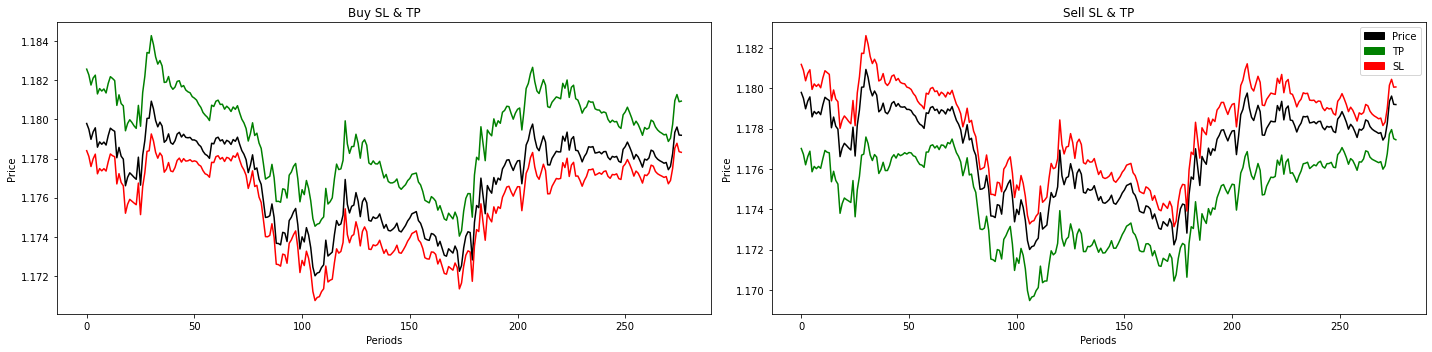

In [9]:
def visualize_sl_tp(currency='EURUSD'):
    
    df = import_and_clean_df(currency)
    df = df[:300]
    df = set_sl_tp(df)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    ax1.set_title('Buy SL & TP')
    ax1.set_xlabel('Periods')
    ax1.set_ylabel('Price')
    ax1.plot(np.arange(0,len(df)), df['close'], color='black')
    ax1.plot(np.arange(0,len(df)), df['tp_buy'], color='green')
    ax1.plot(np.arange(0,len(df)), df['sl_buy'], color='red')

    ax2.set_title('Sell SL & TP')
    ax2.set_xlabel('Periods')
    ax2.set_ylabel('Price')
    ax2.plot(np.arange(0,len(df)), df['close'], color='black')
    ax2.plot(np.arange(0,len(df)), df['tp_sell'], color='green')
    ax2.plot(np.arange(0,len(df)), df['sl_sell'], color='red')
    
    black_patch = mpatches.Patch(color='black', label='Price')
    green_patch = mpatches.Patch(color='green', label='TP')
    red_patch = mpatches.Patch(color='red', label='SL')
    plt.legend(handles=[black_patch, green_patch, red_patch])

    fig.tight_layout()
    plt.show()
    
    
    
visualize_sl_tp()

A question would be to undestand how many periods on average are needed to hit a profit:

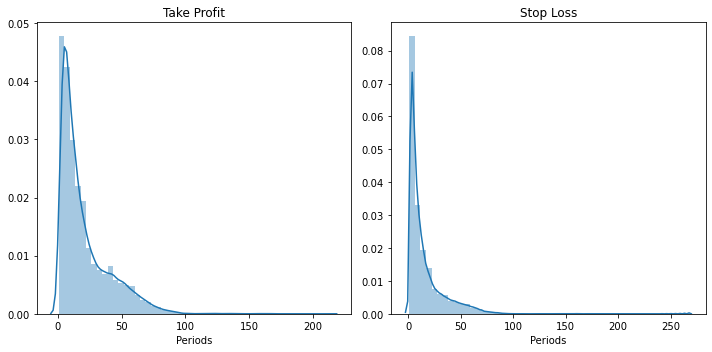

50% of the Take Profit are hitted within 13 periods
50% of the Stop Loss are hitted within 8 periods


In [76]:
def periods_TP_SL(currency='EURUSD'):
    
    df = import_and_clean_df(currency)
    df = set_sl_tp(df)

    tp_buy = []
    sl_buy = []
    for i in range(0,len(df)):
        n=0
        stop=False
        while stop==False:
            n += 1
            if i+n >= len(df):
                break 
            else:
                stop = (df['high'].values[i+n]>df['tp_buy'].values[i] or df['low'].values[i+n]<df['sl_buy'].values[i])
                if stop==True:
                    if df['high'].values[i+n]>df['tp_buy'].values[i]:
                        tp_buy.append(n)
                    elif df['low'].values[i+n]<df['sl_buy'].values[i]:
                        sl_buy.append(n)
                    break

    tp_sell = []
    sl_sell = []
    for i in range(0,len(df)):
        n=0
        stop=False
        while stop==False:
            n += 1
            if i+n >= len(df):
                break 
            else:
                stop = (df['high'].values[i+n]>df['sl_sell'].values[i] or df['low'].values[i+n]<df['tp_sell'].values[i])
                if stop==True:
                    if df['high'].values[i+n]>df['sl_sell'].values[i]:
                        sl_sell.append(n)
                    elif df['low'].values[i+n]<df['tp_sell'].values[i]:
                        tp_sell.append(n)
                    break

    tp = tp_buy + tp_sell
    sl = sl_buy + sl_sell

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.set_title('Take Profit')
    ax1.set_xlabel('Periods')
    sns.distplot(tp, ax=ax1)

    ax2.set_title('Stop Loss')
    ax2.set_xlabel('Periods')
    sns.distplot(sl, ax=ax2)

    fig.tight_layout()
    plt.show()

    print('50% of the Take Profit are hitted within {} periods'.format(int(np.percentile(tp, 50))))
    print('50% of the Stop Loss are hitted within {} periods'.format(int(np.percentile(sl, 50))))
    
    
    
periods_TP_SL()

This means that I need to focus my analysis to predict the price within about N = 10 periods ahead.

The random signal defined earlier has been added to create a back-testing engine: the purpose of the function is to understand how much prifit/loss I'd generate by running the strategy ('signal') on past data.

In [10]:
def backtest(df, start_balance=1000, bid_percentage=0.05, steps=100, spread=0, delay=0, plot=True, print_results=True):
    '''
    Set the Stop Loss and Take Profit for buy and sell orders
    start_balance: The inital balance on your account
    bid_percentage: the percentage of the balance you wish to bid for every trade
    steps: Max number of steps to visualize on the x axis
    spread: the amunt of pips lost on evert trade
    delay: to make the live visualization slower
    plot: Set to True to plot the visualisation
    print_results: to print the results of the back-test
    '''    
    i = 1
    c = 0
    pips = [0]
    balances = [start_balance]
    accs = [np.nan]
    pos_count = 0
    neg_count = 0
    live_orders = [0]
    tot_orders = [0]
    entrances = [np.nan]
    exits = [np.nan]
    set_tp_buys = [np.nan]
    set_sl_buys = [np.nan]
    set_sl_sells = [np.nan]
    set_tp_sells = [np.nan]

    while i<len(df):

        set_tp_buy = set_tp_buys[-1]
        set_sl_buy = set_sl_buys[-1]
        set_sl_sell = set_sl_sells[-1]
        set_tp_sell = set_tp_sells[-1]
        tot_order = tot_orders[-1]
        exit = np.nan


        if live_orders[-1]==0:
            live_order = df['signal'].values[i-1] 
            entrance = entrances[-1]
            if df['signal'].values[i-1]==1:
                set_tp_buy = df['tp_buy'].values[i-1]
                set_sl_buy = df['sl_buy'].values[i-1]
                c += 1
                tot_order = c
                entrance = df['open'].values[i]
            elif df['signal'].values[i-1]==-1:
                set_sl_sell = df['sl_sell'].values[i-1]
                set_tp_sell = df['tp_sell'].values[i-1]
                c += 1
                tot_order = c
                entrance = df['open'].values[i]


        elif live_orders[-1]==1:
            entrance = entrances[-1]

            if df['high'].values[i-1]>=set_tp_buy:
                live_order = df['signal'].values[i-1]
                exit=set_tp_buy
                set_sl_buy = np.nan
                set_tp_buy = np.nan
                entrance = np.nan
                if live_order==1:
                    set_tp_buy = df['tp_buy'].values[i-1]
                    set_sl_buy = df['sl_buy'].values[i-1] 
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]
                elif live_order==-1:
                    set_sl_sell = df['sl_sell'].values[i-1]
                    set_tp_sell = df['tp_sell'].values[i-1]
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]

            elif df['low'].values[i-1]<=set_sl_buy:
                live_order = df['signal'].values[i-1] 
                exit=set_sl_buy
                set_sl_buy = np.nan
                set_tp_buy = np.nan
                entrance = np.nan
                if live_order==1:
                    set_tp_buy = df['tp_buy'].values[i-1]
                    set_sl_buy = df['sl_buy'].values[i-1]   
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]
                elif live_order==-1:
                    set_sl_sell = df['sl_sell'].values[i-1]
                    set_tp_sell = df['tp_sell'].values[i-1]
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]

            else:
                live_order = live_orders[-1]


        elif live_orders[-1]==-1:
            entrance = entrances[-1]

            if df['high'].values[i-1]>=set_sl_sell:
                live_order = df['signal'].values[i-1]
                exit=set_sl_sell
                set_sl_sell = np.nan
                set_tp_sell = np.nan
                entrance = np.nan
                if live_order==1:
                    set_tp_buy = df['tp_buy'].values[i-1]
                    set_sl_buy = df['sl_buy'].values[i-1]  
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]
                elif live_order==-1:
                    set_sl_sell = df['sl_sell'].values[i-1]
                    set_tp_sell = df['tp_sell'].values[i-1]
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]

            elif df['low'].values[i-1]<=set_tp_sell:
                live_order = df['signal'].values[i-1] 
                exit = set_tp_sell
                set_sl_sell = np.nan
                set_tp_sell = np.nan
                entrance = np.nan
                if live_order==1:
                    set_tp_buy = df['tp_buy'].values[i-1]
                    set_sl_buy = df['sl_buy'].values[i-1] 
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]
                elif live_order==-1:
                    set_sl_sell = df['sl_sell'].values[i-1]
                    set_tp_sell = df['tp_sell'].values[i-1]
                    c += 1
                    tot_order = c
                    entrance = df['open'].values[i]

            else:
                live_order = live_orders[-1]


        if  np.isnan(exit):
            pip = pips[-1]
            balance = balances[-1]
        else:
            if live_orders[-1]==1:
                pip = pips[-1] + 10000*(exit - entrances[-1]) - spread
                if exit>entrances[-1]:
                    balance = balances[-1] * (1 + ((10000*abs(exit - entrances[-1])-spread) * (bid_percentage/(10000*abs(set_sl_buys[-1] - entrances[-1])))))
                    pos_count += 1
                elif exit<entrances[-1]:
                    balance = balances[-1] * (1 - (bid_percentage + (spread * (bid_percentage/(10000*abs(exit - entrances[-1]))))))
                    neg_count += 1
                else:
                    balance = balances[-1]
            elif live_orders[-1]==-1:
                pip = pips[-1] + 10000*(entrances[-1] - exit) - spread
                if exit>entrances[-1]:
                    balance = balances[-1] * (1 - (bid_percentage + (spread * (bid_percentage/(10000*abs(exit - entrances[-1])))))) 
                    neg_count += 1
                elif exit<entrances[-1]:
                    balance = balances[-1] * (1 + ((10000*abs(exit - entrances[-1])-spread) * (bid_percentage/(10000*abs(set_sl_sells[-1] - entrances[-1])))))
                    pos_count += 1
                else:
                    balance = balances[-1]
        if (pos_count+neg_count)>0:
            acc = pos_count/(pos_count+neg_count)
        else:
            acc = accs[-1]

        live_orders.append(live_order)
        tot_orders.append(tot_order)
        entrances.append(entrance)
        exits.append(exit)
        pips.append(pip)
        balances.append(balance)
        accs.append(acc)
        set_tp_buys.append(set_tp_buy)
        set_sl_buys.append(set_sl_buy)
        set_sl_sells.append(set_sl_sell)
        set_tp_sells.append(set_tp_sell)
        i += 1

    df['live_order'] = live_orders
    df['tot_order'] = tot_orders
    df['set_tp_buy'] = set_tp_buys
    df['set_sl_buy'] = set_sl_buys
    df['set_sl_sell'] = set_sl_sells
    df['set_tp_sell'] = set_tp_sells
    df['entrance'] = entrances
    df['exit'] = exits
    df['pip'] = pips
    df['balance'] = balances
    df['accuracy'] = accs
    
    
    if plot==True: # https://mikepapinski.github.io/python/forex/2019/11/01/Forex-Python-Candlestick-Chart-Animated_copy.html
        %matplotlib notebook 
        fig = plt.figure(figsize=(17,5))
        ax = plt.subplot2grid((1,1), (0,0))
        plt.ion()

        fig.show()
        fig.canvas.draw()

        c = 0
        
        for candle in range(0,len(df)):
            candles_to_show = df[0:candle] 
            ohlc_counter = range(len(candles_to_show['open']))
            ohlc = []
            ys = []
            for ohlc_item in ohlc_counter:
                append_me = ohlc_counter[ohlc_item], \
                            candles_to_show['open'][ohlc_item], \
                            candles_to_show['high'][ohlc_item],  \
                            candles_to_show['low'][ohlc_item], \
                            candles_to_show['close'][ohlc_item]
                ohlc.append(append_me)
                ys.append(ohlc_counter[ohlc_item])
                ohlc = ohlc[-steps:]
                ys = ys[-steps:]
            ax.clear() 
            candlestick_ohlc(ax, ohlc, width=0.4, 
                             colorup='#BDBDBD', 
                             colordown='#000000')

            plt.scatter(ys, df['set_tp_buy'].values[0:c][-steps:], linewidth=1, color='green', marker='o', s=10)
            plt.scatter(ys, df['set_sl_buy'].values[0:c][-steps:], linewidth=1, color='red', marker='o', s=10)
            plt.scatter(ys, df['set_sl_sell'].values[0:c][-steps:], linewidth=1, color='red', marker='o', s=10)
            plt.scatter(ys, df['set_tp_sell'].values[0:c][-steps:], linewidth=1, color='green', marker='o', s=10)

            for label in ax.xaxis.get_ticklabels():
                label.set_rotation(45)
                
            ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
            ax.grid(True)
            plt.grid(False)
            plt.xlabel('Candle count')
            plt.ylabel('Price')
            plt.title('Candlestick chart simulation')
            plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
            fig.canvas.draw()
            time.sleep(delay)
            print('Order={}     Pips={}     Balance={}     Accuracy={}'.format(tot_orders[c], int(pips[c]), int(balances[c]), str(float(round((100*accs[c]),1)))+'%'), end="\r")
            c += 1
            

    if plot!=True and print_results==True:
        print('Total Orders =', tot_orders[-1])
        print('Total Pips =', int(pips[-1]))
        print('Final Balance =', int(balances[-1]))
        print('Final Accuracy =', str(float(round((100*accs[-1]),1)))+'%')
        
    return(df, tot_orders[-1], int(pips[-1]), int(balances[-1]), (accs[-1]))

I can run a similtion of the first 150 rows. The dotted lines represent the Stop Loss and Take Profit levels.

<IPython.core.display.Javascript object>


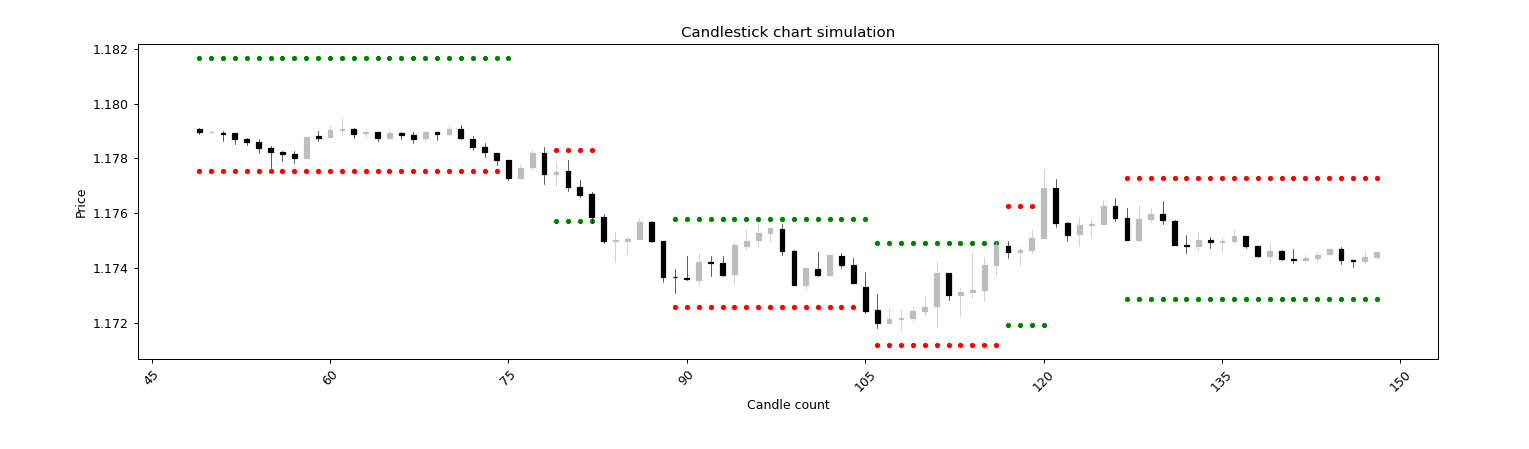

In [79]:
df = import_and_clean_df(currency='EURUSD')
df = set_sl_tp(df)
df = random_signal(df)
df, orders, pips, balances, accs = backtest(df[:150], spread=0, delay=0, plot=True)

The traditional approach of the financial market is to combine financial indicators to generate the signal. I can run some tests on multiple currency pair and see if they works.

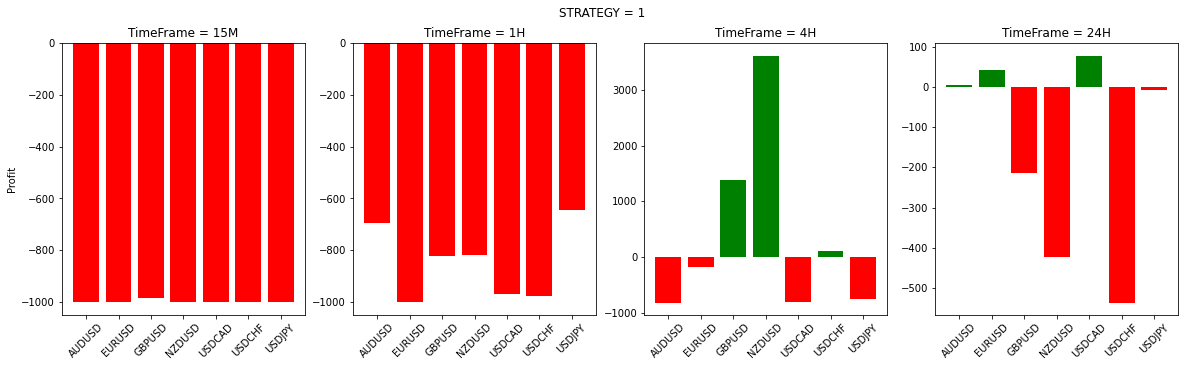

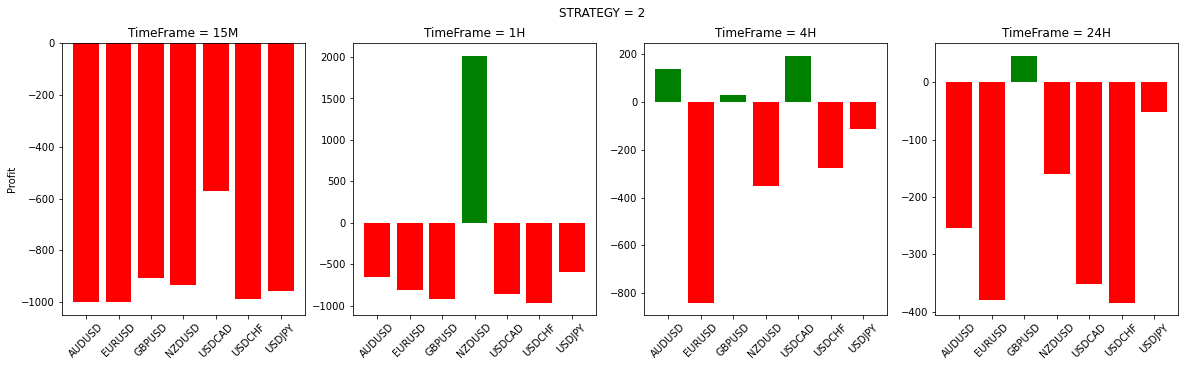

In [11]:
def signal_macd(df, strategy):  
    '''
    Append the signal based on the MACD
    '''
    EMA1 = df['close'].ewm(span=12).mean()
    EMA2 = df['close'].ewm(span=26).mean()
    MACD = EMA1-EMA2
    SigMACD = MACD.ewm(span=9).mean()
    tp_SigMACD = MACD.ewm(span=5).mean()
    val = pd.concat((MACD,SigMACD,tp_SigMACD), axis=1)
    val.columns = ['macd','sig_macd','tp_sig_macd']
    df = pd.concat([df,val], axis=1)
    df['hist_macd'] = df['macd'].values-df['sig_macd'].values
    
    if strategy==1:
        signal = [0]
        for i in range(1,len(df)):
            if df['hist_macd'].values[i]>0 and df['hist_macd'].values[i-1]<0:
                signal.append(1)
            elif df['hist_macd'].values[i]<0 and df['hist_macd'].values[i-1]>0:
                signal.append(-1)
            else:
                signal.append(0)
    
    if strategy==2:
        signal = [0]
        for i in range(1,len(df)):
            if (df['hist_macd'].values[i]>df['tp_sig_macd'].values[i] and \
                df['hist_macd'].values[i-1]<df['tp_sig_macd'].values[i-1]):
                signal.append(1)
            elif (df['hist_macd'].values[i]<df['tp_sig_macd'].values[i] and \
                  df['hist_macd'].values[i-1]>df['tp_sig_macd'].values[i-1]):
                signal.append(-1)
            else:
                signal.append(0)
                

    df['signal'] = signal
    df.drop(['macd','sig_macd','hist_macd','tp_sig_macd'], axis=1, inplace=True)
    return(df)


def visualize_results(strategy):
    PLs = []
    timeframes = ['15M', '1H', '4H', '24H']
    for timeframe in timeframes:

        PL = []
        currencies = ['AUDUSD','EURUSD','GBPUSD','NZDUSD','USDCAD','USDCHF','USDJPY']
        for currency in currencies:
            df = import_and_clean_df(currency)
            if timeframe!='15M':
                df = resampler(df, timeframe)
            df = set_sl_tp(df)
            df = signal_macd(df, strategy)
            df, orders, pips, balances, accs = backtest(df, spread=0, plot=False, start_balance=1000, print_results=False)
            pl = balances-1000
            PL.append(pl)
        PLs.append(PL)


    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    
    fig.suptitle('STRATEGY = {}'.format(strategy))

    index=0
    ax = ax1
    ax.set_title('TimeFrame = {}'.format(timeframes[index]))
    ax.bar(currencies, PLs[index], color=['green' if (x>0) else 'red' for x in PLs[index]])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.set_ylabel('Profit')

    index += 1
    ax = ax2
    ax.set_title('TimeFrame = {}'.format(timeframes[index]))
    ax.bar(currencies, PLs[index], color=['green' if (x>0) else 'red' for x in PLs[index]])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    index += 1
    ax = ax3
    ax.set_title('TimeFrame = {}'.format(timeframes[index]))
    ax.bar(currencies, PLs[index], color=['green' if (x>0) else 'red' for x in PLs[index]])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    index += 1
    ax = ax4
    ax.set_title('TimeFrame = {}'.format(timeframes[index]))
    ax.bar(currencies, PLs[index], color=['green' if (x>0) else 'red' for x in PLs[index]])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.show()
    
    
visualize_results(strategy=1)
visualize_results(strategy=2)

I am also trying to lavarage ML to create this 'signal'. I created many new financial indicators. Most of these new features are calculated taking in consideration the price/volume of the previous N periods. Sometimes I used the 'standard' (commonly used in the industry) periods, sometimes I used multiple periods to capture more informations.

- Hour of the Day
- Day of the Week
- Day of the Month
- Momentum: identifies when the price is moving upward or downward and how strongly [4, 12, 24]
- Bollinger Bands: used to measure a market’s volatility
- MACD: identifies moving averages that indicate a new trend
- Stochastic Oscillator: speed or velocity of price changes [4, 14, 24]
- Williams Oscillator: momentum indicator to detecet when the pair might be “overbought” or “oversold”. Think of it as a less popular and more sensitive version of Stochastic [4, 14, 24]
- Price Rate Of Change: momentum indicator that measures the percentage change in price between the current price and the price a certain number of periods before [4, 12, 24]
- William Accumulation Distribution: cumulative indicator that uses volume and price to assess whether a currency is being accumulated or distributed
- Accumulation Distribution Oscillator: to provide insight about the strenght of the trend [4, 12, 24]
- Relative Strength Index: to evaluate the strength of the current market [4, 12, 24]
- Average True Range: to identify the market volatility
- Average Directional Index: to identify whether the market is ranging or starting a new trend [4, 14, 24]
- Commodity Channel Index: to identify overbought and oversold levels
- Price Averages [2, 4, 12]
- Slope: help to undestand direction and slope of the trend [4, 12, 24, 48]
- Fourier Series Coefficient Calculator Funcion [10, 20, 30]
- Sine Series Coefficient Calculator Funcion [4, 12]
- Japanese Candlestick Patterns: method of visualising charts
- Heiken ashi OHLC candles: charting technique used to display prices that, at a glance, looks similar to a traditional Japanese candlestick chart
- Ichimoku Kinko Hyo: to determine future areas of support and resistance
- Harmonic Patterns: they help to spot possible retracements of recent trends

I removed the outliers and normalised the distributions of all the new fatures (using the 'f_distribution' function):

In [13]:
def f_distribution(df, f, calculate_mean=False, outliers=3):
    '''
    Remove the outliers and normalise the distribution
    '''  
    f = str(f)
    std = df[f].std()
    if calculate_mean==True:
        mean = df[f].mean()
    else:
        mean=0
    df[f] = (df[f] - mean) / std
    df[f] = df[f].clip(-outliers*df[f].std(), outliers*df[f].std())
    if f=='bol_upper' or f=='HA_high':
        df[f] = (df[f])/(outliers)
    elif f=='bol_lower' or f=='HA_low':
        df[f] = (df[f])/(outliers) + 1
    else:
        df[f] = (df[f]+outliers)/(2*outliers)
    return(df[f])



def hour(df):
    '''
    Append the Hour of the Day.
    ''' 
    df['hour'] = df.index.hour/23
    return(df)



def dow(df):
    '''
    Append the Day of the Week.
    ''' 
    df['dow'] = df.index.dayofweek/4
    return(df)



def dom(df):
    '''
    Append the Day of the Month.
    ''' 
    df['dom'] = (df.index.day-1)/30
    return(df)



def day(df):
    '''
    Append the Date.
    ''' 
    df['day'] = df.index.date
    return(df)
    
    

def momentum(df,periods):
    '''
    Momentum.
    '''     
    for c in ['close','open']:
        header = str(c+'_momentum_'+str(periods))
        df[header] = (df[c] - df[c].shift(periods))/df[c].shift(periods)
        df[header] = f_distribution(df, header)
    return(df)



def bollinger(df,periods=20,deviations=2):
    '''
    Append the Bollinger Bands: used to measure a market’s volatility.
    '''
    std = df['close'].rolling(periods).std()
    mid = df['close'].rolling(periods).mean()
    df['bol_upper'] = ((mid+deviations*std-df['close'])/df['close'])
    df['bol_upper'] = f_distribution(df, 'bol_upper', outliers=4)
    df['bol_mid'] = (df['close'].rolling(periods).mean()-df['close'])/df['close']
    df['bol_mid'] = f_distribution(df, 'bol_mid', calculate_mean=False)
    df['bol_lower'] = ((mid-deviations*std-df['close'])/df['close'])
    df['bol_lower'] = f_distribution(df, 'bol_lower', outliers=4)
    return(df)



def macd(df):  
    '''
    Append the MACD: identifies moving averages that indicate a new trend.
    '''
    EMA1 = df['close'].ewm(span=12).mean()
    EMA2 = df['close'].ewm(span=26).mean()
    MACD = EMA1-EMA2
    SigMACD = MACD.ewm(span=9).mean()
    df['macd'] = MACD
    df['sig_macd'] = SigMACD
    df['hist_macd'] = df['macd'].values-df['sig_macd'].values
    for f in ('macd','sig_macd','hist_macd'):
        df[f] = f_distribution(df, f)
    return(df)



def stochastic(df,periods):
    '''
    Stochastic Oscillator: speed or velocity of price changes.
    '''           
    Ks = np.zeros(periods-1)
    Ks[Ks == 0] = np.NaN
    
    for j in range(periods-1,len(df)):
        C = df['close'].values[j]
        H = df['high'].values[j+1-periods:j+1].max()
        L = df['low'].values[j+1-periods:j+1].min()
        if H == L:
            K = 0
        else:
            K = 100*(C-L)/(H-L)
        Ks = np.append(Ks,K)

    df['stoch_'+str(periods)] = Ks/100
    return(df)



def williams(df,periods):
    '''
    Williams Oscillator: momentum indicator to detecet when the pair might be “overbought” or “oversold”. Think of it as a less popular and more sensitive version of Stochastic.
    '''           
    Rs = np.zeros(periods-1)
    Rs[Rs == 0] = np.NaN
    
    for j in range(periods-1,len(df)):
        C = df['close'].values[j]
        H = df['high'].values[j+1-periods:j+1].max()
        L = df['low'].values[j+1-periods:j+1].min()
        if H == L:
            R = 0
        else:
            R = -100*(H-C)/(H-L)
        Rs = np.append(Rs,R)

    df['wil_'+str(periods)] = (Rs+100)/100
    return(df)



def proc(df,periods):
    '''
    Price Rate Of Change: momentum indicator that measures the percentage change in price between the current price and the price a certain number of periods before.
    '''           
    proc = (df['close']-df['close'].shift(int(periods)))/(df['close'].shift(int(periods)))
    df['proc_'+str(periods)] = proc
    df['proc_'+str(periods)] = f_distribution(df, 'proc_'+str(periods))
    return(df)



def wad(df, periods):
    '''
    William Accumulation Distribution: cumulative indicator that uses volume and price to assess whether a price is being accumulated or distributed.
    '''
    WAD = [0]

    for j in range(1, len(df)):
        TRH = np.array([df['high'].values[j],df['close'].values[j-1]]).max()
        TRL = np.array([df['low'].values[j],df['close'].values[j-1]]).min()
        if df['close'].values[j] > df['close'].values[j-1]:
            PM = df['close'].values[j] - TRL
        elif df['close'].values[j] < df['close'].values[j-1]:
            PM = df['close'].values[j] - TRH
        else:
            PM = 0
        AD = PM * df['volume'].values[j]
        WAD = np.append(WAD,AD)

    WAD = WAD.cumsum()
    df['wad_'+str(periods)] = WAD
    df['wad_'+str(periods)] = df['wad_'+str(periods)].rolling(int(periods)).mean()
    df['wad_'+str(periods)] = f_distribution(df, 'wad_'+str(periods))
    return(df)



def adosc(df,periods):
    '''
    Accumulation Distribution Oscillator.
    '''           

    AD = np.zeros(periods-1)

    for j in range(periods-1,len(df)):
        C = df['close'].values[j]
        H = df['high'].values[j+1-periods:j+1].max()
        L = df['low'].values[j+1-periods:j+1].min()
        V = df['volume'].values[j+1-periods:j+1].sum()
        if H == L or j+1<periods:
            CMVF = 0
        else:
            CMVF = V*(((C-L)-(H-C))/(H-L))
        if j == 0:
            AD = np.append(AD,(CMVF))
        else:
            AD = np.append(AD,(CMVF+AD[-1]))

    df['ado_'+str(periods)] = AD
    df['ado_'+str(periods)].values[:periods-1] = np.NaN
    df['ado_'+str(periods)] = f_distribution(df, 'ado_'+str(periods))
    return(df)



def strength(df,periods):
    '''
    Relative Strength Index: to evaluate the strength of the current market.
    '''              
    Gs = []
    Ls = []

    for j in range(0,len(df)):
        if df['close'].values[j]>df['close'].values[j-1] and j!=0:
            G = df['close'].values[j]-df['close'].values[j-1]
            L = 0
        elif df['close'].values[j]<df['close'].values[j-1] and j!=0:
            G = 0
            L = abs(df['close'].values[j]-df['close'].values[j-1])
        else:
            G = 0
            L = 0
        Gs = np.append(Gs,G)
        Ls = np.append(Ls,L)
    
    df['Gs'] = Gs
    df['Ls'] = Ls
    
    avgGs = []
    avgLs = []
    
    for j in range(0,len(df)):
        if j<periods:
            avgG = np.NaN
            avgL = np.NaN            
        elif j==periods:
            avgG = df['Gs'].rolling(periods).mean()[j]
            avgL = df['Ls'].rolling(periods).mean()[j]
        else:
            avgG = ((avgGs[-1]*(periods-1))+df['Gs'].values[j])/periods
            avgL = ((avgLs[-1]*(periods-1))+df['Ls'].values[j])/periods
        avgGs = np.append(avgGs,avgG)
        avgLs = np.append(avgLs,avgL)
        
    df['avgG'] = avgGs
    df['avgL'] = avgLs
    df['rsi_'+str(periods)] = (np.where((1+(df['avgG'].values/df['avgL'].values))==0,100,(100-(100/(1+(df['avgG'].values/df['avgL'].values))))))/100
    df.drop(['Gs','Ls','avgG','avgL'], axis=1, inplace=True)
    return(df)
    
    
    
def atr(df,periods):
    '''
    Average True Range: to identify the market volatility.
    '''             
    TRs = [df['high'].values[0]-df['low'].values[0]]
    
    for j in range(1,len(df)):
        TR = max(df['high'].values[j]-df['low'].values[j],
                 abs(df['high'].values[j]-df['close'].values[j-1]),
                 abs(df['low'].values[j]-df['close'].values[j-1]))
        TRs = np.append(TRs,TR)

    ATRs = np.zeros(periods-1)
    ATRs[ATRs == 0] = np.NaN
    ATRs = np.append(ATRs, sum(TRs[0:periods])/len(TRs[0:periods]))
    
    for j in range(periods, (len(df))):
        ATR = (ATRs[-1]*(periods-1)+TRs[j])/periods
        ATRs = np.append(ATRs, ATR)
     
    df['atr_'+str(periods)] = ATRs
    df['atr_'+str(periods)] = f_distribution(df, 'atr_'+str(periods), calculate_mean=True)
    return(df)



def adx(df,periods):
    '''
    Average Directional Index: to identify whether the market is ranging or starting a new trend.
    '''           
    
    TRs = [np.NaN]
    PDMs = [np.NaN]
    NDMs = [np.NaN]

    for j in range(1,len(df)):
        TR = max(df['high'].values[j]-df['low'].values[j],
                 abs(df['high'].values[j]-df['close'].values[j-1]),
                 abs(df['low'].values[j]-df['close'].values[j-1]))
        if (df['high'].values[j]-df['high'].values[j-1])>(df['low'].values[j-1]-df['low'].values[j]):
            PDM = max(df['high'].values[j]-df['high'].values[j-1],0)
            NDM = 0
        elif (df['high'].values[j]-df['high'].values[j-1])<(df['low'].values[j-1]-df['low'].values[j]):
            PDM = 0
            NDM = max(df['low'].values[j-1]-df['low'].values[j],0)
        else:
            PDM = 0
            NDM = 0 
        TRs = np.append(TRs,TR)
        PDMs = np.append(PDMs,PDM)
        NDMs = np.append(NDMs,NDM)
    
    SumTRs = np.zeros(periods)
    SumTRs[SumTRs == 0] = np.NaN
    SumTRs = np.append(SumTRs, sum(TRs[1:periods+1]))
    SumPDMs = np.zeros(periods)
    SumPDMs[SumPDMs == 0] = np.NaN
    SumPDMs = np.append(SumPDMs, sum(PDMs[1:periods+1]))
    SumNDMs = np.zeros(periods)
    SumNDMs[SumNDMs == 0] = np.NaN
    SumNDMs = np.append(SumNDMs, sum(NDMs[1:periods+1]))

    for j in range(periods+1, (len(df))):   
        SumTR = SumTRs[-1]-(SumTRs[-1]/periods)+TRs[j]
        SumTRs = np.append(SumTRs, SumTR)
        SumPDM = SumPDMs[-1]-(SumPDMs[-1]/periods)+PDMs[j]
        SumPDMs = np.append(SumPDMs, SumPDM)
        SumNDM = SumNDMs[-1]-(SumNDMs[-1]/periods)+NDMs[j]
        SumNDMs = np.append(SumNDMs, SumNDM)

    df['SumTR'] = SumTRs
    df['SumPDM'] = SumPDMs
    df['SumNDM'] = SumNDMs
    df['PDI'] = 100*(df['SumPDM']/df['SumTR'])
    df['NDI'] = 100*(df['SumNDM']/df['SumTR'])
    df['Diff_DI'] = abs(df['PDI']-df['NDI'])
    df['Sum_DI'] = df['PDI']+df['NDI']
    df['DX'] = 100*(df['Diff_DI']/df['Sum_DI'])
    ADXs = np.zeros(2*periods-1)
    ADXs[ADXs == 0] = np.NaN
    ADXs = np.append(ADXs, df['DX'][periods:(2*periods)].mean())

    for j in range(2*periods, (len(df))):
        ADX = (ADXs[-1]*(periods-1)+df['DX'].values[j])/periods
        ADXs = np.append(ADXs, ADX)

    df['adx_'+str(periods)] = ADXs
    df['adx_'+str(periods)] = f_distribution(df, 'adx_'+str(periods), calculate_mean=True)
    df.drop(['SumTR','SumPDM','SumNDM','PDI','NDI','Diff_DI','Sum_DI','DX'], axis=1, inplace=True)
    return(df)



def cci(df,periods):
    '''
    Commodity Channel Index.
    '''
    P = (df['close']+df['low']+df['high'])/3
    MA = P.rolling(periods).mean()
    MDs = np.zeros(periods-1)
    MDs[MDs == 0] = np.NaN   

    for j in range(periods-1, (len(df))):   
        MD = 0
        for k in range(0,periods):
            MD += abs(MA[j]-P[j-k])
        MD = MD/periods
        MDs = np.append(MDs, MD)
    
    df['cci_'+str(periods)] = pd.DataFrame((P-MA)/(0.015*MDs))
    df['cci_'+str(periods)] = f_distribution(df, 'cci_'+str(periods))
    return(df)



def paverage(df,periods):
    '''
    Price Averages.
    '''
    df['p_avg_'+str(periods)] = df[['close']].rolling(periods).mean()
    df['p_avg_'+str(periods)] = (df['p_avg_'+str(periods)]-df['close'])/df['close']
    df['p_avg_'+str(periods)] = f_distribution(df, 'p_avg_'+str(periods))
    return(df)



def slopes(df,periods):
    '''
    Help to undestand direction and slope of the trend.
    '''
    ms = np.zeros(periods)
    ms[ms == 0] = np.NaN 
    
    for j in range(periods,len(df)):
        P = (df['close']+df['low']+df['high'])/3
        y = P.iloc[j-periods:j].values
        x = np.arange(0,len(y))
        res = stats.linregress(x,y=y)
        m = res.slope
        ms = np.append(ms,m)
  
    df['slope_'+str(periods)] = ms 
    df['slope_'+str(periods)] = f_distribution(df, 'slope_'+str(periods))
    return(df)



def detrend(df, method='difference', value='close'):
    """
    Detrender
    param method: method by which to detrend 'linear' or 'difference'
    """
    if method == 'difference':
        df[str(value)+'_detrended'] = df[value][1:]-df[value][:-1].values
    elif method == 'linear':
        x = np.arange(0,len(df))
        y = df[value].values
        model = LinearRegression()
        model.fit(x.reshape(-1,1),y.reshape(-1,1))
        trend = model.predict(x.reshape(-1,1))
        trend = trend.reshape(len(df),)
        df[str(value)+'_detrended'] = df[value]-trend
    else:
        print("You did not input a valid method for detrending! Options are 'linear' or 'difference'")
    df[str(value)+'_detrended'].fillna(0, inplace=True)
    return(df)



def fseries(x,a0,a1,b1,w):
    """
    Fourier Series Expansion Fitting Function
    param x: the hours (indipendent variable)
    param a0: first fourier series coefficient 
    param a1: second fourier series coefficient
    param b1: third fourier series coefficient
    param w: fourier series frequency
    return: the value of the fourier function
    """
    f = a0 + a1*np.cos(w*x) +b1*np.sin(w*x)
    return(f)



def sseries(x,a0,b1,w):
    """
    Sine Series Expansion Fitting Function
    param x: the hours (indipendent variable)
    param a0: first sine series coefficient 
    param b1: second sine series coefficient
    param w: sine series frequency
    return: the value of the sine function
    """
    f = a0 + b1*np.sin(w*x)
    return(f)



def fourier(df, periods, method='difference', value='close', to_plot=False):
    '''
    Fourier Series Coefficient Calculator Funcion
    param periods:    list of periods for which to compute coefficients, such as [3,5,10...], as final indicator value
    param method:     method by which to detrend the data
    param value:      column to detrend
    param to_plot:    decide to plot or not the results
    return:           dict of df containing coefficients for said periods
    '''
    detrended = detrend(df, method, value)
    coeffs = []

    for j in range(periods, len(df)):
        x = np.arange(0, periods)
        y = detrended[str(value)+'_detrended'].values[j-periods:j]
        
        with warnings.catch_warnings():
            warnings.simplefilter('error', OptimizeWarning)
            try:
                res = scipy.optimize.curve_fit(fseries, x, y)
            except (RuntimeError, OptimizeWarning):
                res = np.empty((1,4))
                res[0,:] = np.NaN  
                
        if to_plot == True:
            xt = np.linspace(0, periods, 100)
            yt = fseries(xt, res[0][0], res[0][1], res[0][2], res[0][3])
            plt.plot(x, y)
            plt.plot(xt, yt, 'r')
            plt.show()   
            
        coeffs.extend([res[0]])

#     warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    coeffs = pd.DataFrame(coeffs, index=df.iloc[periods:].index)
    coeffs.columns = ['a0_'+str(periods),'a1_'+str(periods),'b1_'+str(periods),'w_'+str(periods)]
    df = pd.concat([df,coeffs], axis=1, sort=False)
    df.drop([str(value)+'_detrended'],axis=1, inplace=True)
    for c in ['a0_'+str(periods),'a1_'+str(periods),'b1_'+str(periods),'w_'+str(periods)]:
        df[c] = df[c].ffill().bfill()
        
    for c in ['a0_'+str(periods),'a1_'+str(periods),'b1_'+str(periods)]:
        df[c] = df[c].clip(np.percentile(df[c], (10/periods)), np.percentile(df[c], (100-10/periods)))
        df[c] = f_distribution(df, c)
        
    df['w_'+str(periods)] = f_distribution(df, 'w_'+str(periods), calculate_mean=True)
    
    return(df)



def sine(df, periods, method='difference', value='close', to_plot=False):
    '''
    Sine Series Coefficient Calculator Funcion
    param periods:    list of periods for which to compute coefficients, such as [3,5,10...], as final indicator value
    param method:     method by which to detrend the data
    param value:      column to detrend
    param to_plot:    decide to plot or not the results
    return:           dict of df containing coefficients for said periods
    '''
    detrended = detrend(df, method, value)
    coeffs = []

    for j in range(periods, len(df)):
        x = np.arange(0, periods)
        y = detrended[str(value)+'_detrended'].values[j-periods:j]
        
        with warnings.catch_warnings():
            warnings.simplefilter('error', OptimizeWarning)
            try:
                res = scipy.optimize.curve_fit(sseries, x, y)
            except (RuntimeError, OptimizeWarning):
                res = np.empty((1,3))
                res[0,:] = np.NaN  
                
        if to_plot == True:
            xt = np.linspace(0, periods, 100)
            yt = sseries(xt, res[0][0], res[0][1], res[0][2])
            plt.plot(x, y)
            plt.plot(xt, yt, 'r')
            plt.show()   
            
        coeffs.extend([res[0]])

#     warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    coeffs = pd.DataFrame(coeffs, index=df.iloc[periods:].index)
    coeffs.columns = ['a0_'+str(periods),'b1_'+str(periods),'w_'+str(periods)]
    df = pd.concat([df,coeffs], axis=1, sort=False)
    df.drop([str(value)+'_detrended'],axis=1, inplace=True)
    
    for c in ['a0_'+str(periods),'b1_'+str(periods),'w_'+str(periods)]:
        df[c] = df[c].ffill().bfill()
        
    for c in ['a0_'+str(periods),'b1_'+str(periods)]:
        df[c] = f_distribution(df, c)
        
    df['w_'+str(periods)] = f_distribution(df, 'w_'+str(periods), calculate_mean=True)  
    return(df)



def japanese(df):
    '''
    Japanese Candlestick Patterns
    '''
    df['body'] = df['close']-df['open']
    df['abs_body'] = abs(df['body'])
    df['x_times_body'] = np.where(df['abs_body']>=df['abs_body'].median(), df['abs_body']/df['abs_body'].median()-1, np.where(df['abs_body']<0.00001, -df['abs_body'].median()/0.00001, -df['abs_body'].median()/(df['abs_body'])+1))
    df['x_times_body'] = (df['x_times_body']-df['x_times_body'].mean())/df['x_times_body'].std()
    df['body_length'] = np.where(df['x_times_body']>=1, 1, 
                        np.where(df['x_times_body']<=-1, -1, 
                                 0))
    df['range'] = df['high']-df['low']
    df['x_times_range'] = np.where(df['range']>=df['range'].median(), df['range']/df['range'].median()-1, -df['range'].median()/(df['range']+0.000000001)+1)
    df['x_times_range'] = (df['x_times_range']-df['x_times_range'].mean())/df['x_times_range'].std()
    df['range_length'] = np.where(df['x_times_range']>=1, 1, 
                         np.where(df['x_times_range']<=-1, -1, 
                                  0))
    df['direction'] = np.where(df['body']>=0, 1, -1)
    df['upper_shadow'] = df['high'] - df[['open','close']].max(axis=1)
    df['lower_shadow'] = df[['open','close']].min(axis=1) - df['low']
    df['upper_shadow_ratio'] = df['upper_shadow'] / df['range']
    df['lower_shadow_ratio'] = df['lower_shadow'] / df['range']
    df['shadow_length'] = np.where(df['upper_shadow_ratio']>=0.66, 1, 
                          np.where(df['lower_shadow_ratio']>=0.66, -1, 
                                   0))
    df['candlestick_1'] = np.where((df['direction']==1) & (abs(df['body'])>0.9*df['range']), 1, # White Marubozu
                          np.where((df['direction']==-1) & (abs(df['body'])>0.9*df['range']), 0, # Black Marubozu
                          np.where((df['direction']==1) & (df['upper_shadow_ratio']<0.05) & (df['lower_shadow_ratio']>0.66), 1, # Hammer
                          np.where((df['direction']==-1) & (df['upper_shadow_ratio']<0.05) & (df['lower_shadow_ratio']>0.66), 0, # Hanging Man
                          np.where((df['direction']==1) & (df['upper_shadow_ratio']>0.66) & (df['lower_shadow_ratio']<0.05), 1, # Inverted Hammer
                          np.where((df['direction']==-1) & (df['upper_shadow_ratio']>0.66) & (df['lower_shadow_ratio']<0.05), 0, # Shooting Star
                                    0.5)))))) 
    df['ema_3'] = df['close'].ewm(span=3).mean()
    df['ema_12'] = df['close'].ewm(span=12).mean()
    df['ema_30'] = df['close'].ewm(span=30).mean()
    df['trend'] = np.where((df['ema_3']>=df['ema_12']) & (df['ema_12']>=df['ema_30']), 1, 
                  np.where((df['ema_3']<=df['ema_12']) & (df['ema_12']<=df['ema_30']), -1,
                           0))
    
    trend_length = [0]
    for i in range(1, len(df)):
        if df['trend'].values[i]==df['trend'].shift(1).values[i]:
            trend_length.append(trend_length[-1]+1)
        else:
            trend_length.append(0)
            
    df['trend_length'] = trend_length    
    df['candlestick_2'] = np.where((df['direction']==1) & (df['direction'].shift(1)==-1) & (df['trend'].shift(1)==-1) & (df['upper_shadow_ratio']<0.05) & (df['upper_shadow_ratio'].shift(1)<0.05) & (df['lower_shadow'].shift(1)/df['lower_shadow']<1.2) & (df['lower_shadow'].shift(1)/df['lower_shadow']>0.8) & (df['trend_length'].shift(1)>10), 1, # Tweezer Bottoms
                          np.where((df['direction']==-1) & (df['direction'].shift(1)==1) & (df['trend'].shift(1)==1) & (df['lower_shadow_ratio']<0.05) & (df['lower_shadow_ratio'].shift(1)<0.05) & (df['upper_shadow'].shift(1)/df['upper_shadow']<1.2) & (df['upper_shadow'].shift(1)/df['upper_shadow']>0.8) & (df['trend_length'].shift(1)>10), 0, # Tweezer Tops       
                          np.where((df['direction']==1) & (df['direction'].shift(1)==-1) & (df['trend'].shift(1)==-1) & (df['trend_length'].shift(1)>10) & (df['body']>1.5*df['body'].shift(1)) & (df['range_length'].shift(1)>-1), 1, # Bullish Engulfing         
                          np.where((df['direction']==-1) & (df['direction'].shift(1)==1) & (df['trend'].shift(1)==1) & (df['trend_length'].shift(1)>10) & (df['body']>1.5*df['body'].shift(1)) & (df['range_length'].shift(1)>-1), 0, # Bearish Engulfing           
                                    0.5))))
    df['candlestick_3'] = np.where((df['trend'].shift(2)==-1) & (df['trend_length'].shift(2)>10) & (df['direction'].shift(2)==-1) & (df['range_length'].shift(1)==-1) & (df['close']>((df['high'].shift(2)+df['low'].shift(2))/2)) & (df['x_times_body'].shift(2)>0), 1, # Morning Star
                          np.where((df['trend'].shift(2)==1) & (df['trend_length'].shift(2)>10) & (df['direction'].shift(2)==1) & (df['range_length'].shift(1)==-1) & (df['close']<((df['high'].shift(2)+df['low'].shift(2))/2)) & (df['x_times_body'].shift(2)>0), 0, # Evening Star                 
                          np.where((df['trend'].shift(3)==-1) & (df['trend_length'].shift(3)>10) & (df['direction'].shift(3)==-1) & (df['direction'].shift(2)==1) & (df['direction'].shift(1)==1) & (df['direction']==1) & (df['body_length'].shift(1)>-1) & (df['x_times_body'].shift(2)<df['x_times_body'].shift(1)) & (df['x_times_body'].shift(1)<df['x_times_body']) & (df['upper_shadow_ratio'].shift(1)<0.2) & (df['upper_shadow_ratio']<0.2), 1, # Three White Soldiers
                          np.where((df['trend'].shift(3)==1) & (df['trend_length'].shift(3)>10) & (df['direction'].shift(3)==1) & (df['direction'].shift(2)==-1) & (df['direction'].shift(1)==-1) & (df['direction']==-1) & (df['body_length'].shift(1)>-1) & (df['x_times_body'].shift(2)<df['x_times_body'].shift(1)) & (df['x_times_body'].shift(1)<df['x_times_body']) & (df['lower_shadow_ratio'].shift(1)<0.2) & (df['lower_shadow_ratio']<0.2), 0, # Three Black Crows
                          np.where((df['trend'].shift(2)==-1) & (df['trend_length'].shift(2)>10) & (df['direction'].shift(2)==-1) & (df['direction'].shift(1)==1) & (df['direction']==1)  & (df['x_times_body'].shift(2)>0.5) & (df['close'].shift(1)>((df['high'].shift(2)+df['low'].shift(2))/2)) & (df['close']>df['high'].shift(2)), 1, # Three Inside Up
                          np.where((df['trend'].shift(2)==1) & (df['trend_length'].shift(2)>10) & (df['direction'].shift(2)==1) & (df['direction'].shift(1)==-1) & (df['direction']==-1)  & (df['x_times_body'].shift(2)>0.5) & (df['close'].shift(1)<((df['high'].shift(2)+df['low'].shift(2))/2)) & (df['close']<df['low'].shift(2)), 0, # Three Inside Down
                                    0.5))))))
    df.drop(['body','abs_body','x_times_body','body_length','range','x_times_range','range_length','direction','upper_shadow','lower_shadow','upper_shadow_ratio','lower_shadow_ratio','shadow_length','ema_3','ema_12','ema_30','trend','trend_length'], axis=1, inplace=True)
    return(df)



def heikenashi(df):
    """
    Heiken ashi OHLC candles
    """
    HA_close = df[['open','high','low','close']].sum(axis=1)/4
    HA_open = [HA_close[0]]
    HA_high = [df['high'][0]]
    HA_low = [df['low'][0]]

    for i in range(1,len(df)):
        HA_open.append((HA_open[i-1]+HA_close[i-1])/2)
        HA_high.append(np.array([df['high'].values[i],HA_open[i],HA_close[i]]).max())
        HA_low.append(np.array([df['low'].values[i],HA_open[i],HA_close[i]]).min())
     
    df['HA_close'] = HA_close
    df['HA_open'] = HA_open  
    df['HA_high'] = HA_high
    df['HA_low'] = HA_low

    df['HA_open'] = (df['HA_open']-df['close'])/df['close']
    df['HA_open'] = f_distribution(df, 'HA_open')
    df['HA_high'] = (df['HA_high']-df['close'])/df['close']
    df['HA_high'] = f_distribution(df, 'HA_high', outliers=4)
    df['HA_low'] = (df['HA_low']-df['close'])/df['close']
    df['HA_low'] = f_distribution(df, 'HA_low', outliers=4)
    df['HA_close'] = (df['HA_close']-df['close'])/df['close']
    df['HA_close'] = f_distribution(df, 'HA_close')
    return(df)



def ikh(df):
    '''
    Ichimoku Kinko Hyo
    '''
    df['tenkan_sen'] = (((df['high'].rolling(8).max()+df['low'].rolling(8).min())/2)-df['close'])/df['close']
    df['tenkan_sen'] = f_distribution(df, 'tenkan_sen')
    df['kijun_sen'] = (((df['high'].rolling(22).max()+df['low'].rolling(22).min())/2)-df['close'])/df['close']
    df['kijun_sen'] = f_distribution(df, 'kijun_sen')
    df['senkou_span_a'] = (df['tenkan_sen'] + df['kijun_sen'])/2
    df['senkou_span_b'] = (((df['high'].rolling(52).max()+df['low'].rolling(52).min())/2)-df['close'])/df['close']
    df['senkou_span_b'] = f_distribution(df, 'senkou_span_b')
    return(df)



def peaks_detect(df, order=5):
    max_idx = list(argrelextrema(df['close'].values, np.greater, order=order)[0])
    min_idx = list(argrelextrema(df['close'].values, np.less, order=order)[0])
    idx = max_idx + min_idx + [len(df)-1]
    idx.sort()
    current_idx = idx[-5:]
    start = min(current_idx)
    end = max(current_idx)
    current_pat = df['close'][current_idx]
    return(current_idx, current_pat, start, end)
    
    

def is_gartley(moves, err_allowed=0.1):
    
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.618-err_allowed, 0.618+err_allowed])*abs(XA)
    BC_range = np.array([0.382-err_allowed, 0.886+err_allowed])*abs(AB)
    CD_range = np.array([1.27-err_allowed, 1.618+err_allowed])*abs(BC)
    
    if XA>0 and AB<0 and BC>0 and CD<0: 
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return 0
  
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return 0
        
    else:
        return 0
    
    

def is_butterfly(moves, err_allowed=0.1):
    
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.786-err_allowed, 0.786+err_allowed])*abs(XA)
    BC_range = np.array([0.382-err_allowed, 0.886+err_allowed])*abs(AB)
    CD_range = np.array([1.618-err_allowed, 2.618+err_allowed])*abs(BC)
    
    if XA>0 and AB<0 and BC>0 and CD<0:  
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return 0
  
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return 0
        
    else:
        return 0
    
    

def is_but(moves, err_allowed=0.1):
    
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.382-err_allowed, 0.5+err_allowed])*abs(XA)
    BC_range = np.array([0.382-err_allowed, 0.886+err_allowed])*abs(AB)
    CD_range = np.array([1.618-err_allowed, 2.618+err_allowed])*abs(BC)
    
    if XA>0 and AB<0 and BC>0 and CD<0:  
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return 0
  
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return 0
        
    else:
        return 0

    
    
def is_crab(moves, err_allowed=0.1):
    
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.382-err_allowed, 0.618+err_allowed])*abs(XA)
    BC_range = np.array([0.382-err_allowed, 0.886+err_allowed])*abs(AB)
    CD_range = np.array([2.24-err_allowed, 3.618+err_allowed])*abs(BC)
    
    if XA>0 and AB<0 and BC>0 and CD<0:  
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return 0
  
    elif XA<0 and AB>0 and BC<0 and CD>0:
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return 0
        
    else:
        return 0
    
    
    
def harmonics(df):
    '''
    Harmonic Patterns
    '''
    harmonics = []
    
    for i in range(0,len(df)):
        current_idx, current_pat, start, end = peaks_detect(df[:i+1])

        if len(current_idx)==5:
            XA = current_pat[1] - current_pat[0]
            AB = current_pat[2] - current_pat[1]
            BC = current_pat[3] - current_pat[2]
            CD = current_pat[4] - current_pat[3]
        else:
            XA = 0
            AB = 0
            BC = 0
            CD = 0  

        moves = [XA,AB,BC,CD]
        gartley = is_gartley(moves)
        butterfly = is_butterfly(moves)
        but = is_but(moves)
        crab = is_crab(moves)
        harmonics.append(gartley)
    df['harmonics'] = harmonics
    df['harmonics'] = df['harmonics'].clip(-1, 1)
    df['harmonics'] = (df['harmonics']+1)/2
    return(df)

Define the function to append all the new features to the dataset:

In [14]:
def feature_generation(df, nulls=0.1):
    '''
    Append to the dataframe all the new features created
    '''
    df = hour(df)
    df = dow(df)
    df = dom(df)
    df = momentum(df,4)
    df = momentum(df,12)
    df = momentum(df,24)
    df = bollinger(df,20,2)
    df = macd(df)
    df = stochastic(df,4)
    df = stochastic(df,14)
    df = stochastic(df,24)
    df = williams(df,4)
    df = williams(df,14)
    df = williams(df,24)
    df = proc(df,4)
    df = proc(df,12)
    df = proc(df,24)
    df = wad(df,14)
    df = adosc(df,4)
    df = adosc(df,12)
    df = adosc(df,24)
    df = strength(df,4)
    df = strength(df,12)
    df = strength(df,24)
    df = atr(df,14)
    df = adx(df,4)
    df = adx(df,14)
    df = adx(df,24)
    df = cci(df,20)
    df = paverage(df,2)
    df = paverage(df,4)
    df = paverage(df,12)
    df = slopes(df,4)
    df = slopes(df,12)
    df = slopes(df,24)
    df = slopes(df,48)
    df = fourier(df, 10)
    df = fourier(df, 20)
    df = fourier(df, 30)
    df = sine(df, 4)
    df = sine(df, 12)
    df = japanese(df)
    df = heikenashi(df)
    df = ikh(df)
    df = harmonics(df)
    threshold = round((1-nulls)*len(df))
    df = df.dropna(axis=1, thresh=threshold)
    df = df.dropna(axis=0)
    return(df)



df = import_and_clean_df(currency='EURUSD')
df_new_features = feature_generation(df[:1000])
print('This dataset has ' + str(df_new_features.shape[1]) + ' columns:\n')
for c in df_new_features.columns:
    print(c)
df_new_features.head()

This dataset has 78 columns:

open
high
low
close
volume
hour
dow
dom
close_momentum_4
open_momentum_4
close_momentum_12
open_momentum_12
close_momentum_24
open_momentum_24
bol_upper
bol_mid
bol_lower
macd
sig_macd
hist_macd
stoch_4
stoch_14
stoch_24
wil_4
wil_14
wil_24
proc_4
proc_12
proc_24
wad_14
ado_4
ado_12
ado_24
rsi_4
rsi_12
rsi_24
atr_14
adx_4
adx_14
adx_24
cci_20
p_avg_2
p_avg_4
p_avg_12
slope_4
slope_12
slope_24
slope_48
a0_10
a1_10
b1_10
w_10
a0_20
a1_20
b1_20
w_20
a0_30
a1_30
b1_30
w_30
a0_4
b1_4
w_4
a0_12
b1_12
w_12
candlestick_1
candlestick_2
candlestick_3
HA_close
HA_open
HA_high
HA_low
tenkan_sen
kijun_sen
senkou_span_a
senkou_span_b
harmonics


open     high      low    close  volume      hour  \
2017-09-26 20:15:00  1.17892  1.18063  1.17888  1.18005    1742  0.869565   
2017-09-26 20:30:00  1.18006  1.18038  1.17958  1.18006    1213  0.869565   
2017-09-26 20:45:00  1.18005  1.18104  1.17975  1.18093    1594  0.869565   
2017-09-26 21:00:00  1.18090  1.18102  1.18042  1.18054    1184  0.913043   
2017-09-26 21:15:00  1.18054  1.18057  1.17972  1.17994     952  0.913043   

                      dow       dom  close_momentum_4  open_momentum_4  ...  \
2017-09-26 20:15:00  0.25  0.833333          0.855514         0.854818  ...   
2017-09-26 20:30:00  0.25  0.833333          1.000000         0.852681  ...   
2017-09-26 20:45:00  0.25  0.833333          0.995522         1.000000  ...   
2017-09-26 21:00:00  0.25  0.833333          0.790665         0.994091  ...   
2017-09-26 21:15:00  0.25  0.833333          0.480282         0.789818  ...   

                     candlestick_3  HA_close       HA_open   HA_high  \
2017-09-26 20:15:00            0.5  0.204697  2.220446e-16  0.378630   
2017-09-26 20:30:00            0.5  0.472530  1.741491e-01  0.208897   
2017-09-26 20:45:00            0.5  0.165458  9.453804e-02  0.071756   
2017-09-26 21:00:00            0.5  0.623564  3.370900e-01  0.313219   
2017-09-26 21:15:00            0.5  0.673421  6.067884e-01  0.411308   

                           HA_low    tenkan_sen  kijun_sen  senkou_span_a  \
2017-09-26 20:15:00  7.771561e-16  3.784307e-02   0.224958       0.131401   
2017-09-26 20:30:00  2.360327e-01  3.537558e-02   0.223490       0.129433   
2017-09-26 20:45:00  4.938231e-02  2.960595e-16   0.125957       0.062979   
2017-09-26 21:00:00  6.180525e-01  2.960595e-16   0.183172       0.091586   
2017-09-26 21:15:00  8.592512e-01  1.156572e-01   0.271267       0.193462   

                     senkou_span_b  harmonics  
2017-09-26 20:15:00       0.576139        0.5  
2017-09-26 20:30:00       0.575150        0.5  
2017-09-26 20:45:00       0.489131        0.5  
2017-09-26 21:00:00       0.527675        0.5  
2017-09-26 21:15:00       0.587024        0.5  

[5 rows x 78 columns]

Define the function to append all the new features to all datasets using 4 different timeframes: 15 minutes, 1 hour, 4 hours, 24 hours.

In [15]:
def dataset_generator():
    for currency in ['EURUSD']:
        df = pd.read_csv('Hystorical Data/'+currency+'/'+currency+'.csv')
        df = df.set_index(pd.to_datetime(df['Date'] + ' ' + df['Time']))
        df.drop(['Date','Time'], axis=1, inplace=True)
        df.columns = ['open','high','low','close','volume']
        df = df.sort_index(axis=1)
        columns_order = ['open','high','low','close','volume']
        df = df.reindex(columns=columns_order)
        df = df.drop_duplicates(keep=False)
        df1 = df.copy()
        df1 = resampler(df1, timeframe='24H')
        df1 = feature_generation(df1)
        df1.to_csv('Hystorical Data/'+currency+'/'+currency+'_preproccessed_24H.csv')
        df1 = df.copy()
        df1 = resampler(df1, timeframe='4H')
        df1 = feature_generation(df1)
        df1.to_csv('Hystorical Data/'+currency+'/'+currency+'_preproccessed_4H.csv')
        df1 = df.copy()
        df1 = resampler(df1, timeframe='1H')
        df1 = feature_generation(df1)
        df1.to_csv('Hystorical Data/'+currency+'/'+currency+'_preproccessed_1H.csv')
        df1 = df.copy()
        df1 = feature_generation(df1)
        df1.to_csv('Hystorical Data/'+currency+'/'+currency+'_preproccessed_15M.csv')

        
        
# dataset_generator()

I can have a look at the distribution of the new features created for one dataset:

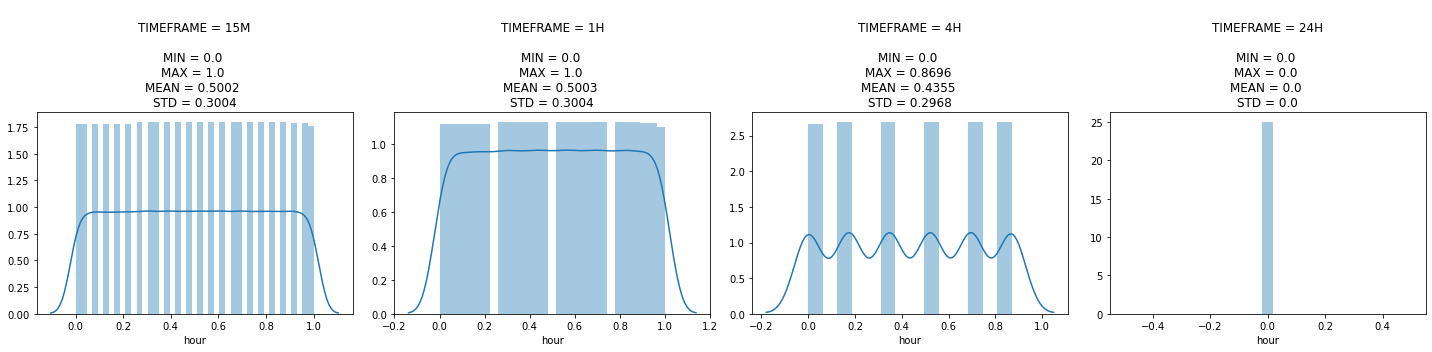

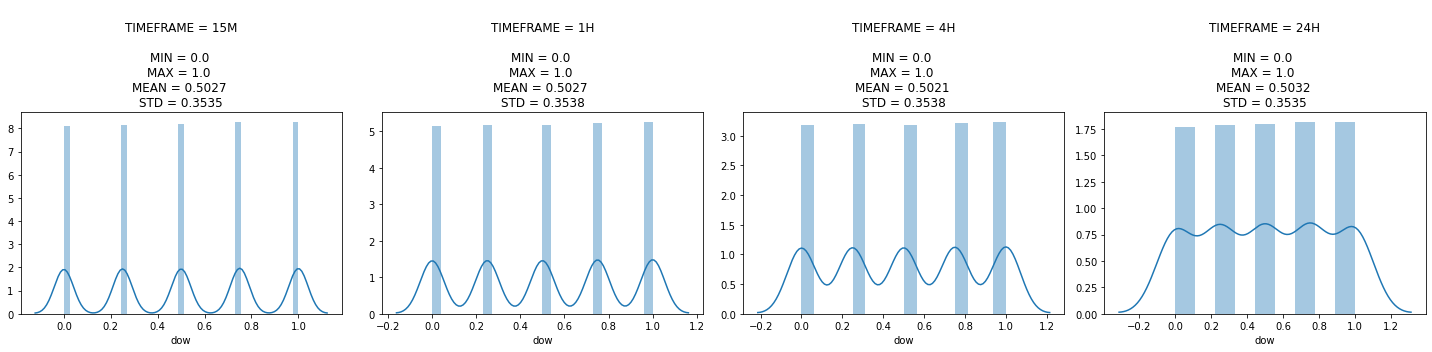

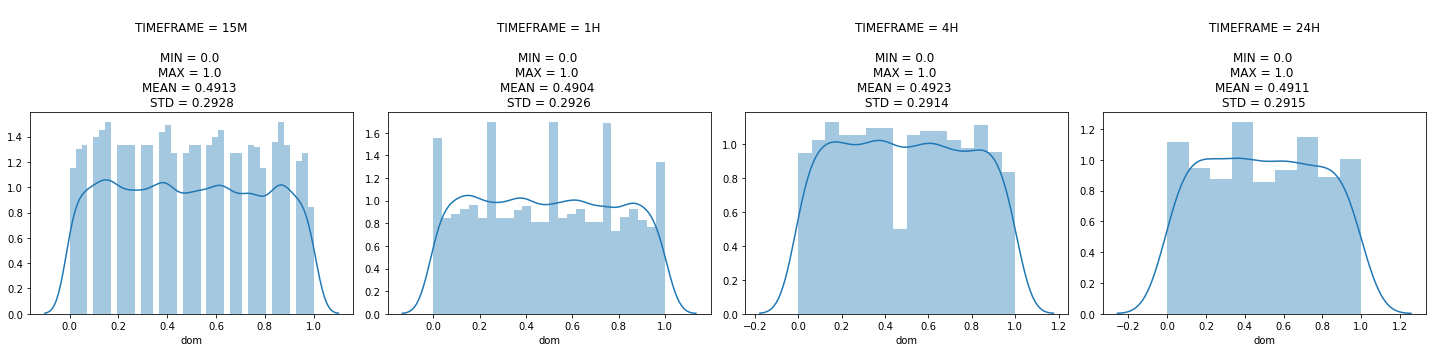

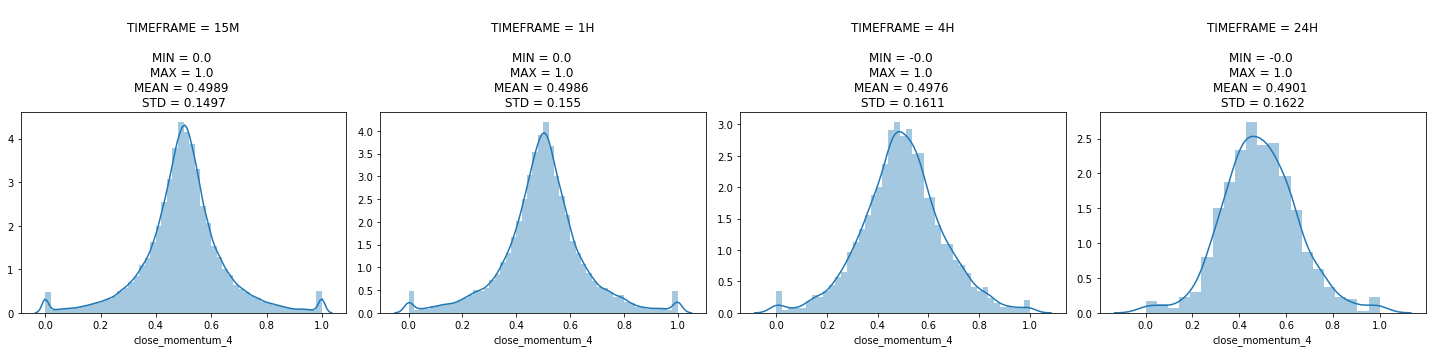

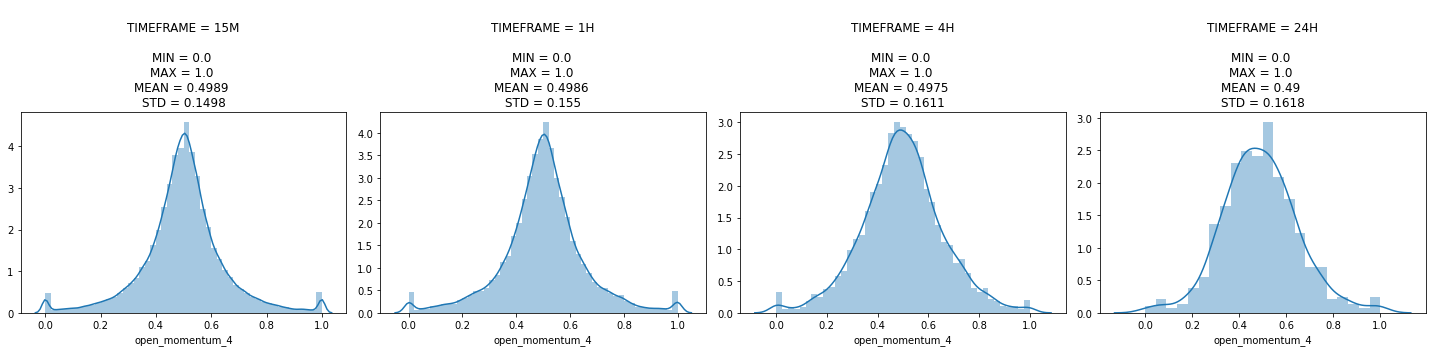

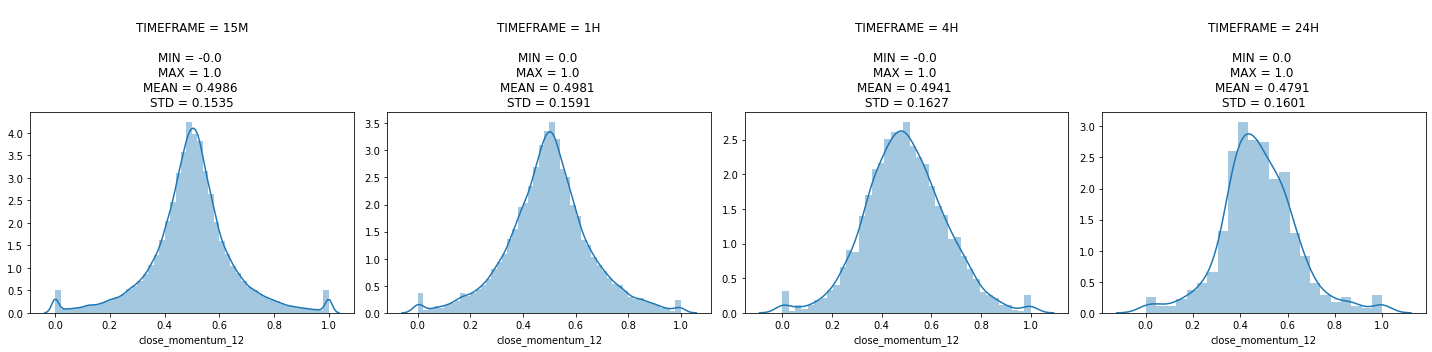

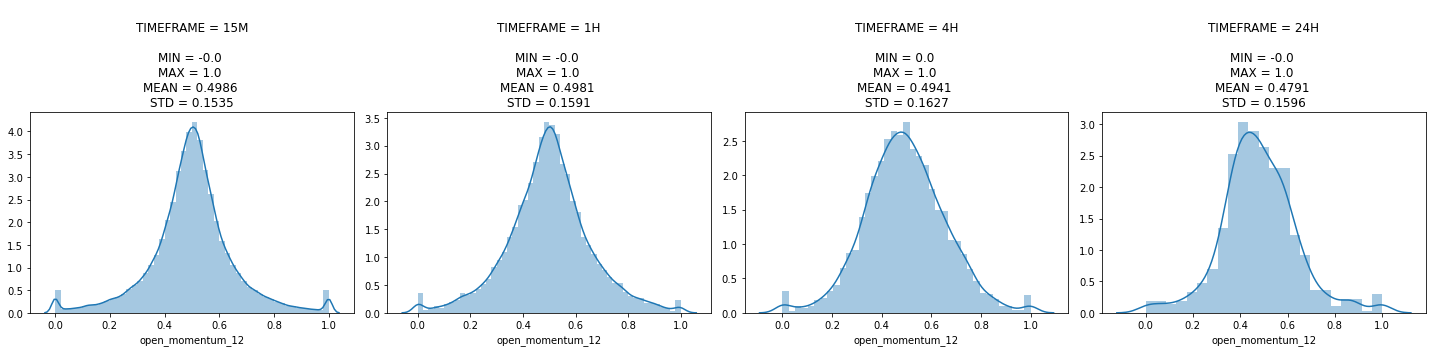

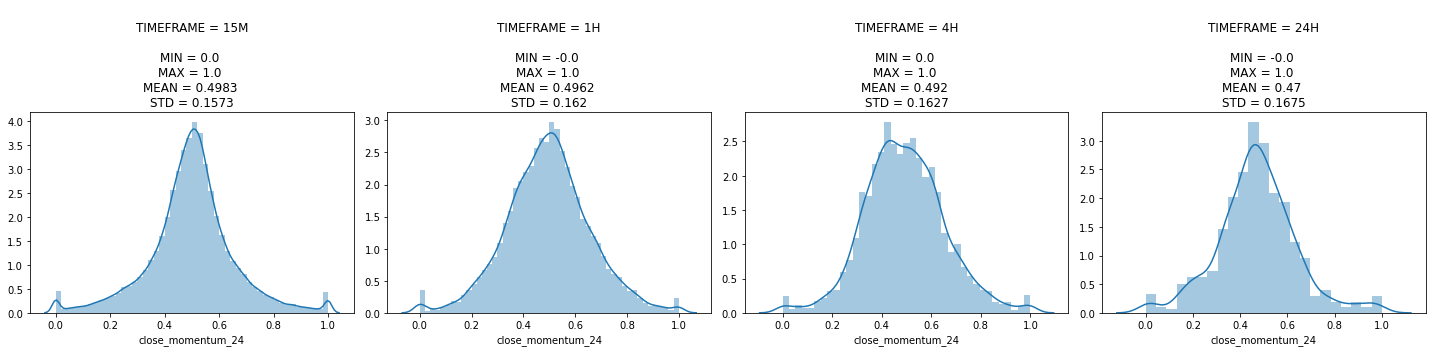

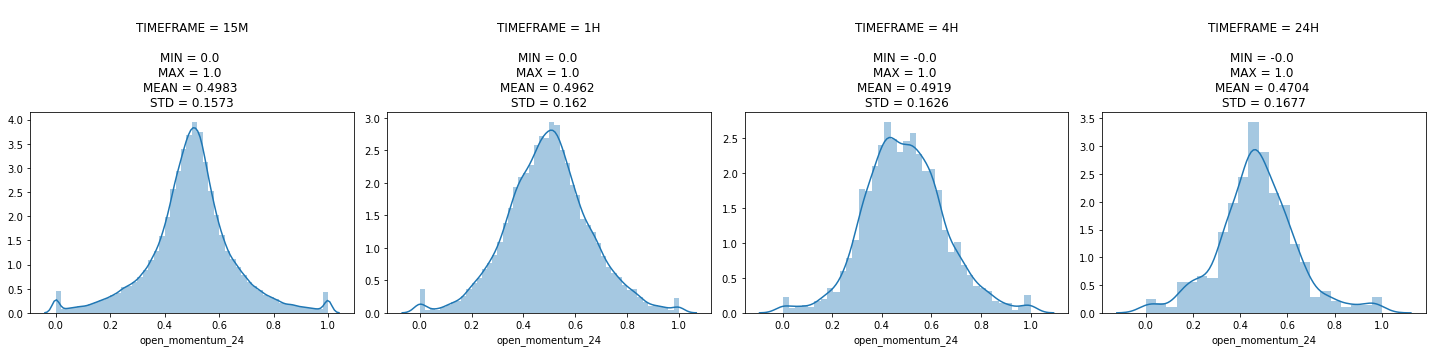

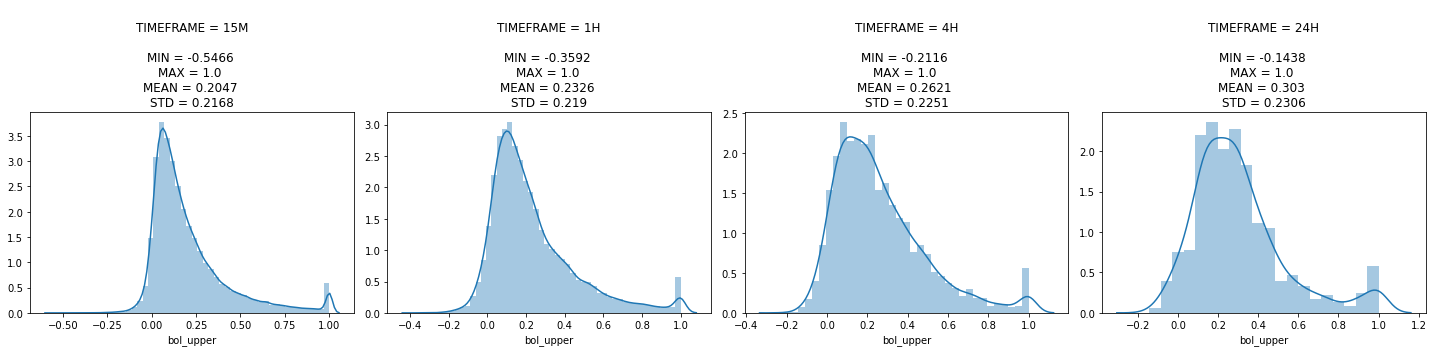

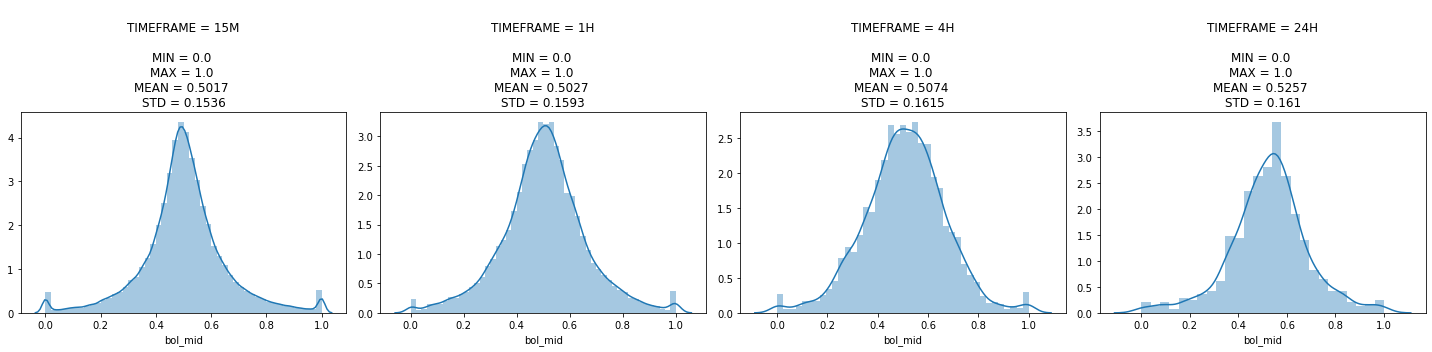

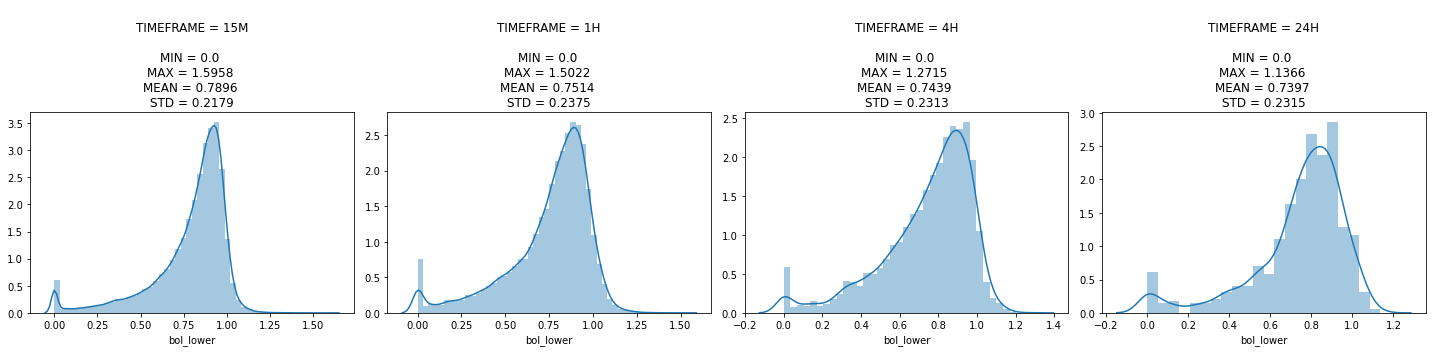

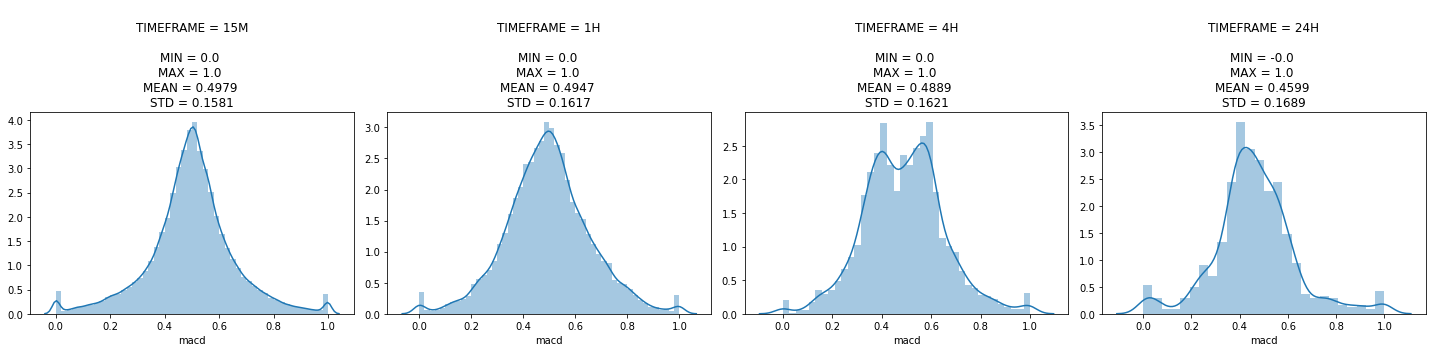

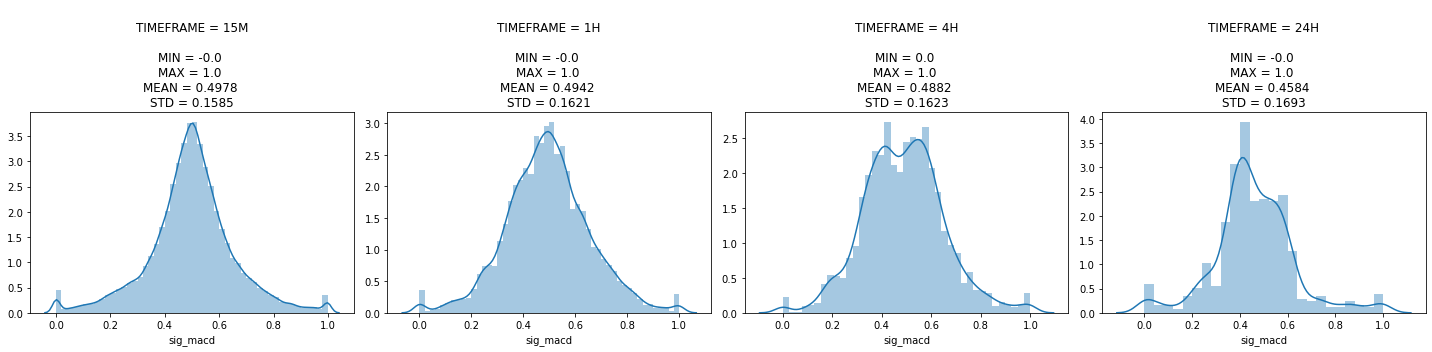

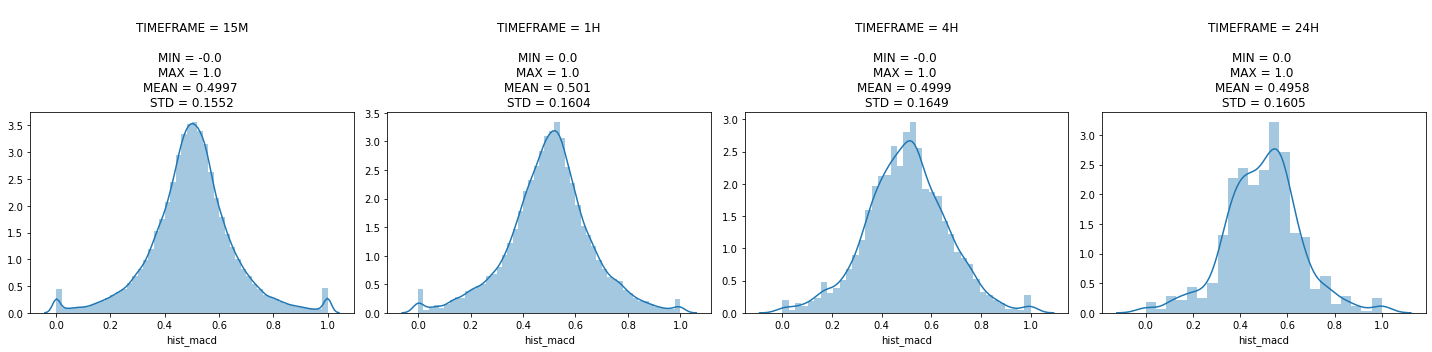

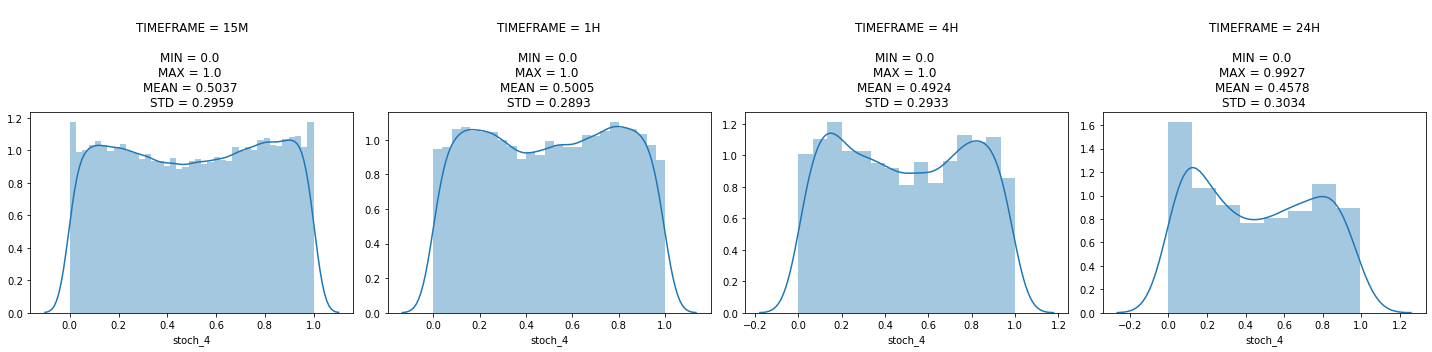

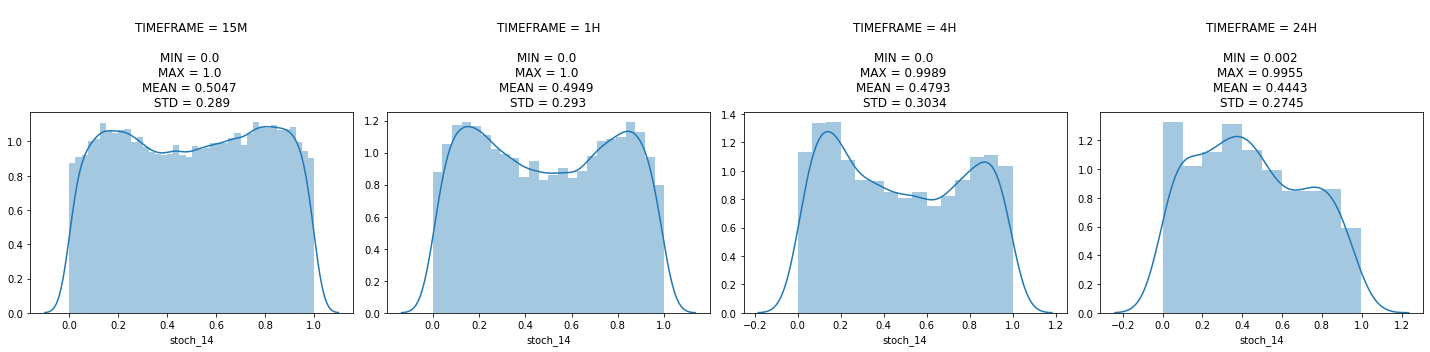

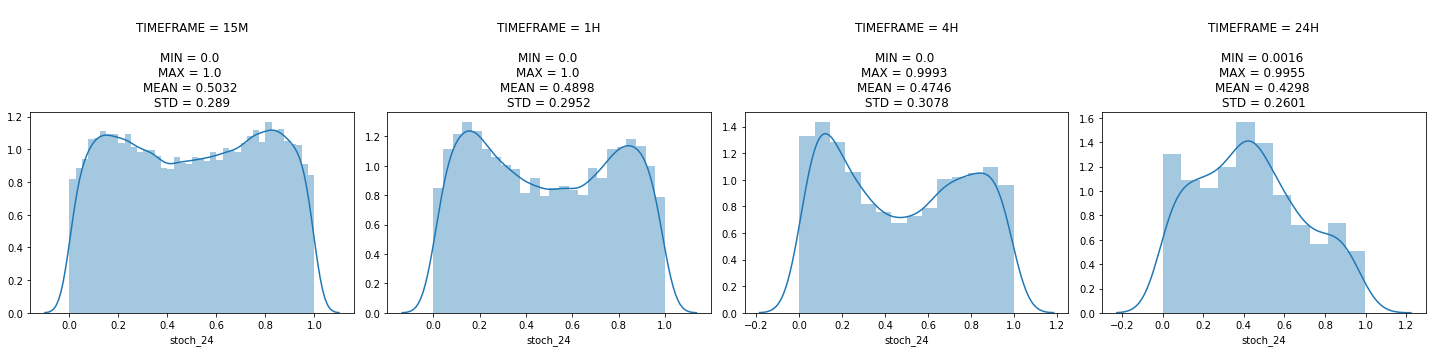

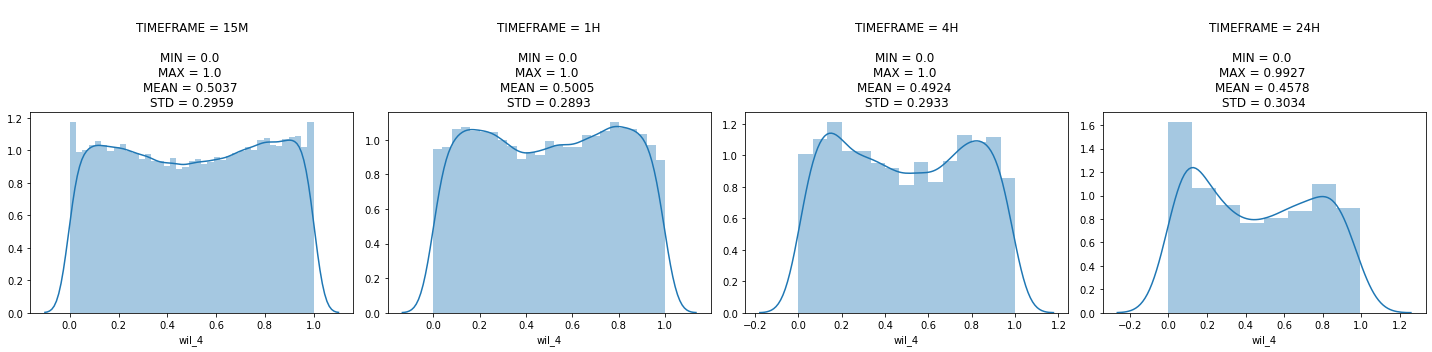

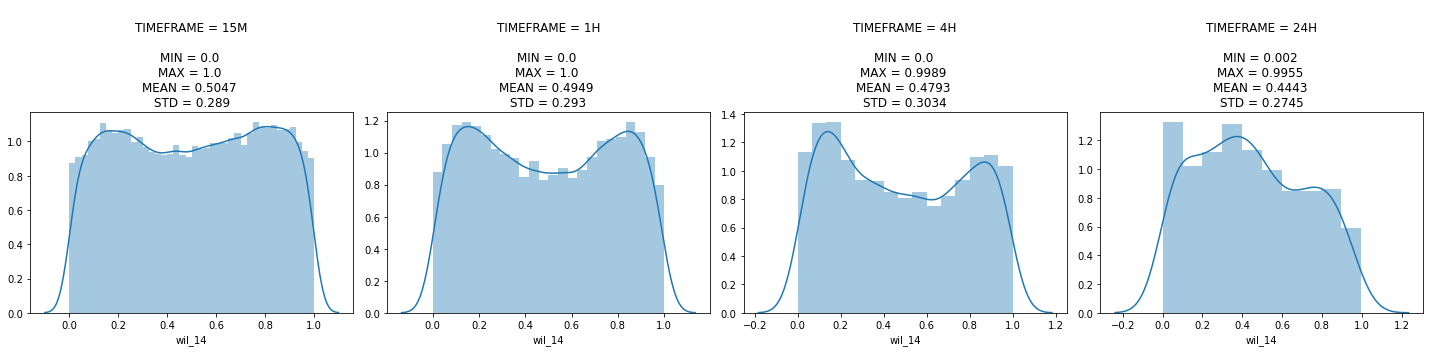

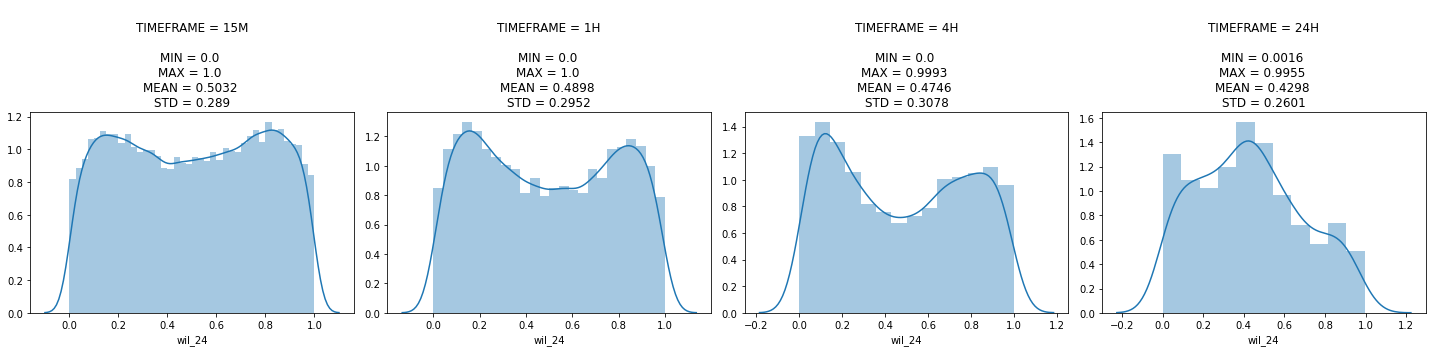

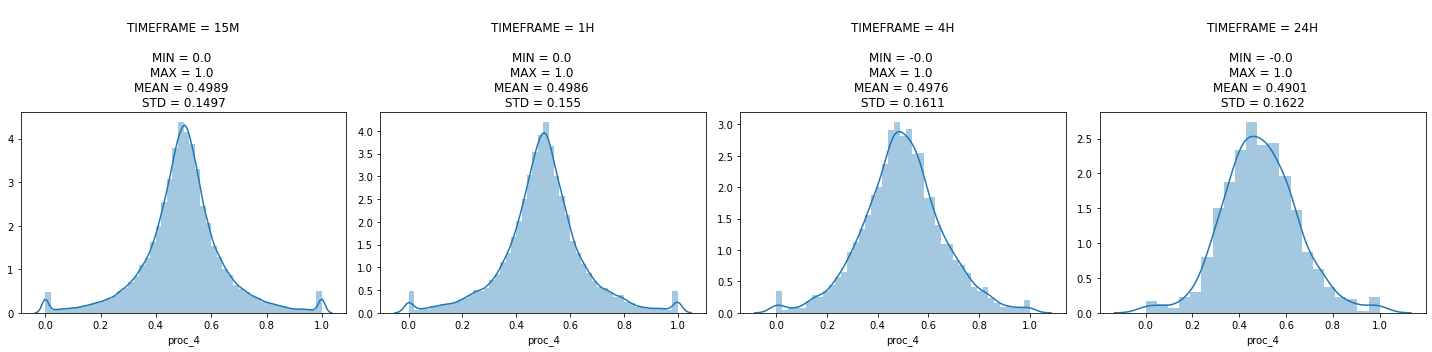

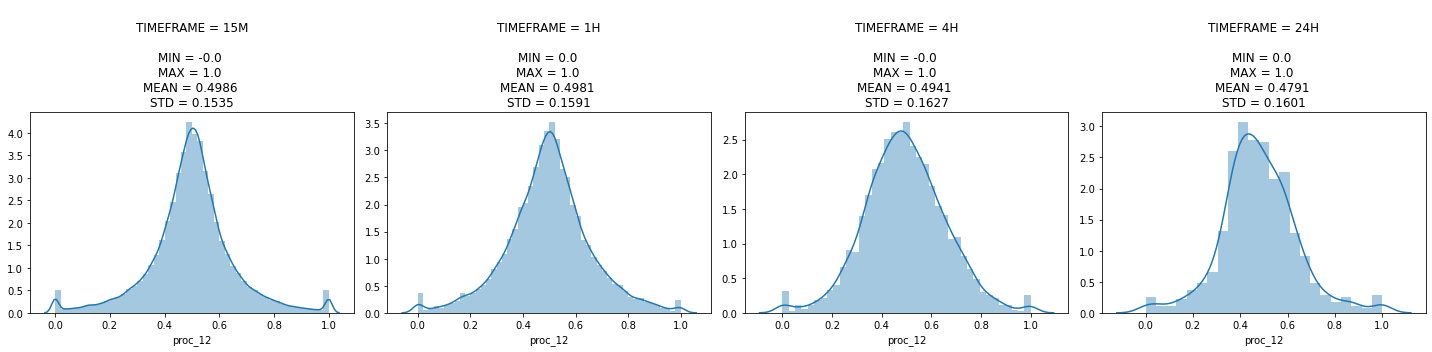

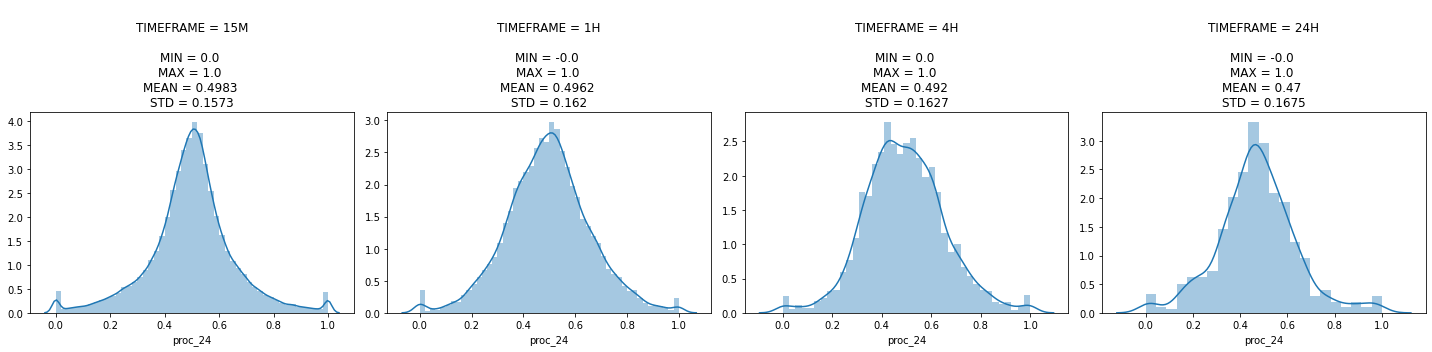

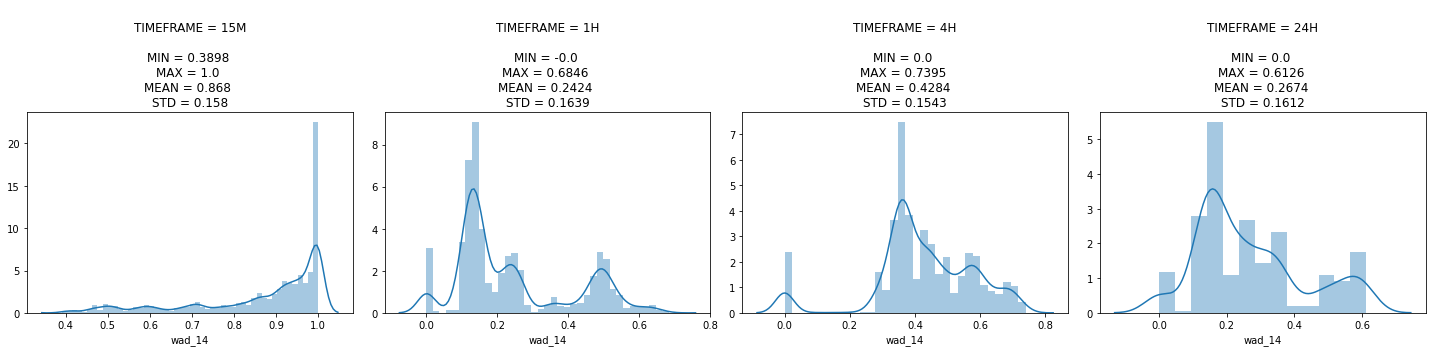

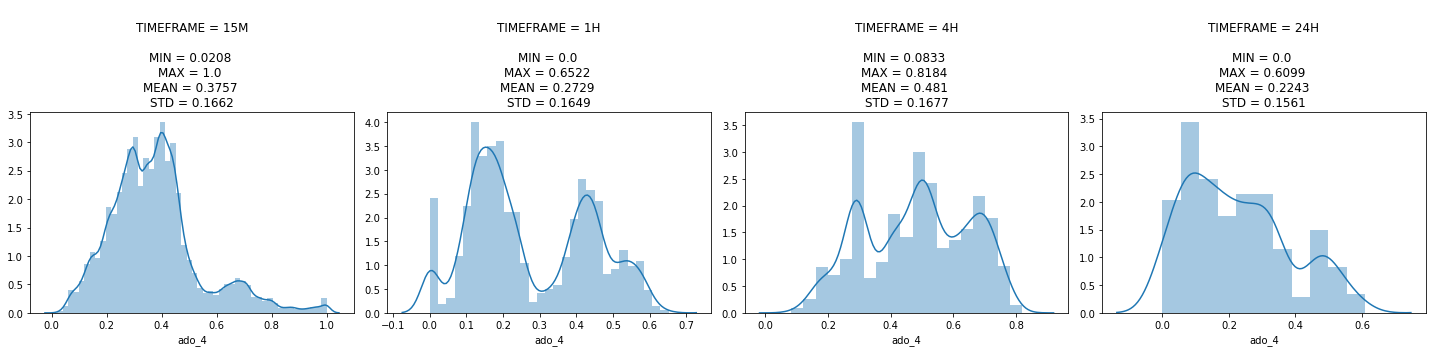

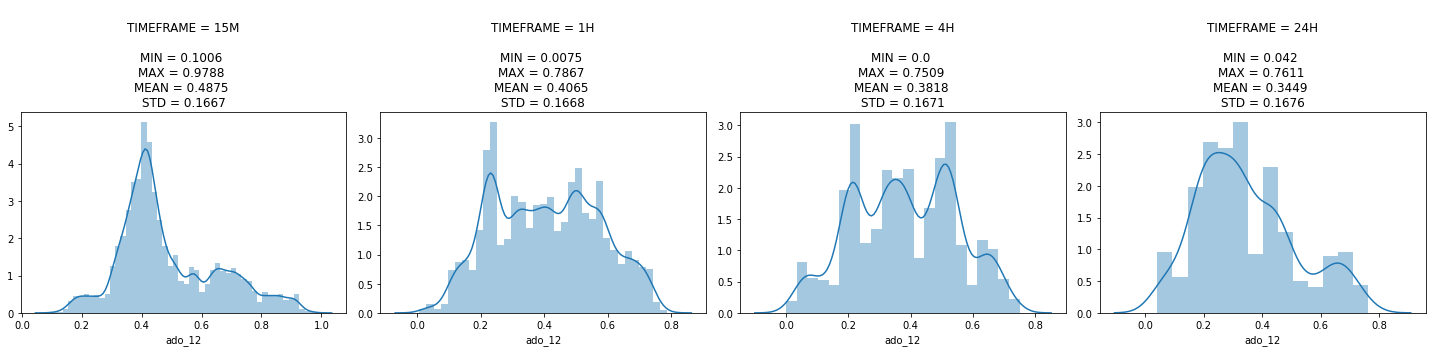

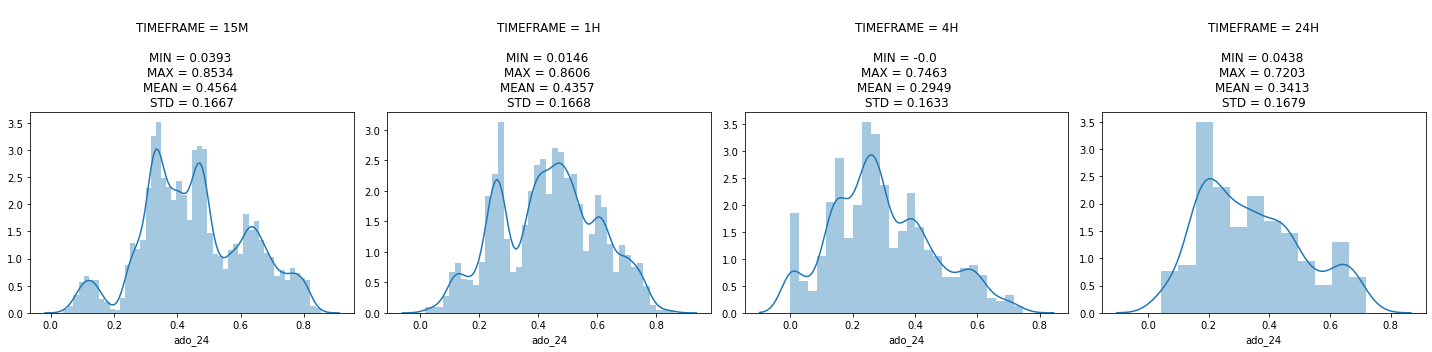

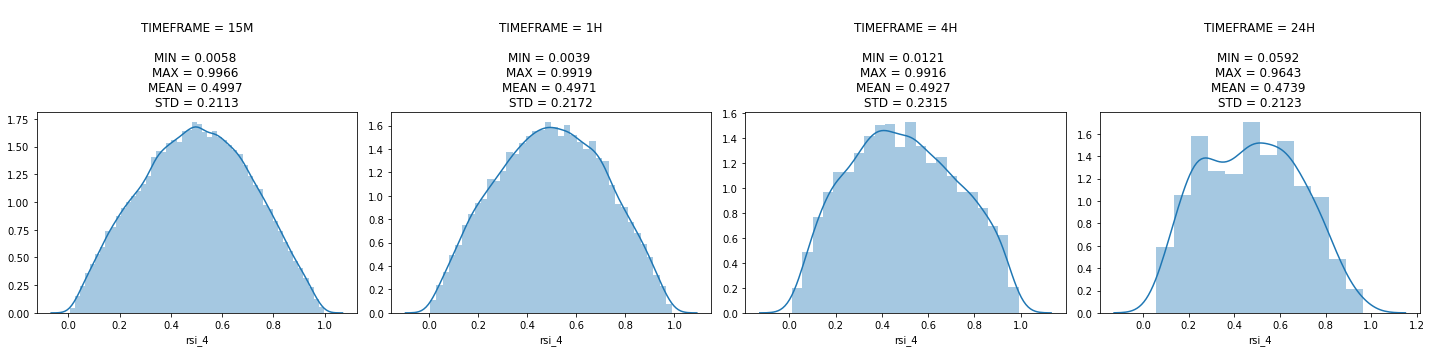

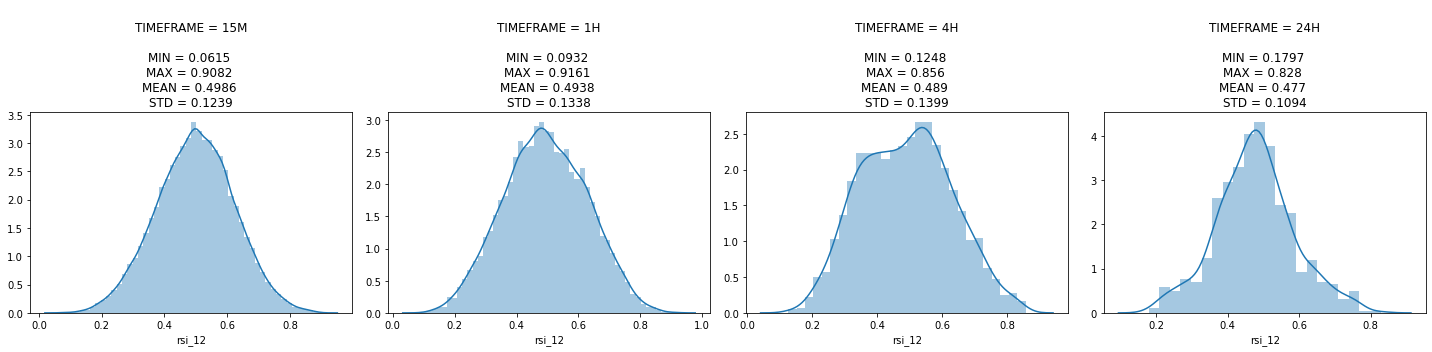

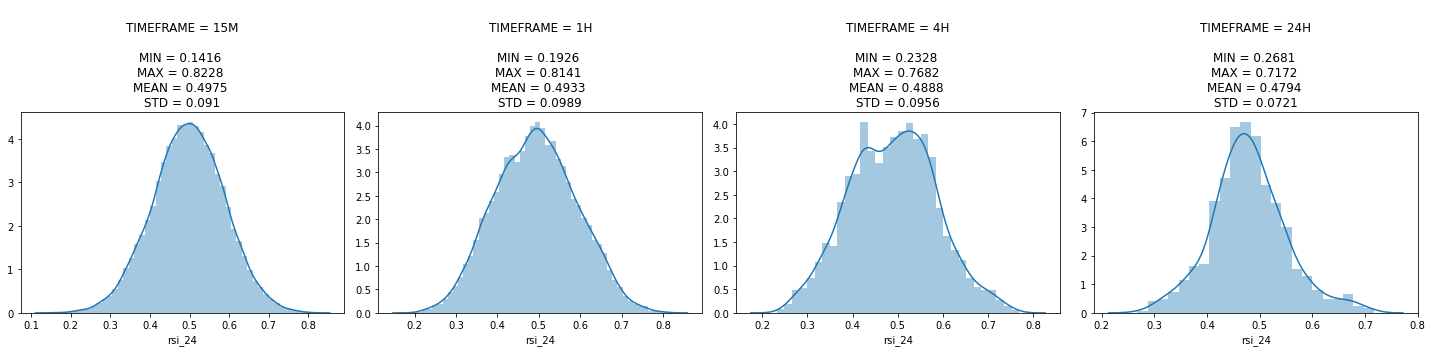

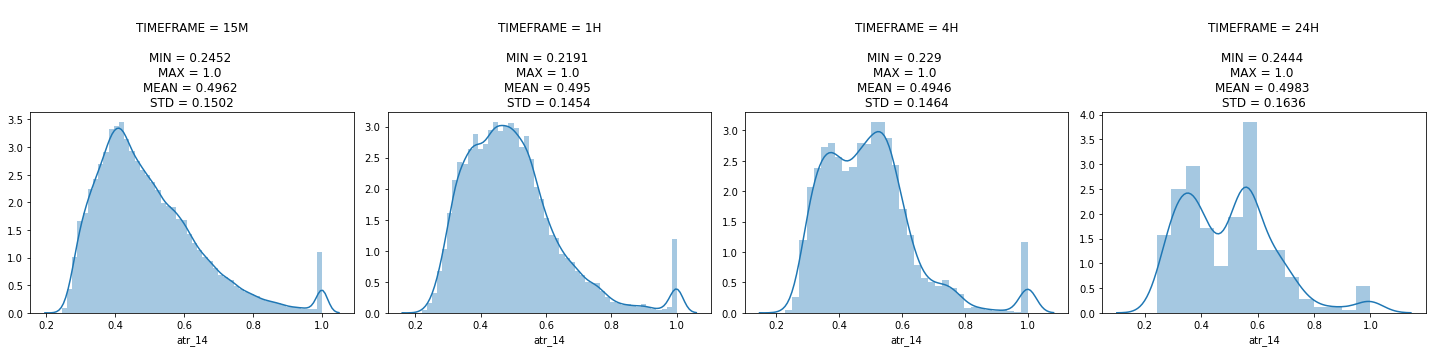

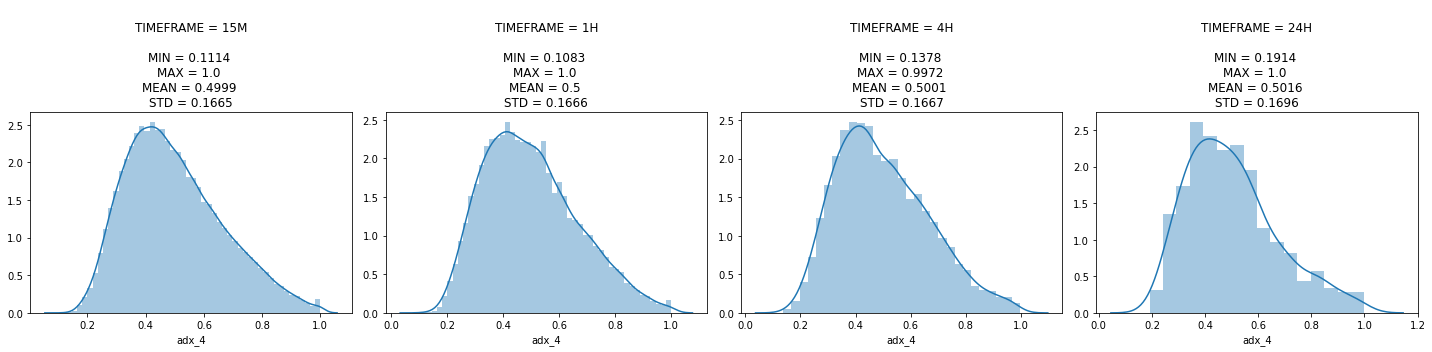

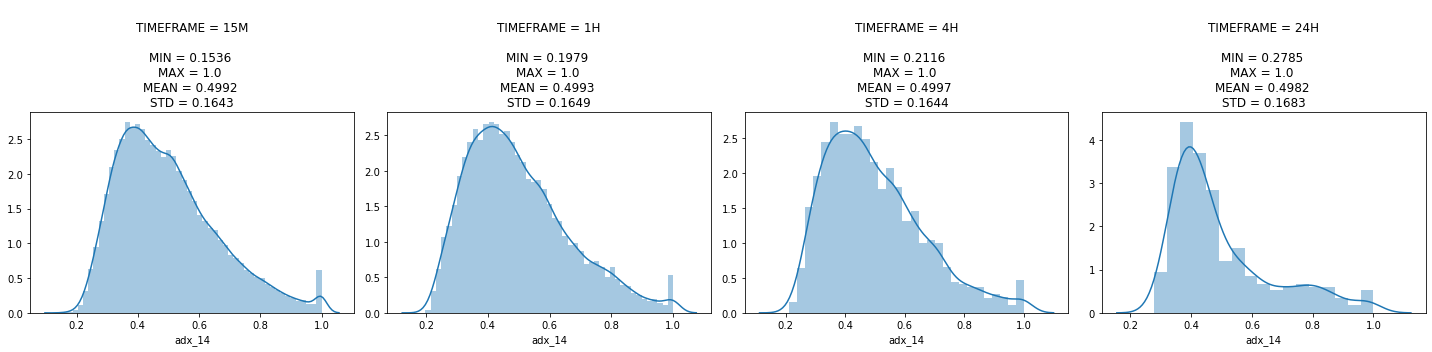

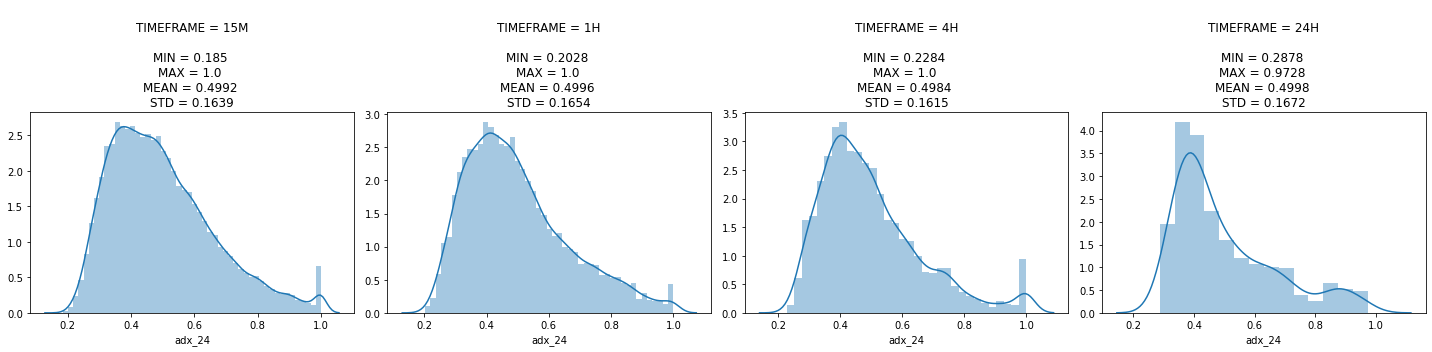

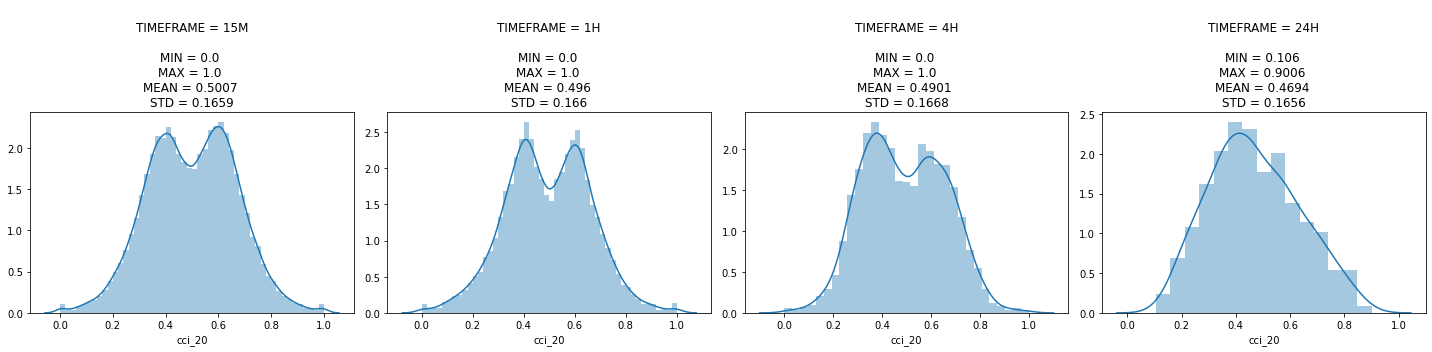

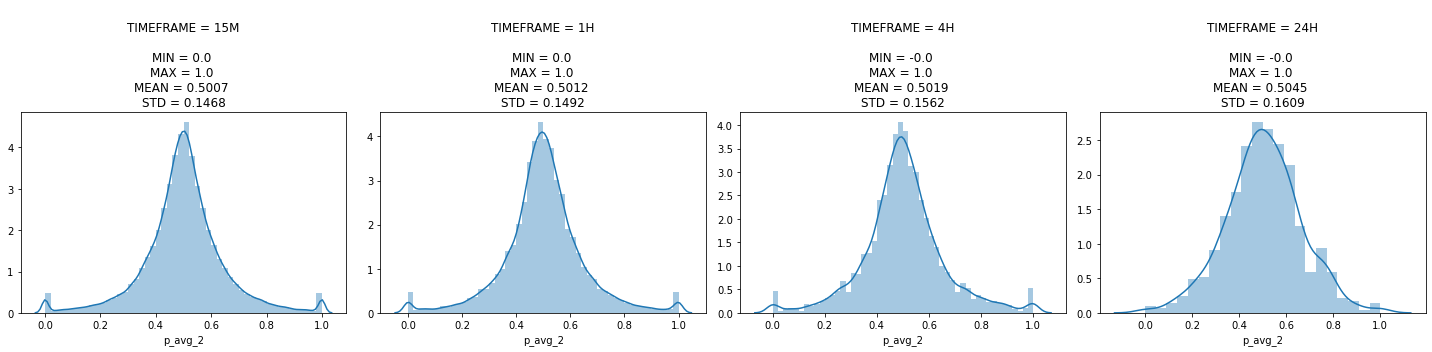

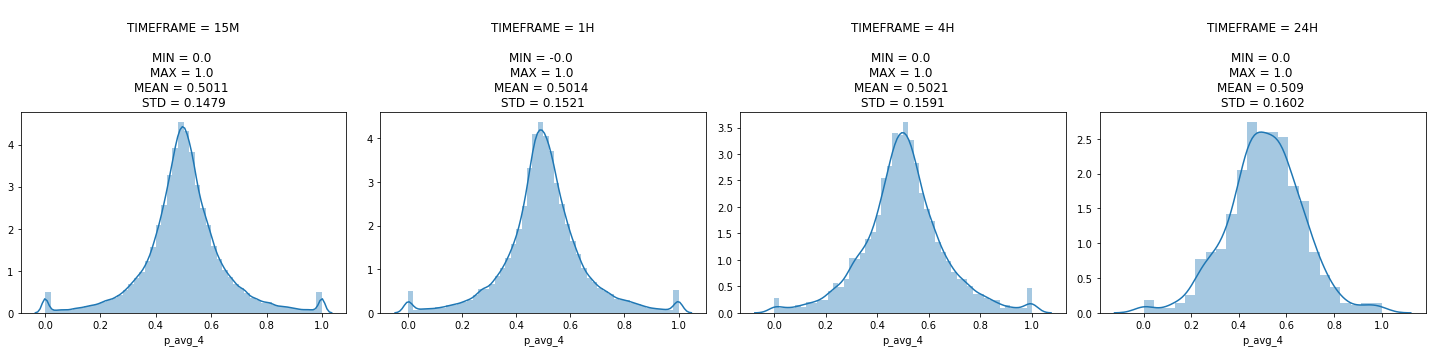

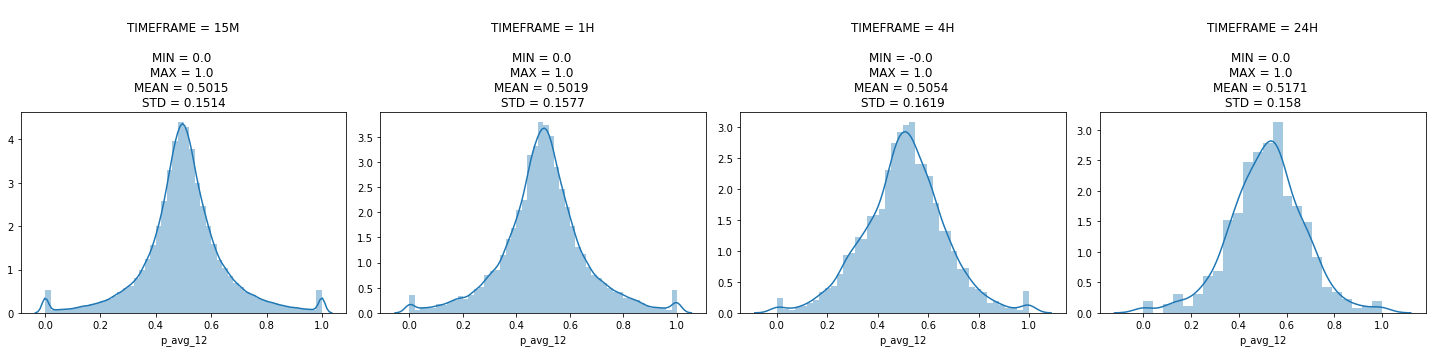

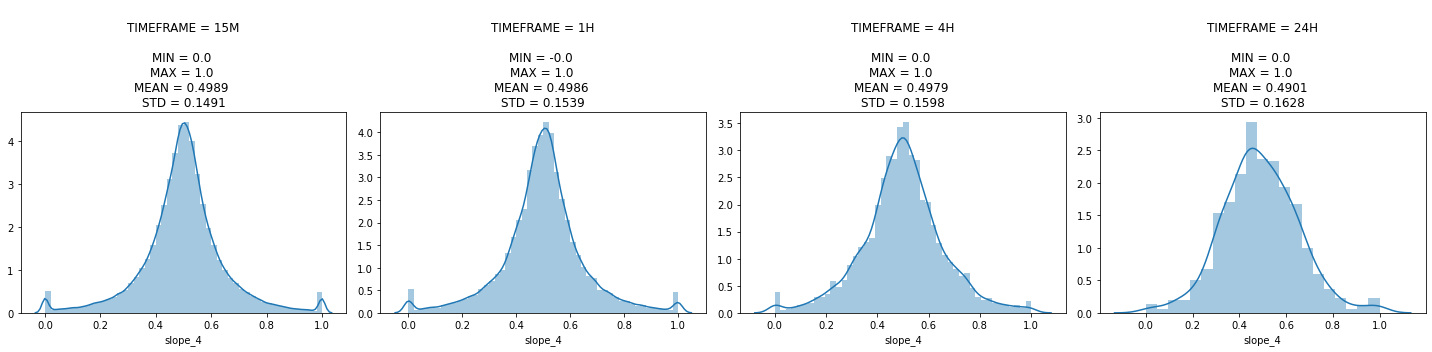

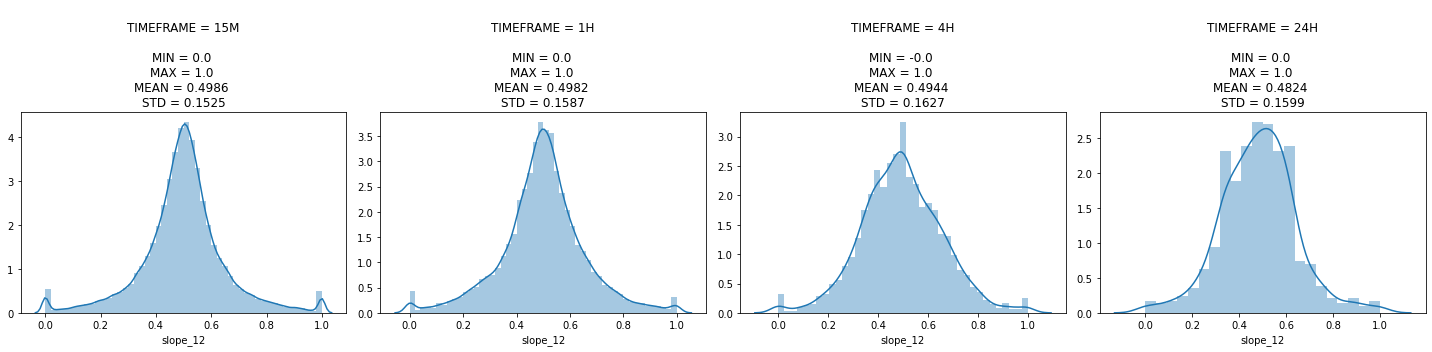

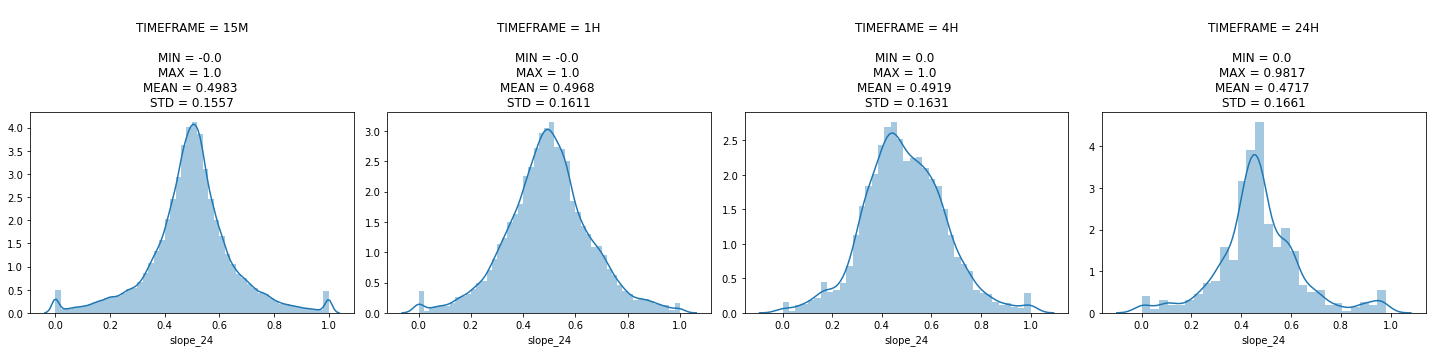

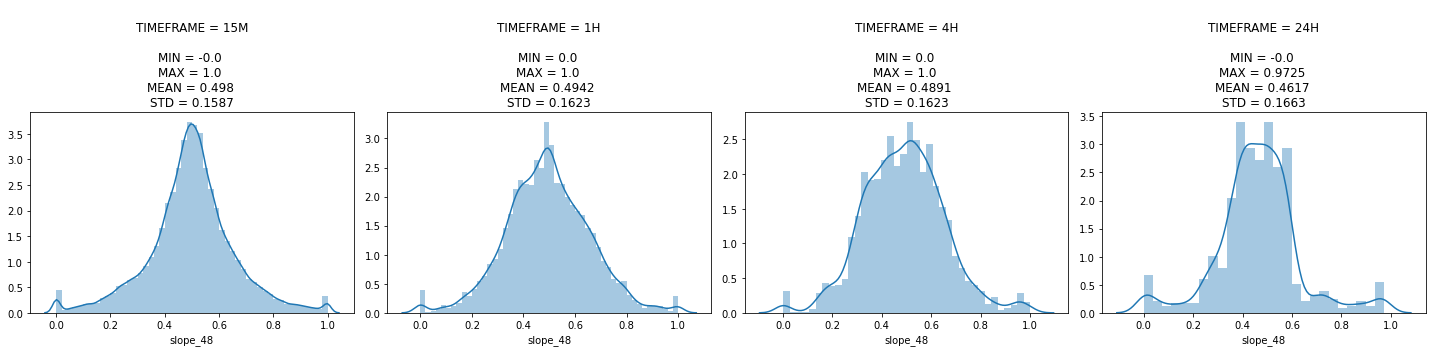

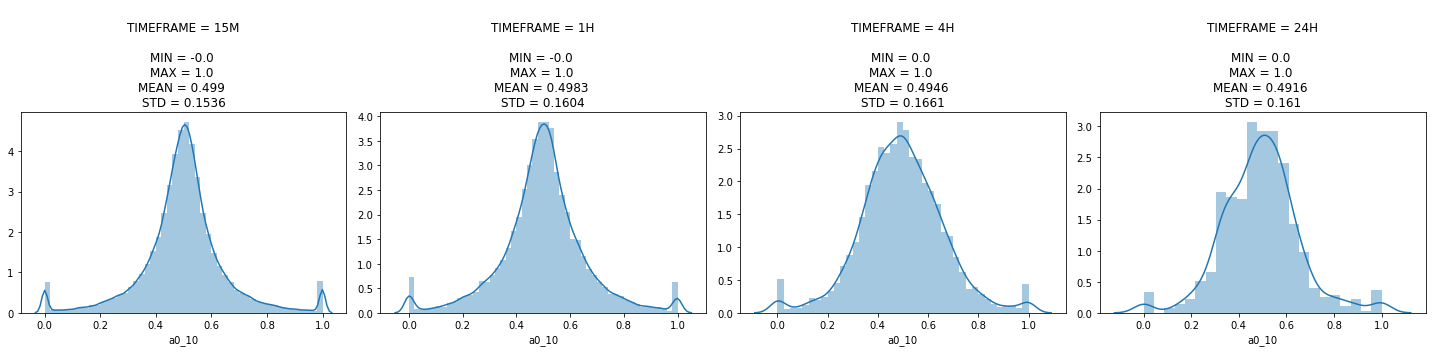

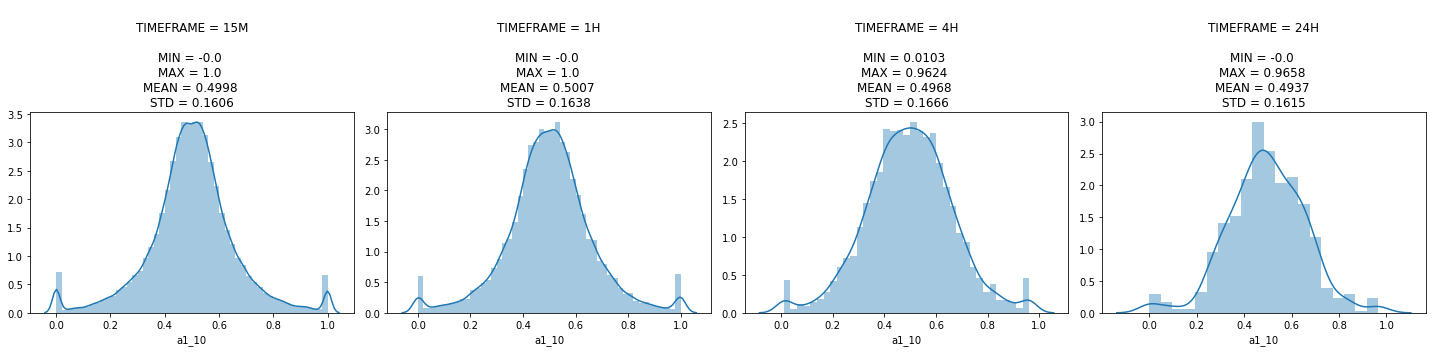

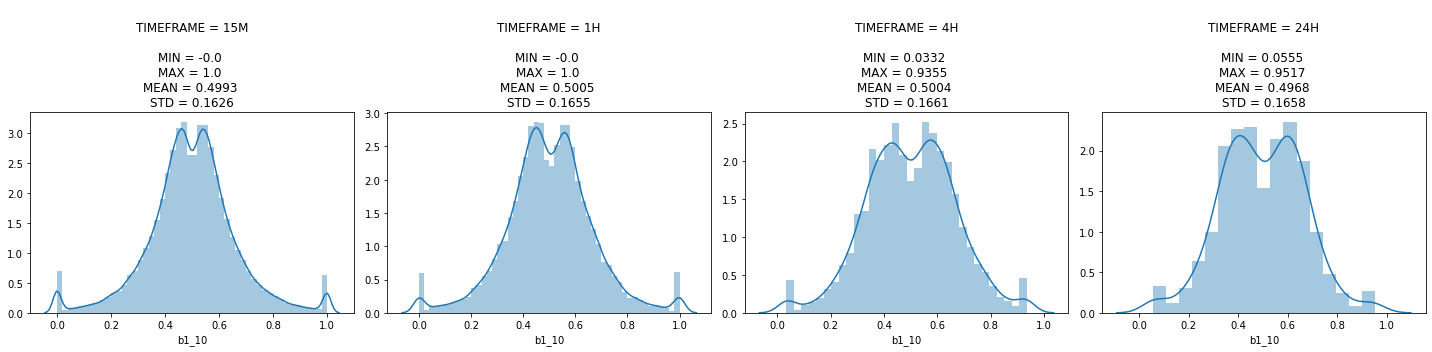

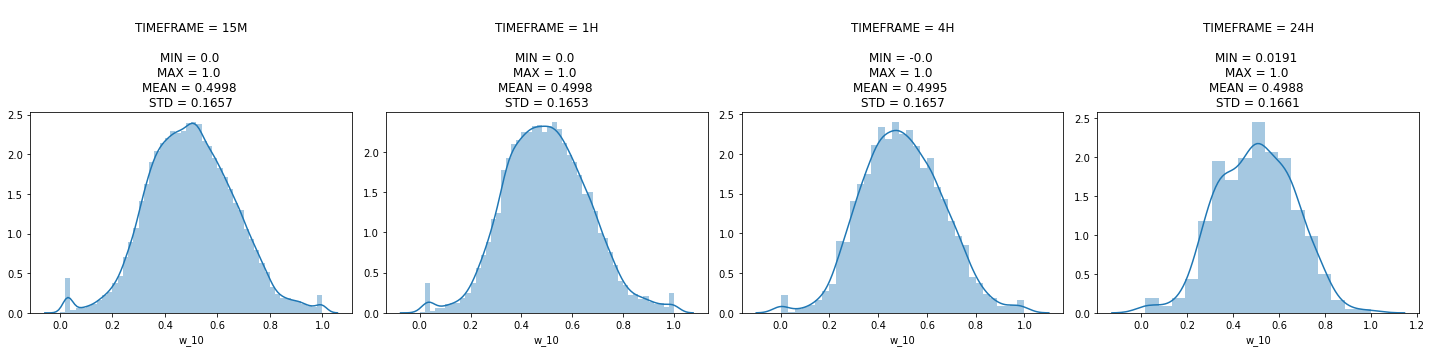

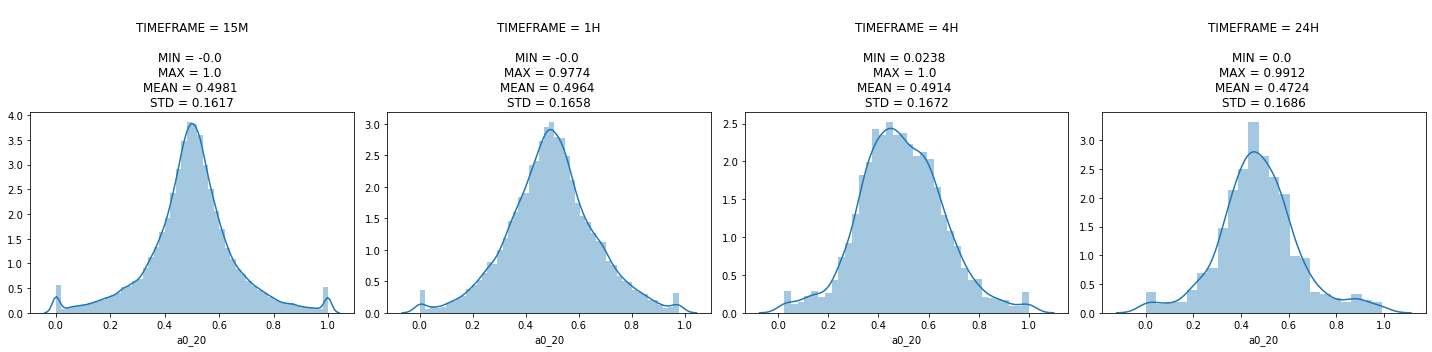

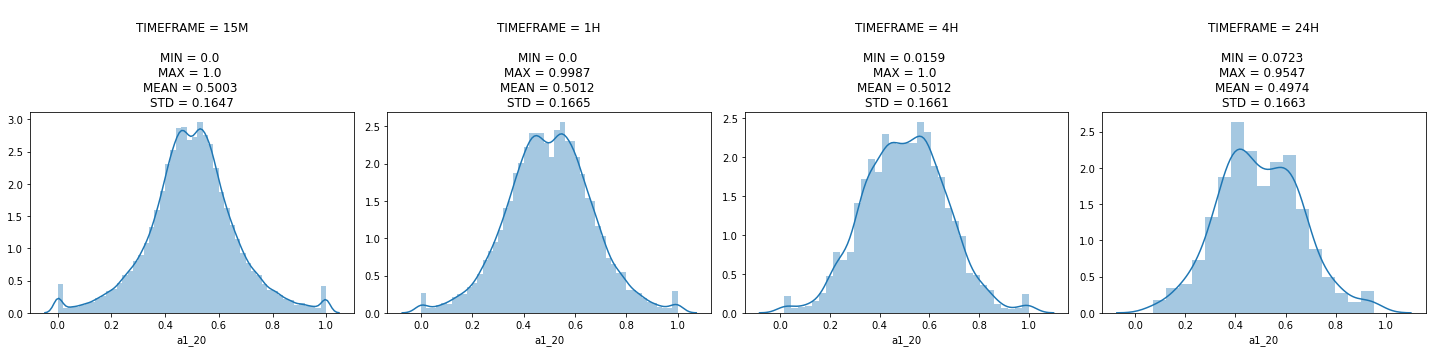

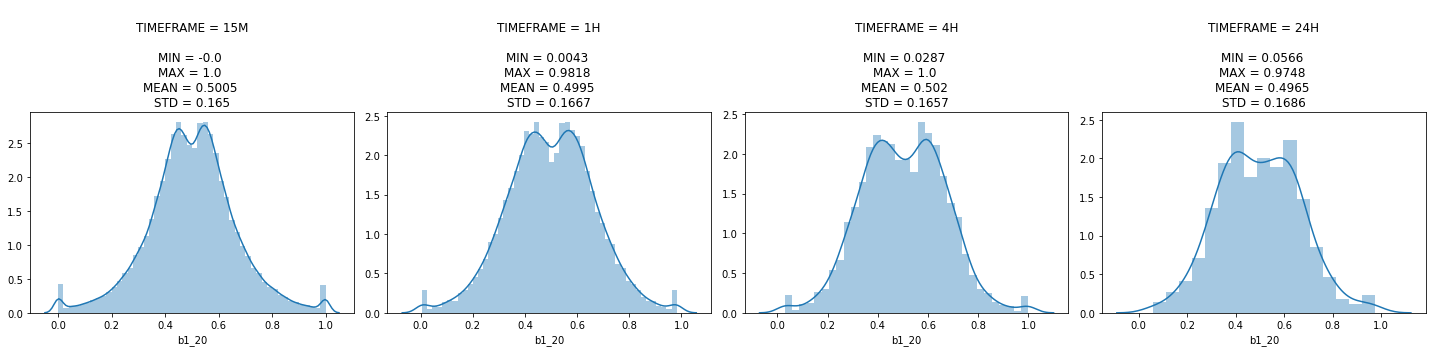

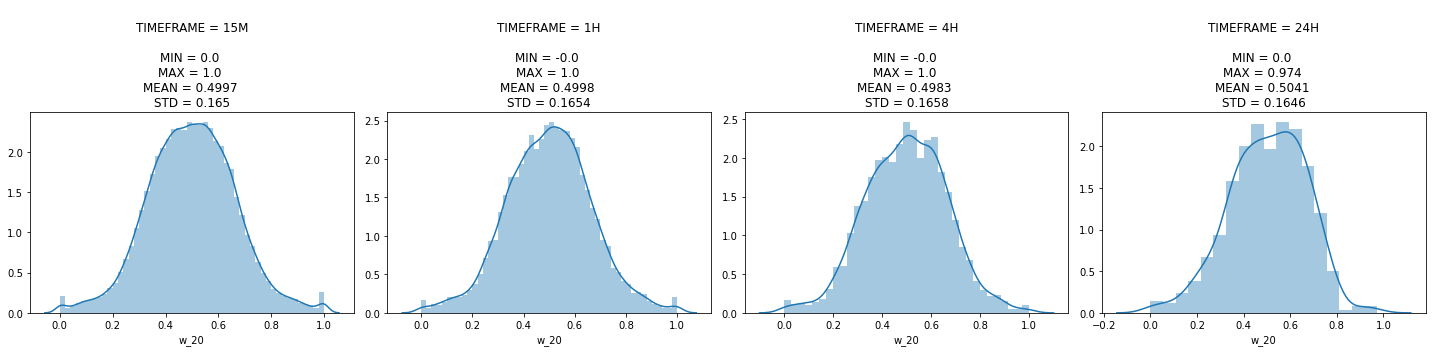

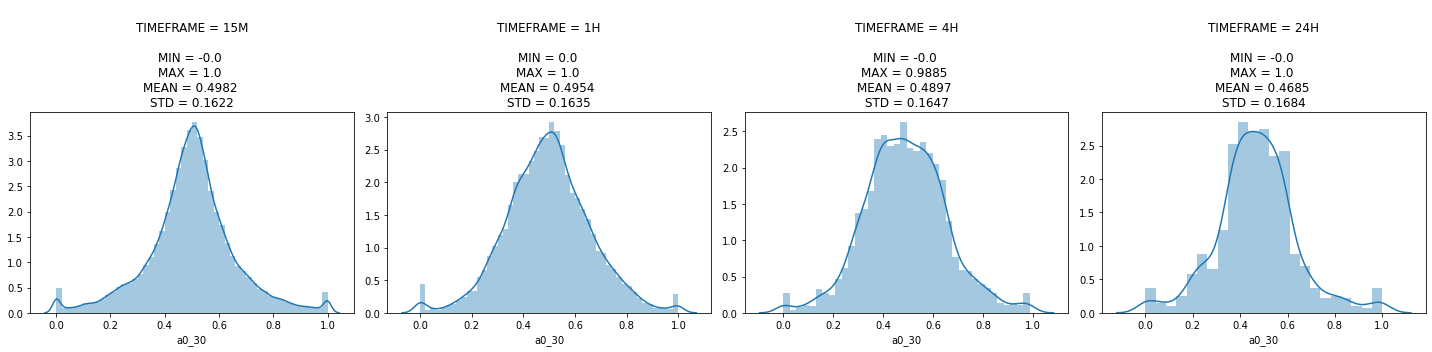

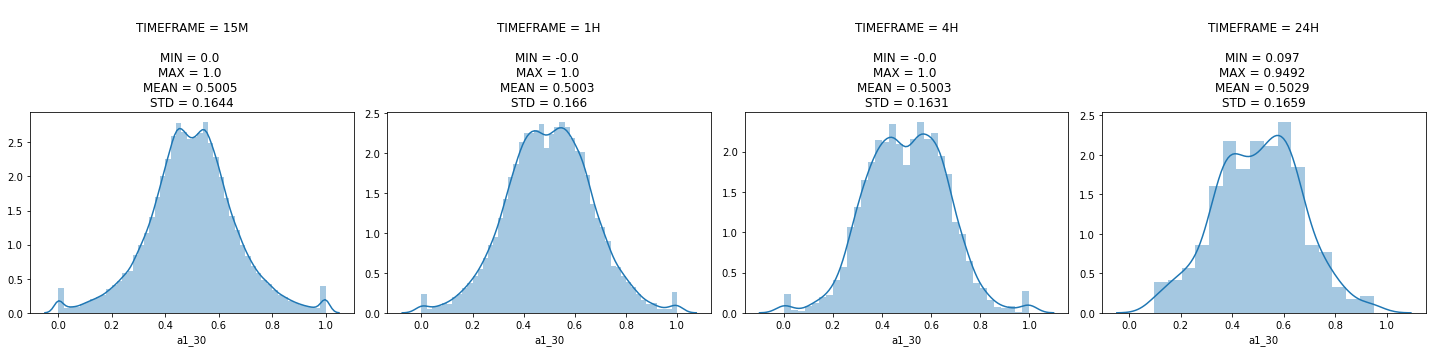

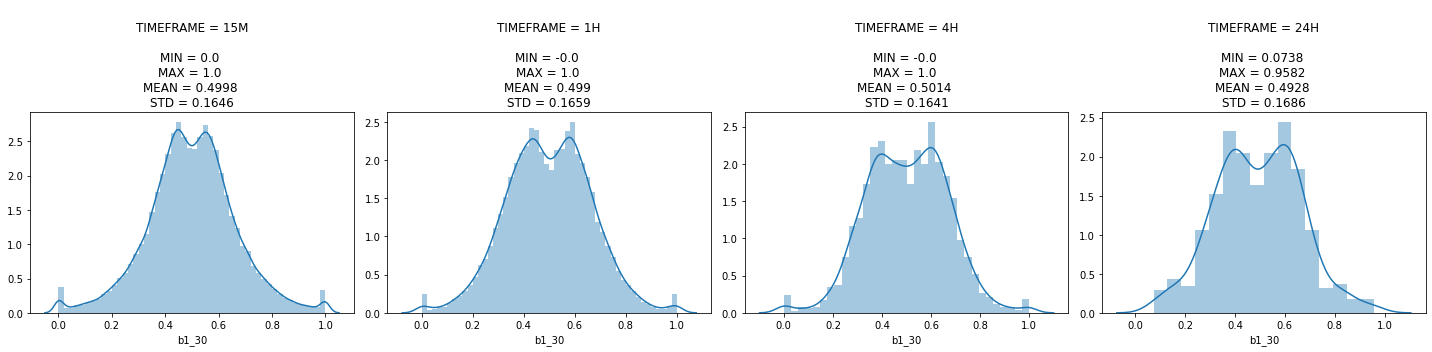

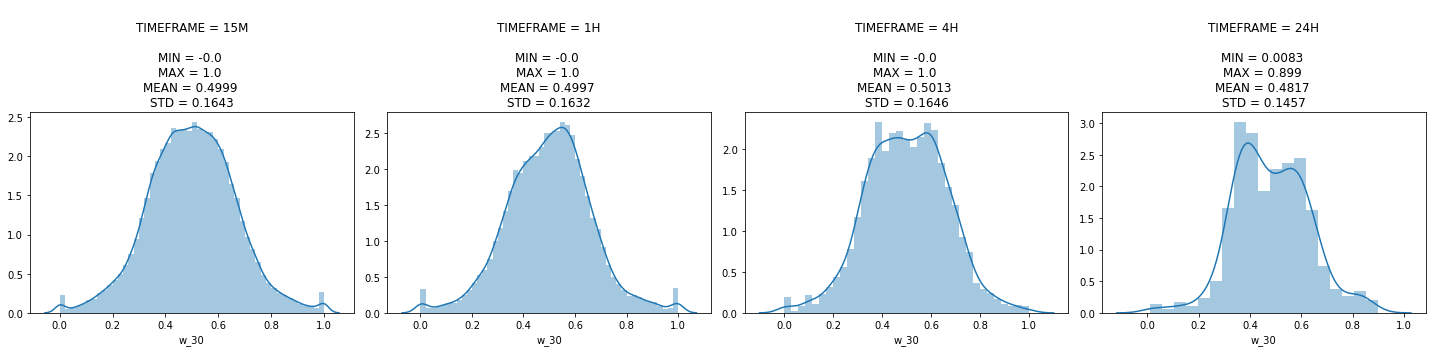

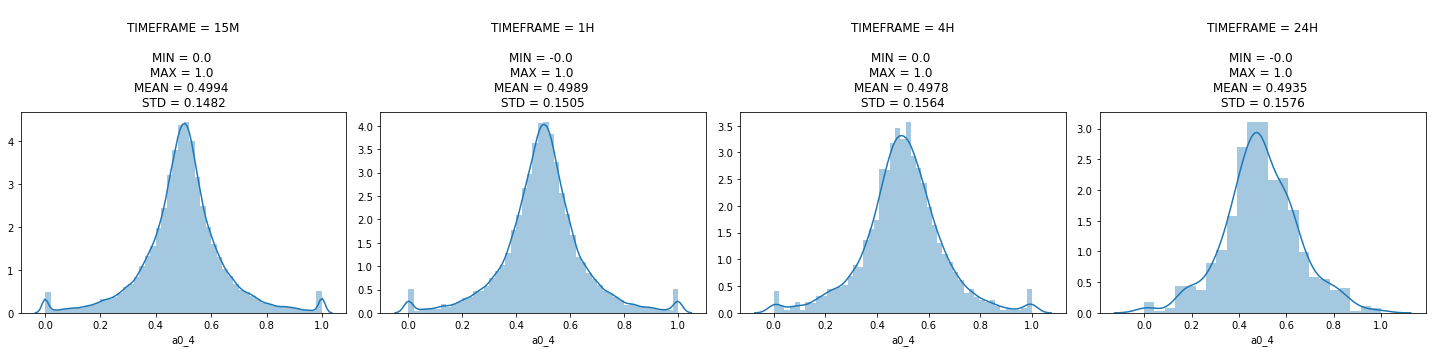

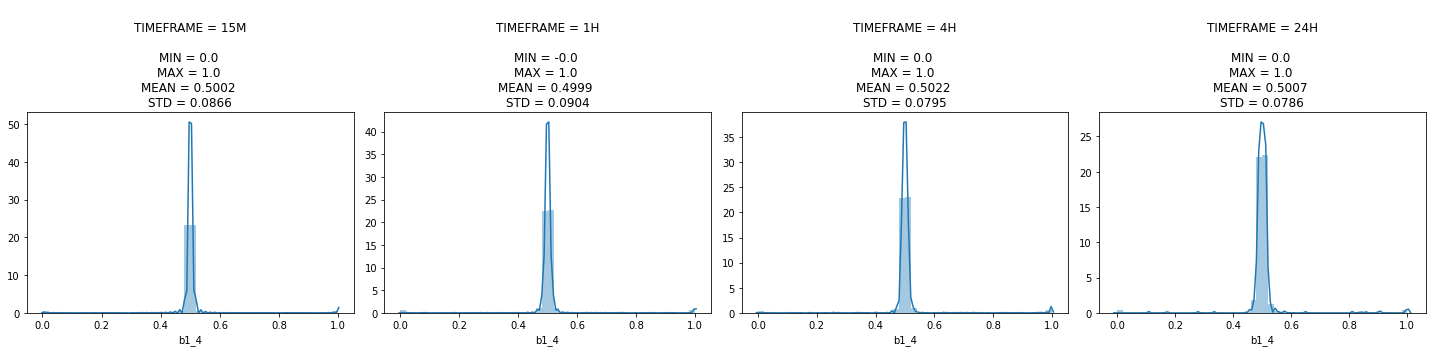

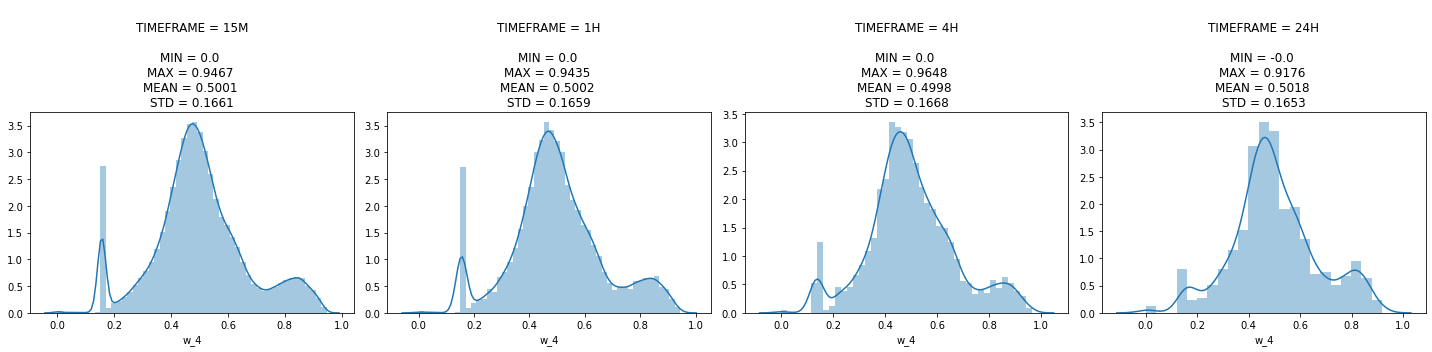

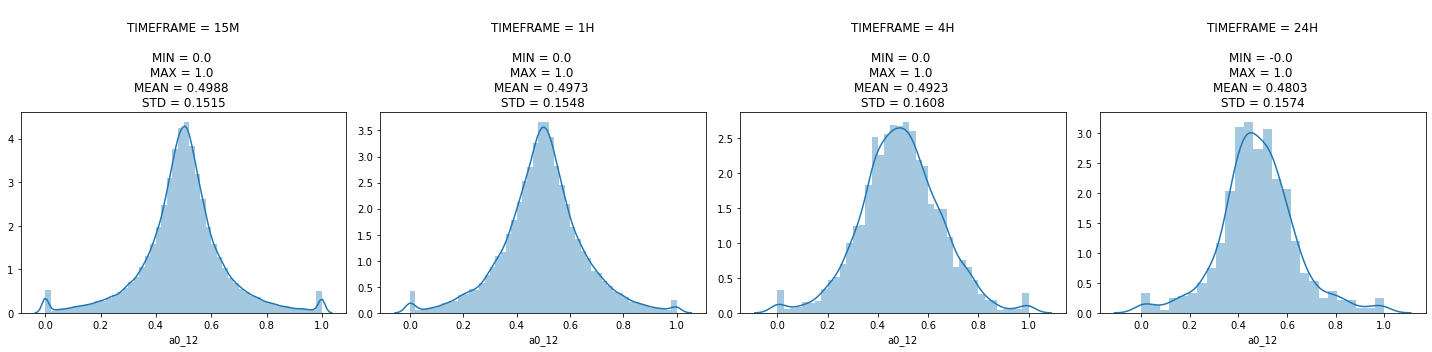

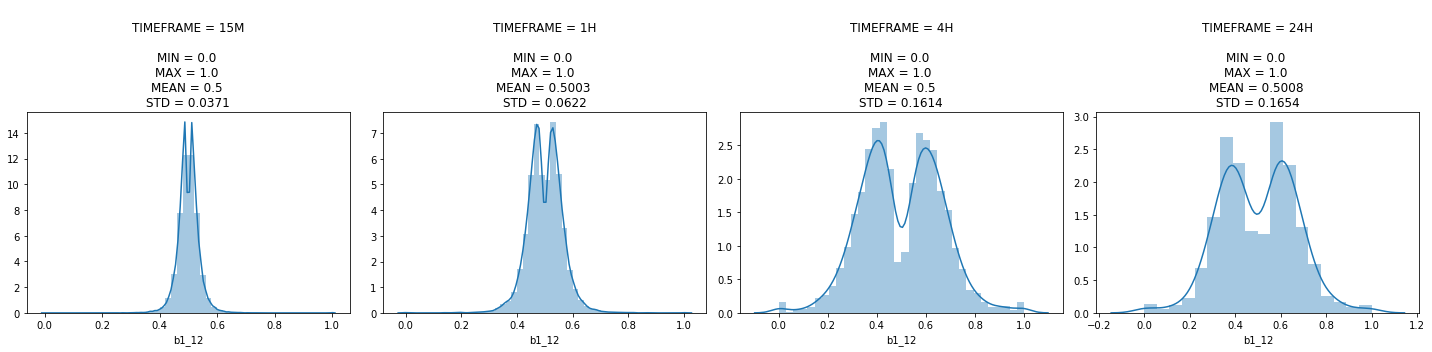

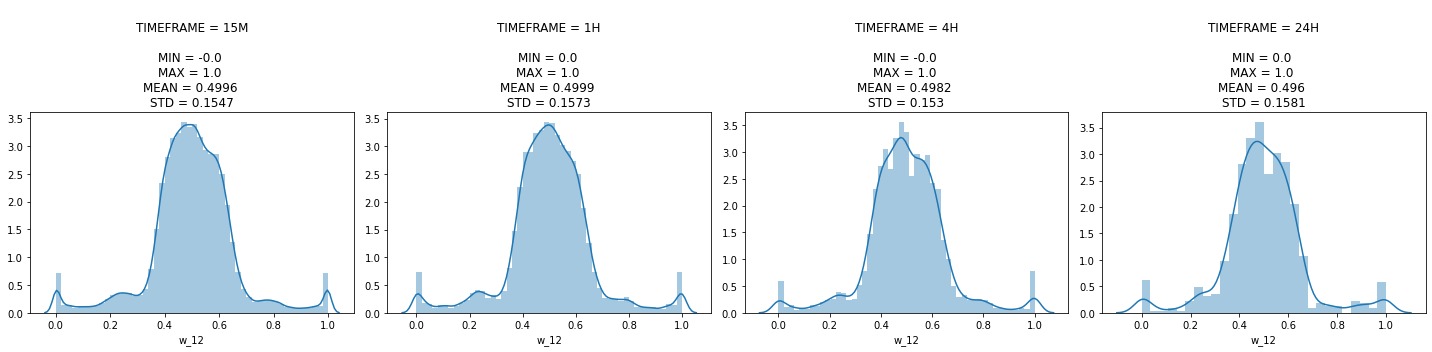

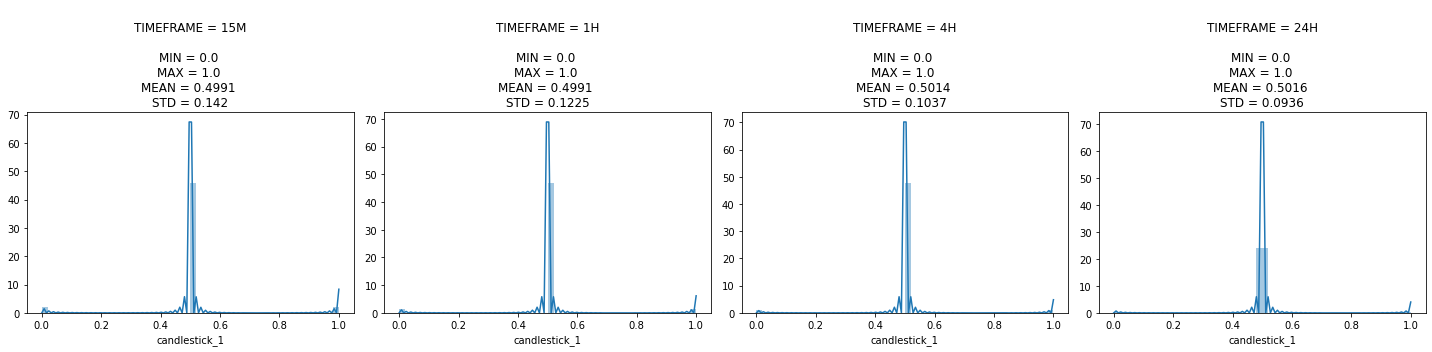

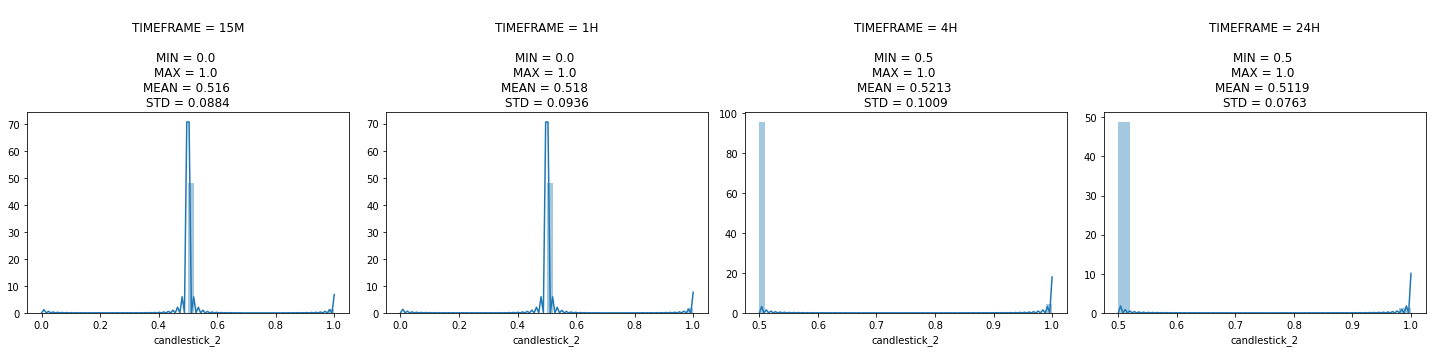

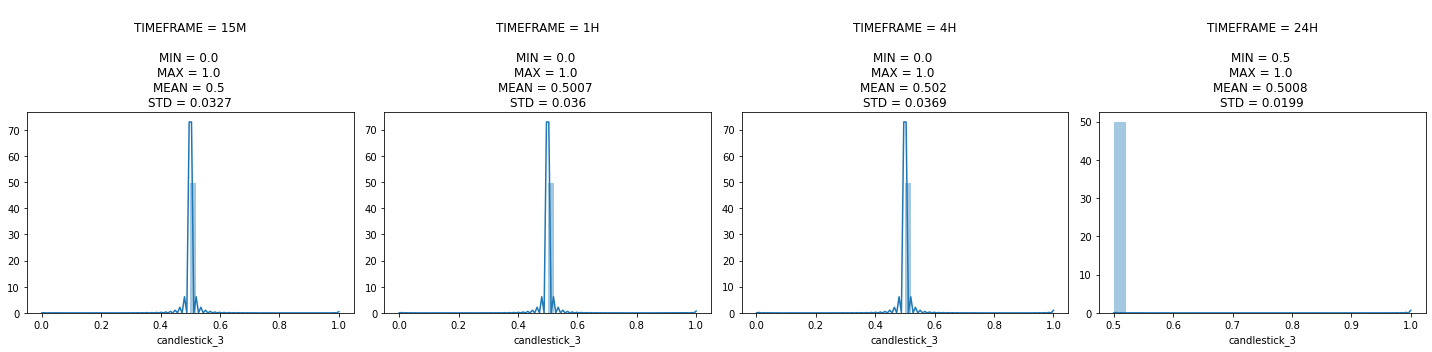

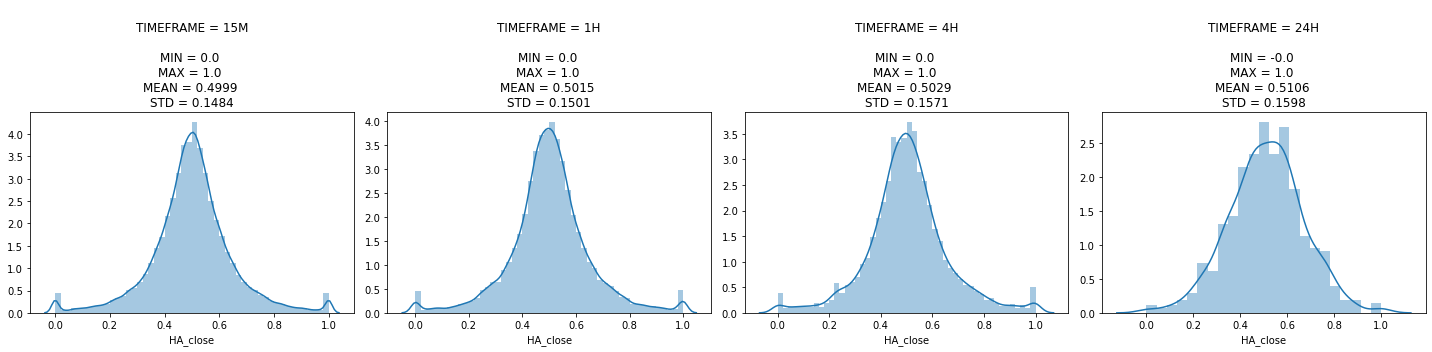

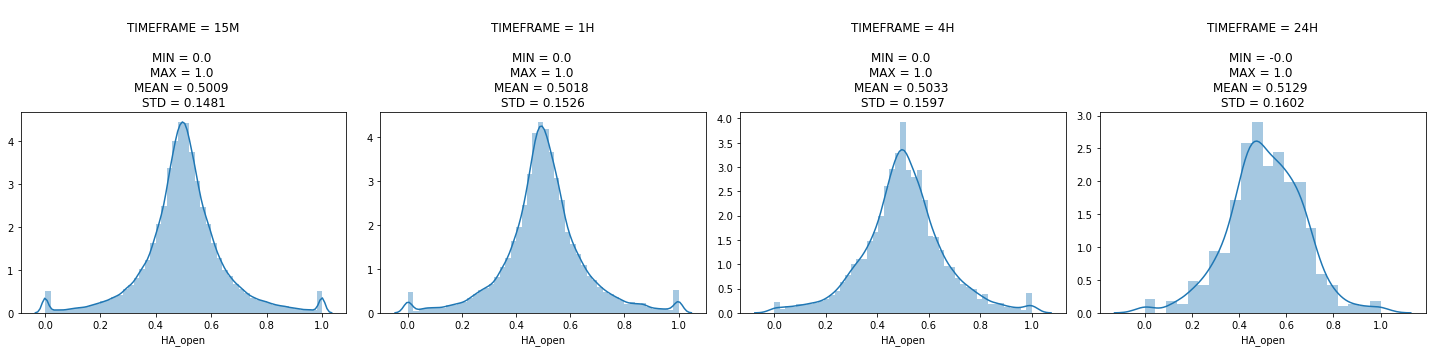

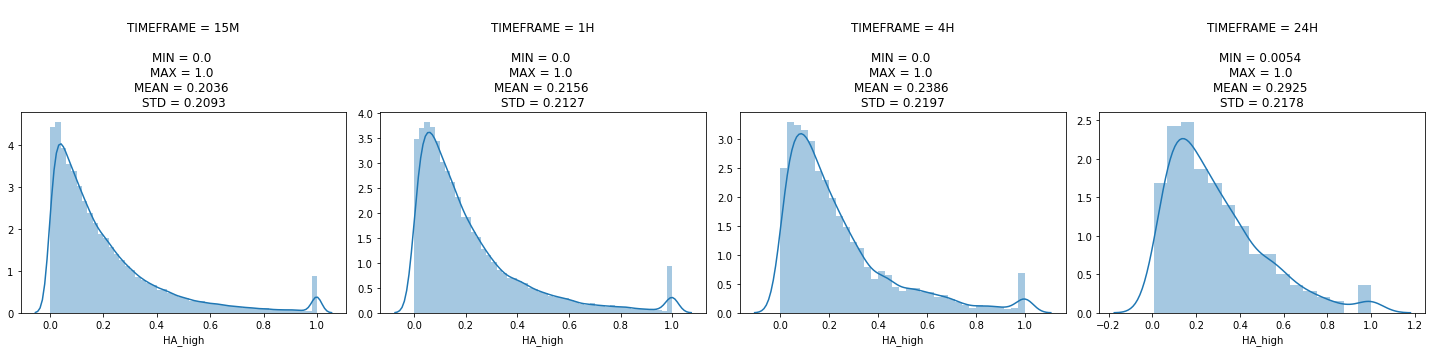

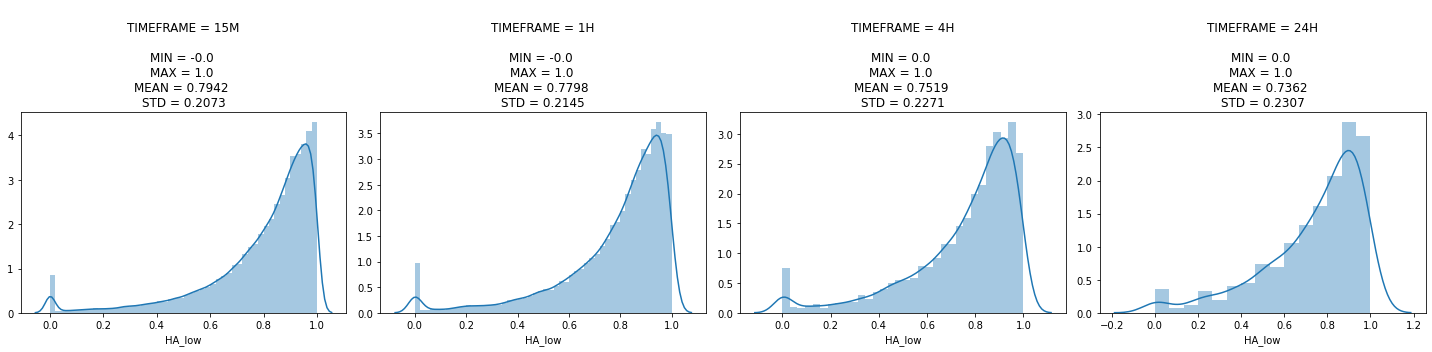

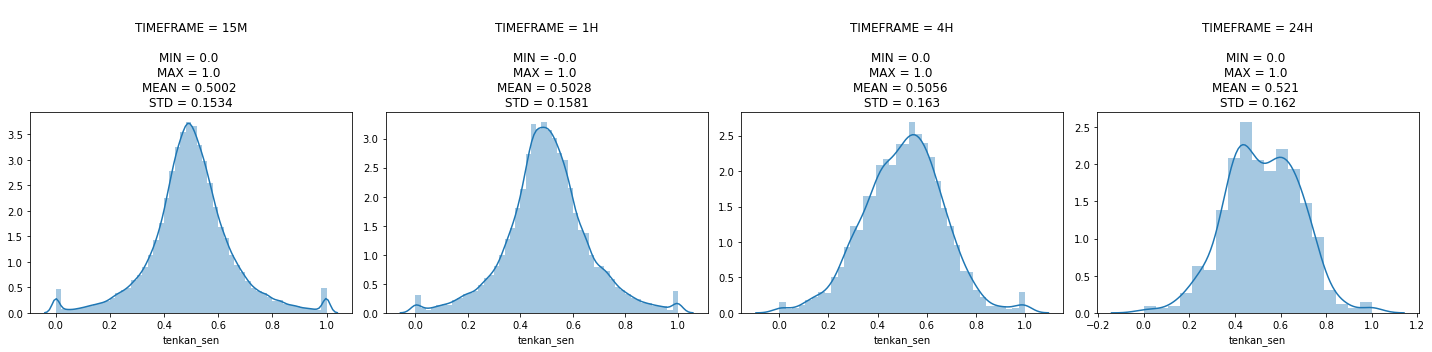

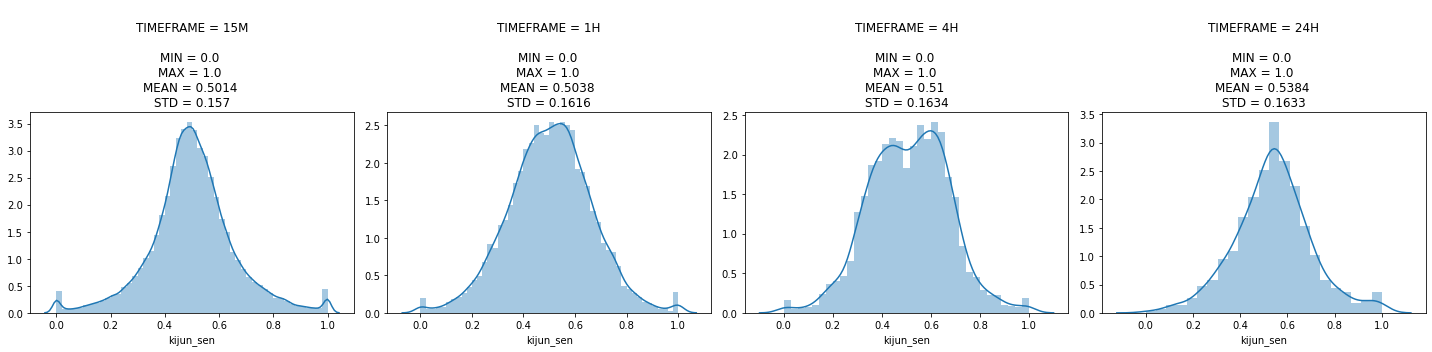

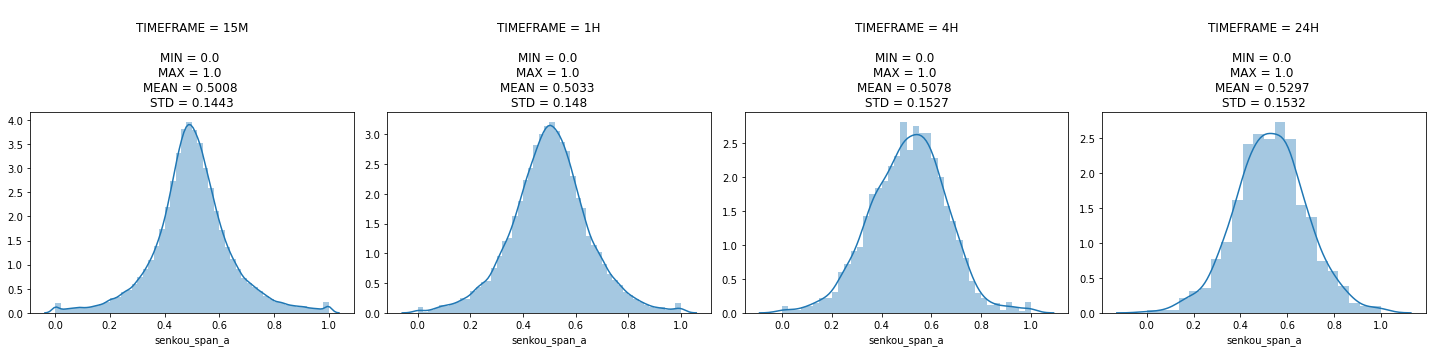

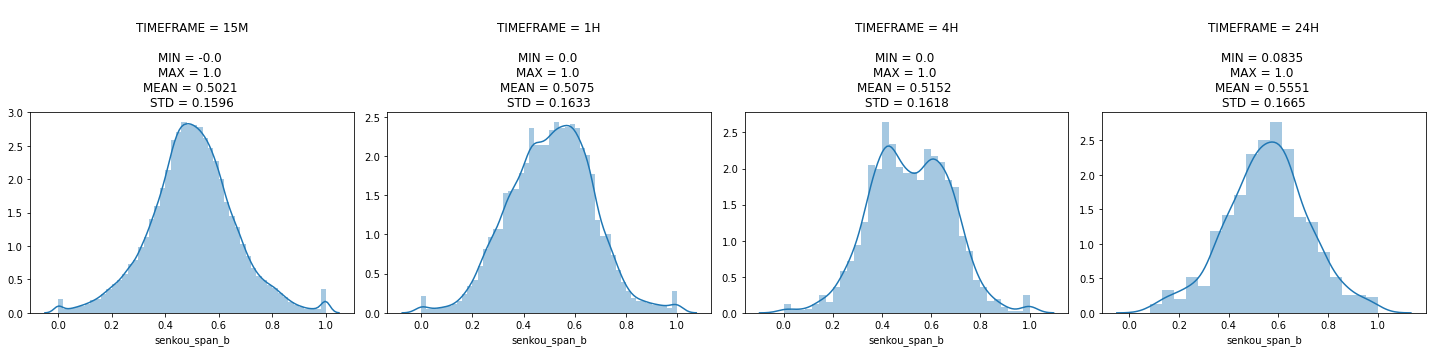

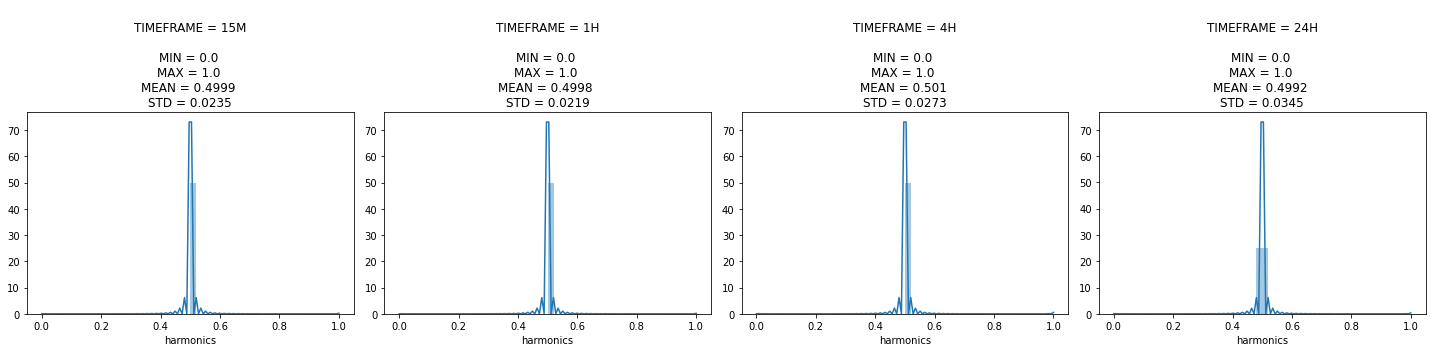

In [16]:
def feature_distribution(currency):
    '''
    Plots all the distributions of the features generated
    '''    
    df_15M = pd.read_csv(currency+'/'+currency+'_preproccessed_15M.csv', index_col=0)
    df_1H = pd.read_csv(currency+'/'+currency+'_preproccessed_1H.csv', index_col=0)
    df_4H = pd.read_csv(currency+'/'+currency+'_preproccessed_4H.csv', index_col=0)
    df_24H = pd.read_csv(currency+'/'+currency+'_preproccessed_24H.csv', index_col=0)
    
    for c in list(df_15M.drop(['open', 'high', 'low', 'close', 'volume'], axis=1).columns):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

        ax1.set_title('\nTIMEFRAME = 15M\n\nMIN = {} \nMAX = {} \nMEAN = {} \nSTD = {}'.format(round(df_15M[c].min(),4), round(df_15M[c].max(),4), round(df_15M[c].mean(),4), round(df_15M[c].std(),4)))
        sns.distplot(df_15M[c], hist=True, ax=ax1)
        ax2.set_title('\nTIMEFRAME = 1H\n\nMIN = {} \nMAX = {} \nMEAN = {} \nSTD = {}'.format(round(df_1H[c].min(),4), round(df_1H[c].max(),4), round(df_1H[c].mean(),4), round(df_1H[c].std(),4)))
        sns.distplot(df_1H[c], hist=True, ax=ax2)
        ax3.set_title('\nTIMEFRAME = 4H\n\nMIN = {} \nMAX = {} \nMEAN = {} \nSTD = {}'.format(round(df_4H[c].min(),4), round(df_4H[c].max(),4), round(df_4H[c].mean(),4), round(df_4H[c].std(),4)))
        sns.distplot(df_4H[c], hist=True, ax=ax3)
        ax4.set_title('\nTIMEFRAME = 24H\n\nMIN = {} \nMAX = {} \nMEAN = {} \nSTD = {}'.format(round(df_24H[c].min(),4), round(df_24H[c].max(),4), round(df_24H[c].mean(),4), round(df_24H[c].std(),4)))
        sns.distplot(df_24H[c], hist=True, ax=ax4)

        fig.tight_layout()
        plt.show()
        
        
        
feature_distribution(currency='EURUSD')

Redefne the function to upload the datasets:

In [19]:
def import_df(currency, timeframe):
    '''
    Import the dataset for any given currency
    '''
    df = pd.read_csv(currency+'/'+currency+'_preproccessed_'+timeframe+'.csv', index_col=0)
    return(df)

I can check the linear correlation of the new features in graphical representation.

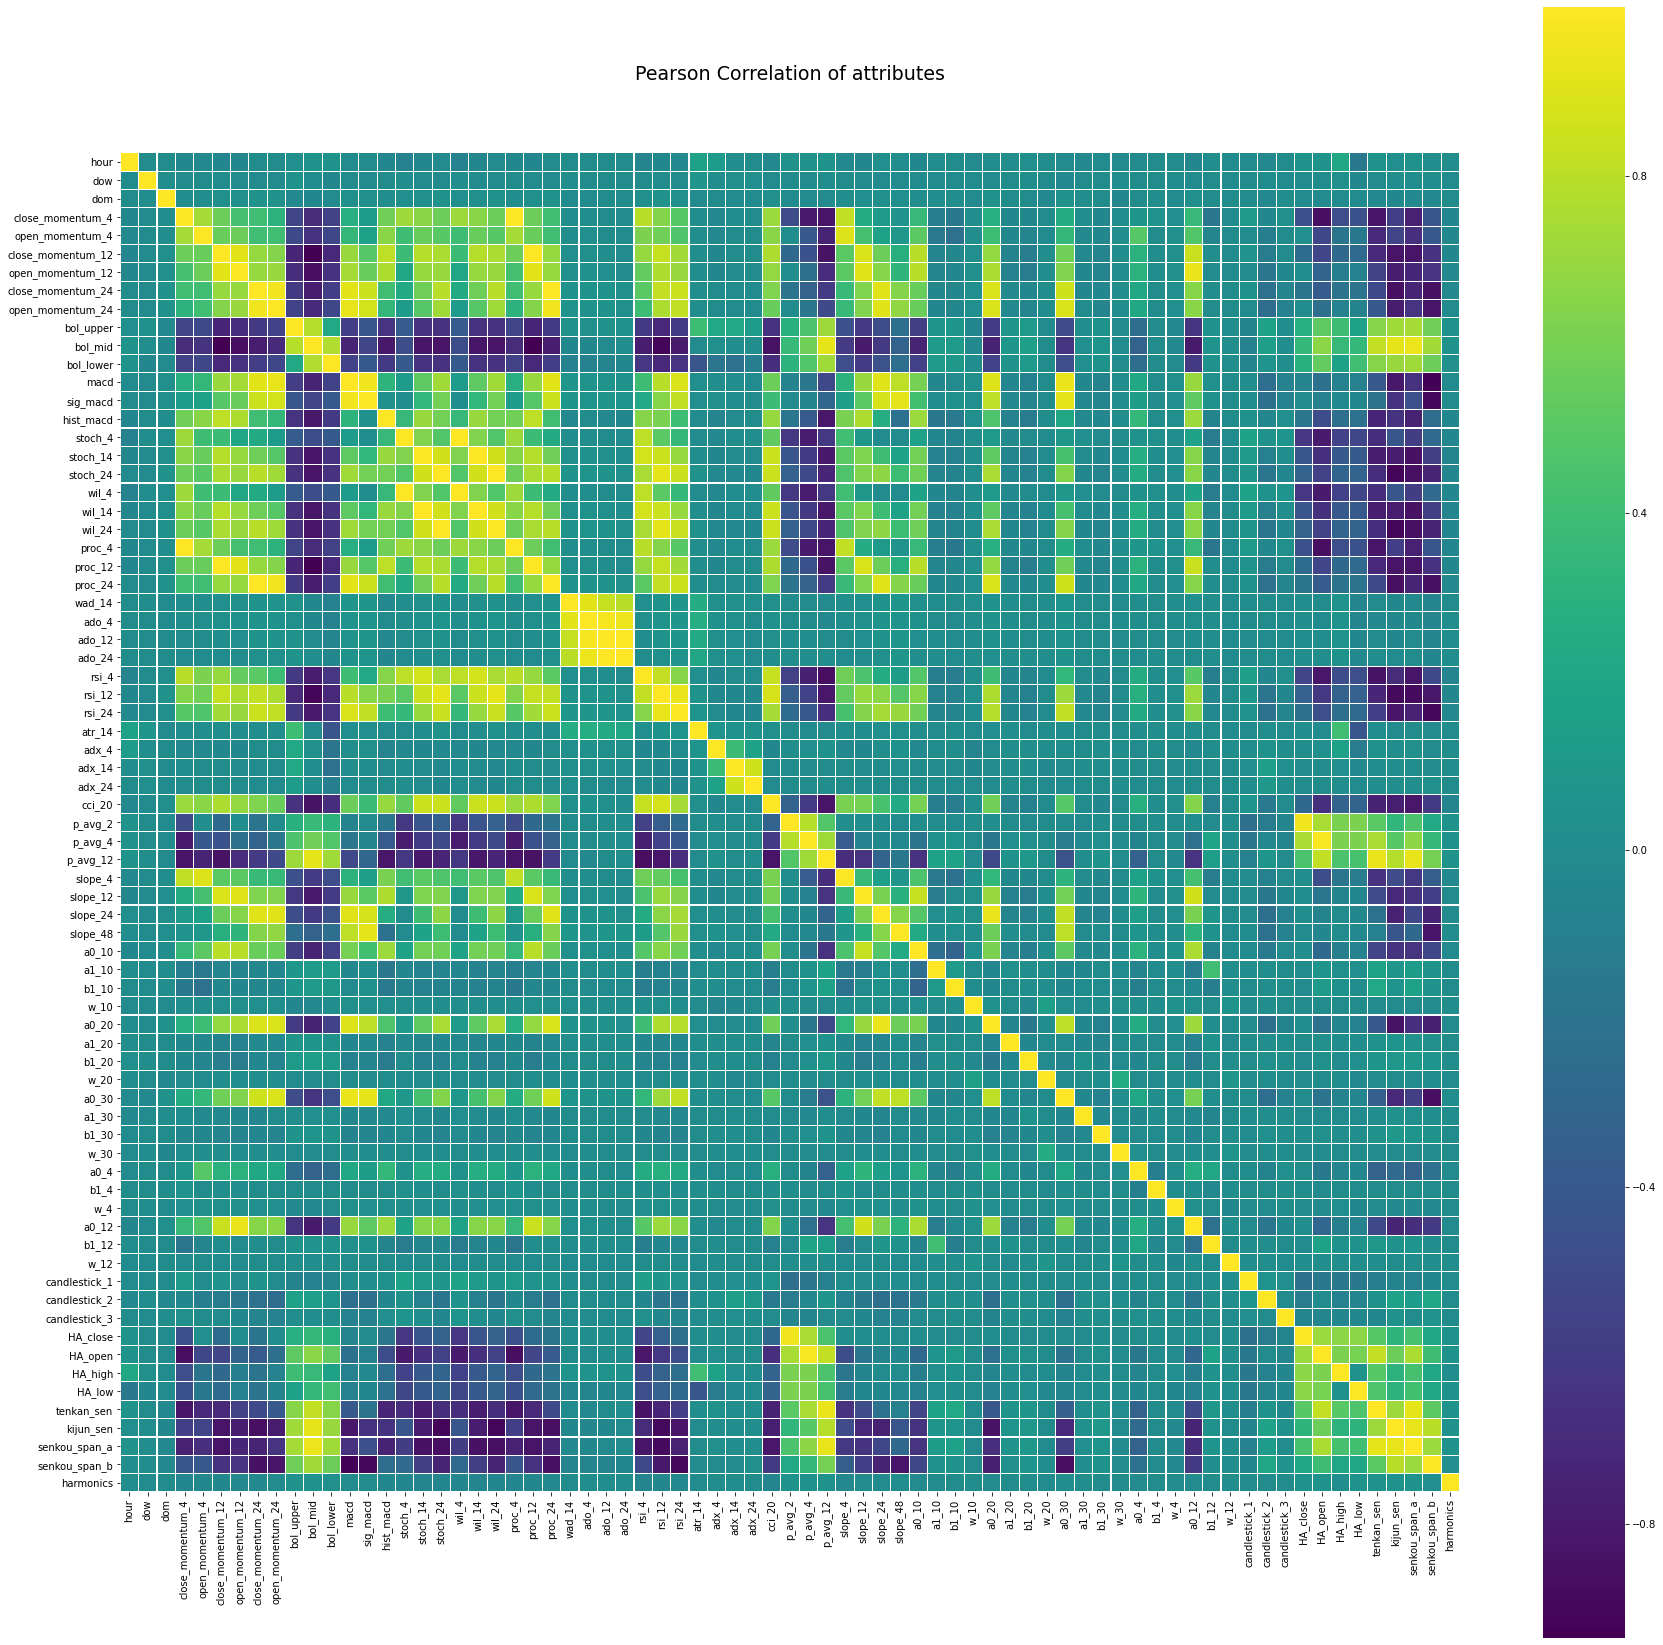

In [21]:
df = import_df(currency='EURUSD', timeframe='1H')
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
cor = sns.heatmap(df.drop(['open', 'high', 'low', 'close', 'volume'], axis=1).corr(),
                  linewidths=0.1,
                  vmax=1.0, 
                  square=True, 
                  cmap=colormap, 
                  linecolor='white', 
                  annot=False)

I can already see that many features are highly correlated. This could lead to overfitting. I can create a function to drop the highly correlated features:

In [24]:
def drop_correlated_features(X_train, X_test, threshold=0.95):
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    X_train.drop(X_train[to_drop], axis=1, inplace=True)
    X_test.drop(X_test[to_drop], axis=1, inplace=True)
    return(X_train, X_test)



df = import_df(currency='EURUSD', timeframe='1H')
X = df.drop(['open', 'high', 'low', 'close', 'volume'], axis=1)
test_ratio=0.25
X_train = X[:int(df.shape[0]*(1-test_ratio))]
X_test = X[int(df.shape[0]*(1-test_ratio)):]
print('Original number of predictors {}'.format(X_train.shape[1]))
X_train, X_test = drop_correlated_features(X_train, X_test)
print('New number of predictors in {}'.format(X_train.shape[1]))

Original number of predictors 73
New number of predictors in 61


The easiest way to undestand the data is a visualization. Unfortunatelly I can't plot any dataset with more than 3 dimensions. I could apply different techniqeus of feature extraction:

- PCA: Principal Component Analysis identifies the combination of components (directions in the feature space) that account for the most variance in the data.
- t-SNE: T-Distributed Stochastic Neighbouring Entities is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. It could potentially lead to better data separation/visualization, because unlike PCA it preserves the local structure of data points.

From this charts I can see how difficult it is to separate the data in positive/negative trades.

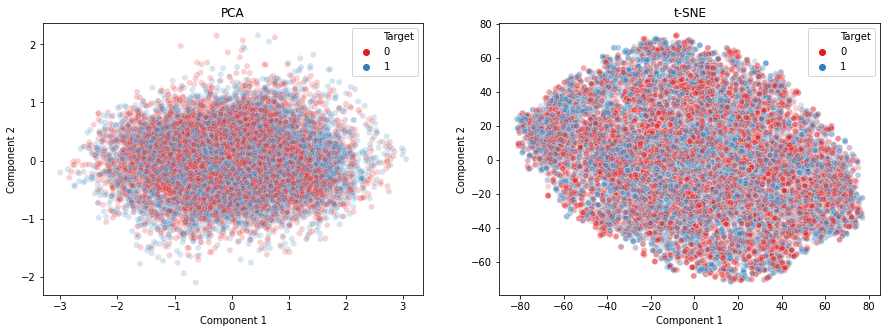

In [75]:
def plot_2d_visualization(currency, timeframe):
    df = import_df(currency='EURUSD', timeframe='1H')
    N=10
    df['Target'] = (df['close'].shift(-N)-df['close'])/df['close']
    df['Target'] = np.where(df['Target']>0, 1, 0)
    df = df.drop(['open', 'high', 'low', 'close', 'volume'], axis=1)
    X = df.drop(['Target'],axis=1)

    feature, axs = plt.subplots(ncols = 2, figsize=(15, 5))

    pca_2 = PCA(n_components = 2)
    X_pca_2 = pca_2.fit_transform(X)
    pca_data = pd.concat([pd.DataFrame(X_pca_2),pd.DataFrame(df['Target'].reset_index(drop=True))],axis=1)
    pca_data.columns = ['Component 1', 'Component 2', 'Target']
    sns.scatterplot(x='Component 1', y='Component 2', hue='Target', data=pca_data, palette='Set1', alpha=0.2, ax=axs[0]).set_title('PCA')

    tsne_2 = TSNE(n_components=2, random_state=1)
    X_tsne_2 = tsne_2.fit_transform(X)
    tsne_data = pd.concat([pd.DataFrame(X_tsne_2),pd.DataFrame(df['Target'].reset_index(drop=True))],axis=1)
    tsne_data.columns = ['Component 1', 'Component 2', 'Target']
    sns.scatterplot(x='Component 1', y='Component 2', hue='Target', data=tsne_data, palette='Set1', alpha=0.2, ax=axs[1]).set_title('t-SNE')
    plt.show()

plot_2d_visualization(currency='EURUSD', timeframe='1H')

 I can use LightGBM (without hyperparameters tuning) to predict the diection of the price (binary classification problem) N step ahead:

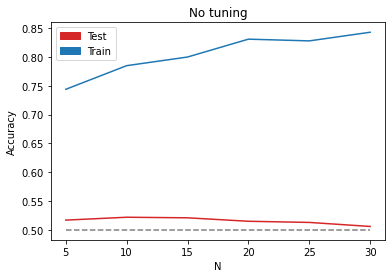

In [23]:
def classification_no_tuning():
    
    df = import_df(currency='EURUSD', timeframe='15M')
    df_backup = df.copy()

    accs_test = []
    accs_train = []
    N_values = np.arange(5,35,5)
    for N in N_values:
        df = df_backup.copy()
        sample = 1
        df = df[:int(sample*len(df))]
        df['Target'] = (df['close'].shift(-N)-df['close'])/df['close']
        df['Target'] = np.where(df['Target']>0, 1, 0)
        X = df.drop(['open', 'high', 'low', 'close', 'volume', 'Target'], axis=1)
        y = df['Target']
        test_ratio=0.25
        X_train = X[:int(df.shape[0]*(1-test_ratio))]
        X_test = X[int(df.shape[0]*(1-test_ratio)):]
        X_train, X_test = drop_correlated_features(X_train, X_test)
        y_train = y[:int(df.shape[0]*(1-test_ratio))]
        y_test = y[int(df.shape[0]*(1-test_ratio)):]
        model = LGBMClassifier(random_state=1)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        acc_test = round(metrics.accuracy_score(y_test, y_pred_test),3)
        acc_train = round(metrics.accuracy_score(y_train, y_pred_train),3)
        accs_test.append(acc_test)
        accs_train.append(acc_train)

    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.title('No tuning')
    plt.plot(N_values, accs_test, color='tab:red')
    plt.plot(N_values, accs_train, color='tab:blue')
    plt.plot(N_values, np.ones(len(N_values))*0.5, '--', color='grey')
    red_patch = mpatches.Patch(color='tab:red', label='Test')
    blue_patch = mpatches.Patch(color='tab:blue', label='Train')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()
    
    
    
classification_no_tuning()

I need to investingate how many features I can drop to avoid overfitting and making the model faster, without decresing the performance. I am dealing with a situation of feature selection for a classification problem that has numerical inputs and categorical outputs. Feature selection is performed using ANOVA F measure via the f_classif() function.

To have a generalize better the problem, I am going to try to run tests using multiple periods (N) ahead.

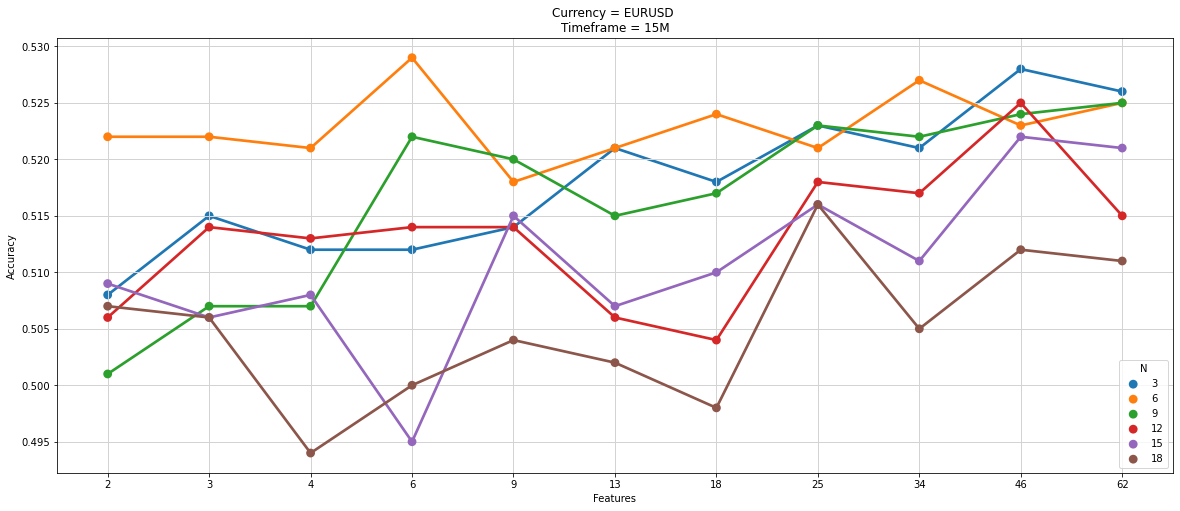

In [32]:
def apply_anova(X_train, X_test, y_train, f):
    selector = SelectKBest(f_classif, k=f)
    selector.fit(X_train, y_train)
    cols = selector.get_support(indices=True)
    best_features = X_train.iloc[:,cols].columns
    X_train = X_train[best_features]
    X_test = X_test[best_features]
    return(X_train, X_test)



def number_features(currency='EURUSD', timeframe='15M', N_values = np.arange(3,21,3)):
    df = import_df(currency=currency, timeframe=timeframe)
    df_backup = df.copy()

    ACCS = []
    for N in N_values:
        df = df_backup.copy()
        df['Target'] = (df['close'].shift(-N)-df['close'])/df['close']
        df['Target'] = np.where(df['Target']>0, 1, 0)
        X = df.drop(['open', 'high', 'low', 'close', 'volume', 'Target'], axis=1)
        y = df['Target'] 
        test_ratio=0.25
        X_train = X[:int(df.shape[0]*(1-test_ratio))]
        X_test = X[int(df.shape[0]*(1-test_ratio)):]
        y_train = y[:int(df.shape[0]*(1-test_ratio))]
        y_test = y[int(df.shape[0]*(1-test_ratio)):]
        X_train, X_test = drop_correlated_features(X_train, X_test)
        X_train_backup = X_train.copy()
        X_test_backup = X_test.copy()

        features_selected = [X_train.shape[1]]
        for i in range(0,10):
            features_selected.append(int(features_selected[-1]*0.75))  
        features_selected = features_selected[::-1]

        accs = []
        for f in features_selected:
            X_train = X_train_backup.copy()
            X_test = X_test_backup.copy()
            X_train, X_test = apply_anova(X_train, X_test, y_train, f=f)
            model = LGBMClassifier(random_state=1)
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            acc_test = round(metrics.accuracy_score(y_test, y_pred_test),3)
            accs.append(acc_test)

        ACCS.append(accs)

    results = pd.DataFrame(data=ACCS, columns=features_selected)
    results = results.set_index([N_values])
    results = results.stack().reset_index()
    results.columns = ['N','Features','Accuracy']
    results = round(results,4)
    plt.figure(figsize=(20,8))
    ax = sns.pointplot(x='Features', y='Accuracy', hue='N', data=results)
    ax.set_title('Currency = {} \nTimeframe = {}'.format(currency, timeframe))
    ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
    ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
    plt.show()
    
    
    
number_features()

A reasonable number of feature seems to be about 25.

There are 3 types of hyperparameter tuning that I could apply to the model in order to improve its performance:
- Grid Search
- Random Search
- Bayesian Optimization (Hyperopt)

I am going to try the last 2 using cross validation on the training set. Below there are definded the 2 functions to execute these searches:

In [28]:
def random_search(X_train, y_train, model=LGBMClassifier(random_state=1), iteration=20, n_folds=5,  scorer=make_scorer(accuracy_score)):
    """
    Return the model with the tuned hyperparameters
    model: model to tune
    iteration: number of combinations to try randomly
    n_fold: number of folds used in the cross-validation
    score: specify what is the score/target of the problem
    """
    param_dist = {'objective': [None],
                  'feature_fraction': np.linspace(0.3,1,8),
                  'bagging_fraction': np.linspace(0.1,1,10),
                  'subsample': np.linspace(0.1,1,10),
                  'colsample_bytree': np.linspace(0.1,1,10),
                  'min_data_in_leaf': sp_randint(20, 1000),
                  'reg_alpha': np.linspace(0,1,11),
                  'reg_lambda': np.linspace(0,1,11),
                  'erbose_eval': [False,True],
                  'booster': ['dart','gbdt'],
                  'num_leaves': sp_randint(2, X_train.shape[1]),
                  'max_depth': sp_randint(1, X_train.shape[1]),
                  'max_bin': sp_randint(10, 200),
                  'n_estimators': sp_randint(10, 500),
                  'learning_rate': np.linspace(0.001,1,30)}
    
    randomCV = RandomizedSearchCV(estimator=model,
                                  param_distributions=param_dist,
                                  n_iter=iteration,
                                  cv=model_selection.KFold(n_splits=n_folds, shuffle=False),
                                  scoring=scorer)
    randomCV.fit(X_train, y_train)
    parameters = randomCV.best_params_
    model = LGBMClassifier(objective=parameters.get('objective'),
                           feature_fraction=parameters.get('feature_fraction'),
                           bagging_fraction=parameters.get('bagging_fraction'),
                           subsample=parameters.get('subsample'),
                           colsample_bytree=parameters.get('colsample_bytree'),
                           min_data_in_leaf=parameters.get('min_data_in_leaf'),
                           reg_alpha=parameters.get('reg_alpha'),   
                           reg_lambda=parameters.get('reg_lambda'),
                           erbose_eval=parameters.get('erbose_eval'),
                           booster=parameters.get('booster'),
                           num_leaves=parameters.get('num_leaves'),
                           max_depth=parameters.get('max_depth'),
                           max_bin=parameters.get('max_bin'),                      
                           n_estimators=parameters.get('n_estimators'),     
                           learning_rate=parameters.get('learning_rate'), 
                           random_state=1)
    return(model)



def hyperopt(X_train, y_train, evaluations=20, n_folds=5, target='accuracy', show_progressbar=False):

    def objective(params):
        classifier_type = params['type']
        del params['type']
        if classifier_type == 'lgbm':
            clf = LGBMClassifier(**params)
#         elif classifier_type == 'svm':
#             clf = SVC(**params)
        else:
            return 0
        
        if target=='precision':
            score = cross_val_score(clf, X_train, y_train, cv=model_selection.KFold(n_splits=n_folds, shuffle=False, random_state=1), scoring=make_scorer(precision_score, average='weighted')).mean()    
        elif target=='accuracy':
            score = cross_val_score(clf, X_train, y_train, cv=model_selection.KFold(n_splits=n_folds, shuffle=False, random_state=1), scoring=make_scorer(accuracy_score)).mean() 
        elif target=='auc':
            score = cross_val_score(clf, X_train, y_train, cv=model_selection.KFold(n_splits=n_folds, shuffle=False, random_state=1), scoring=make_scorer(roc_auc_score)).mean() 
        return {'loss': -score, 'status': STATUS_OK}
    
    

    search_space = hp.choice('classifier_type', [
                                                    {
                                                        'type': 'lgbm',
                                                        'objective': hp.choice('objective', [None]),
                                                        'class_weight': hp.choice('class_weight', [None, 'balanced']),
                                                        'erbose_eval': hp.choice('erbose_eval', [None, 'balanced']),
                                                        'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
                                                        'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
                                                        'max_depth': hp.choice('max_depth', np.arange(3, 30, 1)),
                                                        'n_estimators': hp.choice('n_estimators', np.arange(10, 500, 10)),
                                                        'num_leaves': hp.choice('num_leaves', np.arange(5, 100, 10)),
                                                        'max_bin': hp.choice('max_bin', np.arange(10, 200, 10)),
                                                        'min_child_samples': hp.choice('min_child_samples', np.arange(20, 500, 5)),
                                                        'min_child_weight': hp.choice('min_child_weight', np.arange(1, 100, 1)),
                                                        'min_data_in_leaf': hp.choice('min_data_in_leaf', np.arange(20, 500, 5)),
                                                        'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
                                                        'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
                                                        'feature_fraction': hp.uniform('feature_fraction', 0.1, 1.0),
                                                        'bagging_fraction': hp.uniform('bagging_fraction', 0.1, 1.0),
                                                        'colsample_bytree': hp.uniform('colsample_by_tree', 0.1, 1.0),
                                                        'subsample': hp.choice('subsample', np.arange(0.5, 1, 0.01))
                                                    },

#                                                     {
#                                                         'type': 'svm',
#                                                         'C': hp.lognormal('C', 0, 1.0),
#                                                         'kernel': hp.choice('kernel', ['linear', 'rbf'])
#                                                     },
    ])
    
    dict_hyperparameters_lgbm = {'objective': [None],
                                 'class_weight': [None, 'balanced'],
                                 'erbose_eval': [None, 'balanced'],
                                 'boosting_type': ['gbdt', 'dart'],
                                 }

    with mlflow.start_run():
        best_parameters = fmin(fn=objective, 
                               space=search_space,
                               algo=tpe.suggest,
                               max_evals=evaluations,
                               trials=Trials(),
                               show_progressbar=show_progressbar)
#                           trials=SparkTrials(parallelism=2, timeout=100))
    
    model = LGBMClassifier(objective = dict_hyperparameters_lgbm.get('objective')[best_parameters.get('objective')],
                           class_weight = dict_hyperparameters_lgbm.get('class_weight')[best_parameters.get('class_weight')],
                           erbose_eval = dict_hyperparameters_lgbm.get('erbose_eval')[best_parameters.get('erbose_eval')],
                           boosting_type = dict_hyperparameters_lgbm.get('boosting_type')[best_parameters.get('boosting_type')],
                           learning_rate = max(0.001, best_parameters.get('learning_rate')),
                           max_depth = max(3, best_parameters.get('max_depth')),
                           n_estimators = max(10, best_parameters.get('n_estimators')),
                           num_leaves = max(2, best_parameters.get('num_leaves')),
                           max_bin = max(10, best_parameters.get('max_bin')),
                           min_child_samples = max(20, best_parameters.get('min_child_samples')),
                           min_child_weight = max(1, best_parameters.get('min_child_weight')),
                           min_data_in_leaf = max(20, best_parameters.get('min_data_in_leaf')),
                           reg_alpha = best_parameters.get('reg_alpha'),
                           reg_lambda = best_parameters.get('reg_lambda'),
                           feature_fraction = best_parameters.get('feature_fraction'),
                           bagging_fraction = best_parameters.get('bagging_fraction'),
                           colsample_bytree = best_parameters.get('colsample_bytree'),
                           subsample = max(0.5, best_parameters.get('subsample')),
                           random_state=1)
                                         
    return(model)

Run the test using the 2 different methods to tune the hyperparameters:

100%|███████████████████████████████████████████████| 20/20 [04:19<00:00, 12.98s/trial, best loss: -0.5246043582859198]
3 completed
100%|███████████████████████████████████████████████| 20/20 [06:03<00:00, 18.16s/trial, best loss: -0.5350743611956411]
6 completed
100%|███████████████████████████████████████████████| 20/20 [02:00<00:00,  6.04s/trial, best loss: -0.5293876080681016]
9 completed
100%|███████████████████████████████████████████████| 20/20 [04:49<00:00, 14.49s/trial, best loss: -0.5276633163536727]
12 completed
100%|███████████████████████████████████████████████| 20/20 [03:58<00:00, 11.92s/trial, best loss: -0.5200465428985406]
15 completed
100%|███████████████████████████████████████████████| 20/20 [06:56<00:00, 20.82s/trial, best loss: -0.5235161300946541]
18 completed


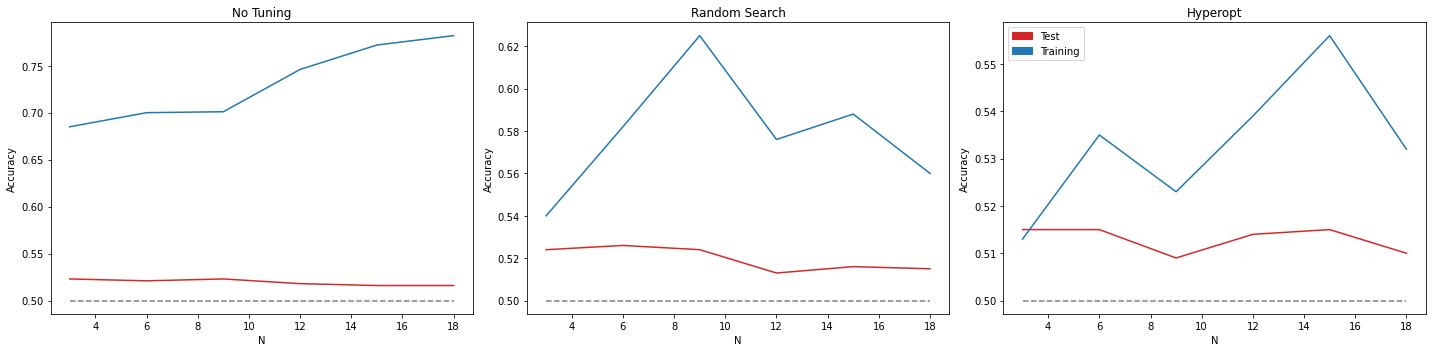

In [34]:
def tuning_method():
    df = import_df(currency='EURUSD', timeframe='15M')
    sample=1
    df = df[:int(sample*len(df))]
    df_backup = df.copy()

    accs_test = []
    accs_train = []
    accs_test_random_search = []
    accs_train_random_search = []
    accs_test_hyperopt = []
    accs_train_hyperopt = []
    N_values = np.arange(3,21,3)
    for N in N_values:
        df = df_backup.copy()
        df['Target'] = (df['close'].shift(-N)-df['close'])/df['close']
        df['Target'] = np.where(df['Target']>0, 1, 0)
        X = df.drop(['open', 'high', 'low', 'close', 'volume', 'Target'], axis=1)
        y = df['Target']
        test_ratio=0.25
        X_train = X[:int(df.shape[0]*(1-test_ratio))]
        X_test = X[int(df.shape[0]*(1-test_ratio)):]
        y_train = y[:int(df.shape[0]*(1-test_ratio))]
        y_test = y[int(df.shape[0]*(1-test_ratio)):]
        X_train, X_test = drop_correlated_features(X_train, X_test)
        X_train, X_test = apply_anova(X_train, X_test, y_train, f=25)

        model = LGBMClassifier(random_state=1)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        acc_test = round(metrics.accuracy_score(y_test, y_pred_test),3)
        acc_train = round(metrics.accuracy_score(y_train, y_pred_train),3)
        accs_test.append(acc_test)
        accs_train.append(acc_train)

        model = random_search(X_train, y_train)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        acc_test = round(metrics.accuracy_score(y_test, y_pred_test),3)
        acc_train = round(metrics.accuracy_score(y_train, y_pred_train),3)
        accs_test_random_search.append(acc_test)
        accs_train_random_search.append(acc_train)

        model = hyperopt(X_train, y_train, evaluations=20, n_folds=5, show_progressbar=True)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        acc_test = round(metrics.accuracy_score(y_test, y_pred_test),3)
        acc_train = round(metrics.accuracy_score(y_train, y_pred_train),3)
        accs_test_hyperopt.append(acc_test)
        accs_train_hyperopt.append(acc_train)
        
        print('{} completed'.format(N))
        

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

    ax1.set_title('No Tuning')
    ax1.set_xlabel('N')
    ax1.set_ylabel('Accuracy')
    ax1.plot(N_values, accs_test, color='tab:red')
    ax1.plot(N_values, accs_train, color='tab:blue')
    ax1.plot(N_values, np.ones(len(N_values))*0.5, '--', color='grey')

    ax2.set_title('Random Search')
    ax2.set_xlabel('N')
    ax2.set_ylabel('Accuracy')
    ax2.plot(N_values, accs_test_random_search, color='tab:red')
    ax2.plot(N_values, accs_train_random_search, color='tab:blue')
    ax2.plot(N_values, np.ones(len(N_values))*0.5, '--', color='grey')

    ax3.set_title('Hyperopt')
    ax3.set_xlabel('N')
    ax3.set_ylabel('Accuracy')
    ax3.plot(N_values, accs_test_hyperopt, color='tab:red')
    ax3.plot(N_values, accs_train_hyperopt, color='tab:blue')
    ax3.plot(N_values, np.ones(len(N_values))*0.5, '--', color='grey')

    red_patch = mpatches.Patch(color='tab:red', label='Test')
    blue_patch = mpatches.Patch(color='tab:blue', label='Training')
    plt.legend(handles=[red_patch, blue_patch])

    fig.tight_layout()
    plt.show()
    
    
    
tuning_method()

None of the hyperparameter tuning methods produced a considerable uplift of the performance on the test set. However, Hyperopt is the one which is overfitting less.

I could also try to change the target variable. I am going to transofrm the problem to a multi-classification problem:
- 1 = When buying the pair would have generated a profit
- -1 = When selling the pair would have generated a profit
- 0 = None of the actions would have generated a profit

In [35]:
def create_target_buy(df):
    buys = []
    for i in range(0,len(df)):
        n=0
        stop=False
        while stop==False:
            n += 1
            if i+n >= len(df):
                buy = np.nan
                buys.append(buy)
                break 
            else:
                stop = (df['high'].values[i+n]>df['tp_buy'].values[i] or df['low'].values[i+n]<df['sl_buy'].values[i])
                if stop==True:
                    if df['high'].values[i+n]>df['tp_buy'].values[i]:
                        buy = 1
                    elif df['low'].values[i+n]<df['sl_buy'].values[i]:
                        buy = 0
                    buys.append(buy)
                    break
    df['Target_buy'] = buys
    df.dropna(inplace=True)
    return(df)



def create_target_sell(df):
    sells = []
    for i in range(0,len(df)):
        n=0
        stop=False
        while stop==False:
            n += 1
            if i+n >= len(df):
                sell = np.nan
                sells.append(sell)
                break 
            else:
                stop = (df['high'].values[i+n]>df['sl_sell'].values[i] or df['low'].values[i+n]<df['tp_sell'].values[i])
                if stop==True:
                    if df['high'].values[i+n]>df['sl_sell'].values[i]:
                        sell = 0
                    elif df['low'].values[i+n]<df['tp_sell'].values[i]:
                        sell = 1
                    sells.append(sell)
                    break
    df['Target_sell'] = sells
    df.dropna(inplace=True)
    return(df)



def create_target(df):
    df = create_target_buy(df) 
    df = create_target_sell(df)
    df['Target'] = df['Target_buy'] - df['Target_sell']
    df.drop(['Target_buy','Target_sell'], axis=1, inplace=True)
    return(df) 

Running the model:

100%|███████████████████████████████████████████████| 20/20 [14:33<00:00, 43.67s/trial, best loss: -0.3457385955739548]

 15M Classification Report:

              precision    recall  f1-score   support

        -1.0      0.352     0.380     0.365      5599
         0.0      0.336     0.386     0.359      5566
         1.0      0.298     0.223     0.255      5064

    accuracy                          0.333     16229
   macro avg      0.328     0.329     0.326     16229
weighted avg      0.329     0.333     0.329     16229

              precision    recall  f1-score   support

        -1.0      0.428     0.381     0.403     16019
         0.0      0.396     0.489     0.437     16729
         1.0      0.432     0.373     0.401     15928

    accuracy                          0.415     48676
   macro avg      0.419     0.414     0.414     48676
weighted avg      0.418     0.415     0.414     48676



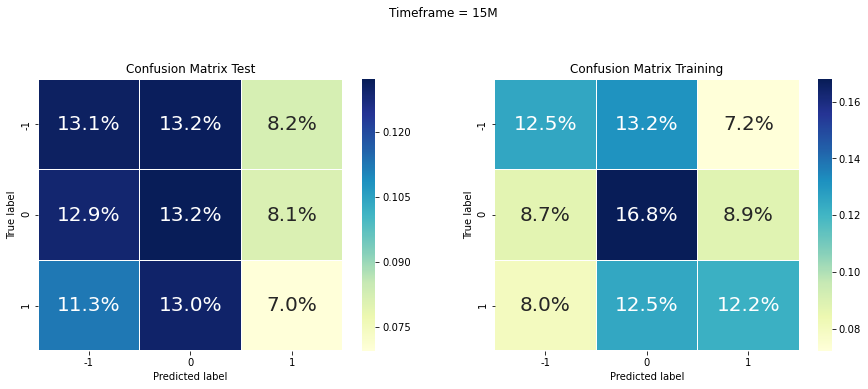

100%|███████████████████████████████████████████████| 20/20 [03:52<00:00, 11.61s/trial, best loss: -0.3546982777960882]

 1H Classification Report:

              precision    recall  f1-score   support

        -1.0      0.365     0.555     0.440      1413
         0.0      0.340     0.255     0.292      1402
         1.0      0.314     0.214     0.255      1218

    accuracy                          0.348      4033
   macro avg      0.340     0.341     0.329      4033
weighted avg      0.341     0.348     0.333      4033

              precision    recall  f1-score   support

        -1.0      0.436     0.513     0.472      4133
         0.0      0.438     0.358     0.394      4196
         1.0      0.430     0.435     0.432      3772

    accuracy                          0.435     12101
   macro avg      0.435     0.435     0.433     12101
weighted avg      0.435     0.435     0.432     12101



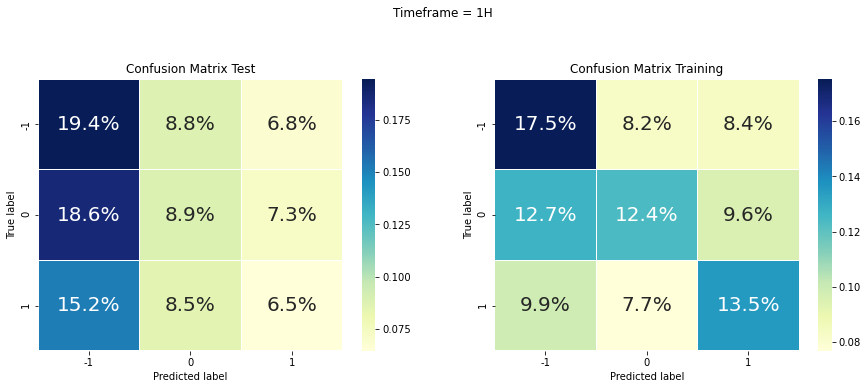

100%|█████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.61s/trial, best loss: -0.37756708624123]

 4H Classification Report:

              precision    recall  f1-score   support

        -1.0      0.379     0.680     0.487       350
         0.0      0.389     0.131     0.196       320
         1.0      0.308     0.241     0.270       303

    accuracy                          0.363       973
   macro avg      0.359     0.351     0.318       973
weighted avg      0.360     0.363     0.324       973

              precision    recall  f1-score   support

        -1.0      0.552     0.545     0.549      1139
         0.0      0.465     0.320     0.379       904
         1.0      0.431     0.569     0.491       933

    accuracy                          0.484      2976
   macro avg      0.483     0.478     0.473      2976
weighted avg      0.488     0.484     0.479      2976



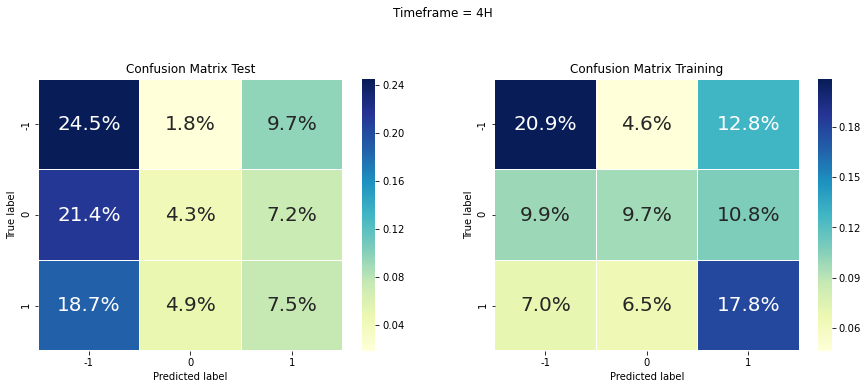

100%|█████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.01trial/s, best loss: -0.49337609292481]

 24H Classification Report:

              precision    recall  f1-score   support

        -1.0      0.328     0.500     0.396        38
         0.0      0.067     0.032     0.043        31
         1.0      0.512     0.468     0.489        47

    accuracy                          0.362       116
   macro avg      0.302     0.333     0.309       116
weighted avg      0.332     0.362     0.339       116

              precision    recall  f1-score   support

        -1.0      0.585     0.632     0.608       174
         0.0      0.750     0.286     0.414       189
         1.0      0.236     0.629     0.344        62

    accuracy                          0.478       425
   macro avg      0.524     0.516     0.455       425
weighted avg      0.608     0.478     0.483       425



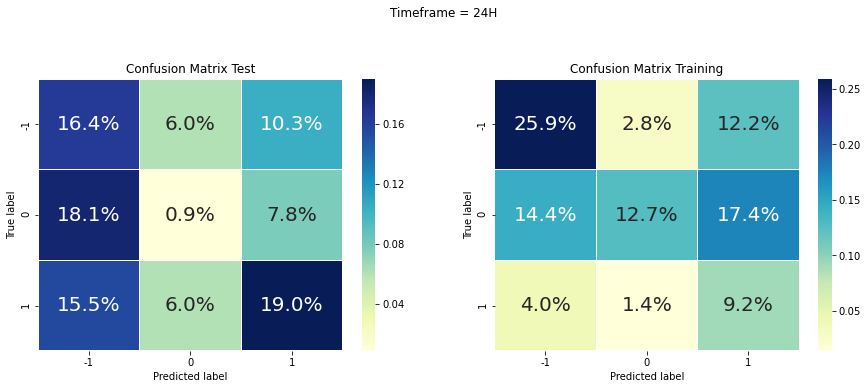

In [50]:
def run_multiclassifier(currency, 
                        timeframe, 
                        sample=1,
                        apply_drop_correlated_features=True, 
                        apply_features_selection=True, 
                        apply_tuning=True,
                       ):

    df = import_df(currency, timeframe)
    df = set_sl_tp(df, periods=24, N=1.5, ratio=2)
    df = df[:int(sample*len(df))]
    
    test_ratio = 0.25
    train = df[:int(df.shape[0]*(1-test_ratio))]
    train = create_target(train)

    X_train = train.drop(['open', 'high', 'low', 'close', 'volume','sl_buy','sl_sell','tp_buy','tp_sell','Target'], axis=1)
    y_train = train['Target']

    test = df[int(df.shape[0]*(1-test_ratio)):]
    test = create_target(test)
    X_test = test.drop(['open', 'high', 'low', 'close', 'volume','sl_buy','sl_sell','tp_buy','tp_sell','Target'], axis=1)
    y_test = test['Target']
    
    if apply_drop_correlated_features==True:
        X_train, X_test = drop_correlated_features(X_train, X_test)
        
    if apply_features_selection==True:
        X_train, X_test = apply_anova(X_train, X_test, y_train, f=25)
        
    if apply_tuning==True:
        model = hyperopt(X_train, y_train, evaluations=20, n_folds=5, target='precision', show_progressbar=True)
        
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_train = model.predict_proba(X_train)

    print('\n', timeframe, 'Classification Report:\n')
    print(classification_report(y_test, y_pred_test, digits=3))
    print(classification_report(y_train, y_pred_train, digits=3))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Timeframe = {}'.format(timeframe), y=1.08)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_test = cm_test/cm_test.sum()
    sns.heatmap(cm_test, 
                annot=True,  
                fmt='.1%',
                annot_kws={'size': 20},
                xticklabels=['-1','0','1'] , 
                yticklabels=['-1','0','1'], 
                linewidths=0.1, 
                linecolor='white',
                cmap='YlGnBu',
                ax=ax1)
    ax1.set_xlabel('Predicted label')
    ax1.set_ylabel('True label')
    ax1.set_title('Confusion Matrix Test')

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_train = cm_train/cm_train.sum()
    sns.heatmap(cm_train, 
                annot=True,  
                fmt='.1%',
                annot_kws={'size': 20},
                xticklabels=['-1','0','1'] , 
                yticklabels=['-1','0','1'], 
                linewidths=0.1, 
                linecolor='white',
                cmap='YlGnBu',
                ax=ax2)
    ax2.set_xlabel('Predicted label')
    ax2.set_ylabel('True label')
    ax2.set_title('Confusion Matrix Training')
    plt.show()
    
    
    
for timeframe in ['15M','1H','4H','24H']:       

    run_multiclassifier(currency='EURUSD', 
                        timeframe=timeframe,
                        sample=1)

A powerful and popular recurrent neural network is the long short-term model network or LSTM. I am going to use this model to try to predict the price. First let's prepare the data for classification. I am going to use a smoothed shape of the trend as input and a binary target looking at 10 steps ahead.

In [4]:
def transform_data(sample=1,
                   lag=10,
                   timesteps=60,
                   features=['close']):
    
    df = import_and_clean_df(currency='EURUSD')
    df = df[:int(sample*len(df))]
    df = df[['close']]
    output_target = pd.DataFrame(np.where(df['close']<df['close'].shift(-lag), 1 ,0)).set_index(df.index)
    name_target = 'close_(t+'+str(lag)+')'
    output_target.columns = [name_target]
    cols_price, names_price = list(), list()
    for i in range(timesteps-1, -1, -1):
        cols_price.append(df['close'].shift(i)-df['close'])         
        names_price.append('close_(t-'+str(i)+')')
    output_price = pd.concat(cols_price, axis=1)
    output_price.columns = names_price
    output_price = output_price/(3*output_price.stack().std())
    output = pd.concat([output_price,output_target], axis=1)

    old_target = output.iloc[:,-1]
    old_inputs = output.iloc[:,:-1].values
    new_inputs = []
    for i in range(0,len(old_inputs)):
        y = old_inputs[i,:]
        x = np.arange(0,len(y))
        degree = 10
        coefficients = np.polyfit(x, y, degree)
        poly = np.poly1d(coefficients)
        new_y = poly(x)
        new_inputs.append(new_y)

    new_inputs = pd.DataFrame(new_inputs).set_index(old_target.index)
    new_inputs.columns = names_price
    output = pd.concat([new_inputs,old_target], axis=1)
    output.dropna(inplace=True)
    return(output, df, lag, timesteps, features, name_target)



output, df, lag, timesteps, features, name_target = transform_data()
output

close_(t-59)  close_(t-58)  close_(t-57)  close_(t-56)  \
2017-09-26 22:15:00      0.918363      0.728325      0.690549      0.716380   
2017-09-26 22:30:00      0.819104      0.683509      0.671308      0.704915   
2017-09-26 22:45:00      0.656497      0.642517      0.667340      0.695060   
2017-09-26 23:00:00      0.626612      0.742029      0.787789      0.787910   
2017-09-26 23:15:00      0.562734      0.813016      0.871832      0.832921   
...                           ...           ...           ...           ...   
2020-05-13 15:30:00     -0.341403     -0.288570     -0.279214     -0.288646   
2020-05-13 15:45:00     -0.393808     -0.365034     -0.366033     -0.377495   
2020-05-13 16:00:00     -0.338405     -0.317539     -0.323777     -0.336824   
2020-05-13 16:15:00     -0.235711     -0.250173     -0.268133     -0.279368   
2020-05-13 16:30:00     -0.124679     -0.153922     -0.170399     -0.172768   

                     close_(t-55)  close_(t-54)  close_(t-53)  close_(t-52)  \
2017-09-26 22:15:00      0.754555      0.779187      0.780718      0.759267   
2017-09-26 22:30:00      0.740809      0.758311      0.751176      0.721467   
2017-09-26 22:45:00      0.708133      0.700766      0.674062      0.632598   
2017-09-26 23:00:00      0.760272      0.717665      0.668773      0.619065   
2017-09-26 23:15:00      0.754843      0.671211      0.598637      0.542779   
...                           ...           ...           ...           ...   
2020-05-13 15:30:00     -0.301899     -0.310961     -0.312590     -0.306617   
2020-05-13 15:45:00     -0.388286     -0.393028     -0.390197     -0.380647   
2020-05-13 16:00:00     -0.345961     -0.346912     -0.339450     -0.325612   
2020-05-13 16:15:00     -0.280354     -0.271661     -0.256037     -0.237067   
2020-05-13 16:30:00     -0.163264     -0.145854     -0.124943     -0.104548   

                     close_(t-51)  close_(t-50)  ...  close_(t-8)  \
2017-09-26 22:15:00      0.719930      0.669591  ...     0.085468   
2017-09-26 22:30:00      0.675264      0.619809  ...     0.134876   
2017-09-26 22:45:00      0.582115      0.528075  ...     0.137874   
2017-09-26 23:00:00      0.571593      0.527681  ...     0.205091   
2017-09-26 23:15:00      0.502822      0.474680  ...     0.207420   
...                           ...           ...  ...          ...   
2020-05-13 15:30:00     -0.294658     -0.279160  ...    -0.185145   
2020-05-13 15:45:00     -0.366506     -0.350371  ...    -0.205404   
2020-05-13 16:00:00     -0.308419     -0.291003  ...    -0.113733   
2020-05-13 16:15:00     -0.218266     -0.202532  ...    -0.004393   
2020-05-13 16:30:00     -0.087821     -0.076826  ...     0.141529   

                     close_(t-7)  close_(t-6)  close_(t-5)  close_(t-4)  \
2017-09-26 22:15:00     0.163245     0.219638     0.241976     0.221778   
2017-09-26 22:30:00     0.200771     0.236949     0.231938     0.180634   
2017-09-26 22:45:00     0.182256     0.193286     0.163293     0.092278   
2017-09-26 23:00:00     0.224375     0.215099     0.174692     0.106771   
2017-09-26 23:15:00     0.198944     0.170238     0.124701     0.069525   
...                          ...          ...          ...          ...   
2020-05-13 15:30:00    -0.127501    -0.072670    -0.024652     0.012591   
2020-05-13 15:45:00    -0.153337    -0.109790    -0.077859    -0.059014   
2020-05-13 16:00:00    -0.069058    -0.033824    -0.009853     0.002485   
2020-05-13 16:15:00     0.033341     0.061823     0.079896     0.087144   
2020-05-13 16:30:00     0.171955     0.193293     0.204516     0.204420   

                     close_(t-3)  close_(t-2)  close_(t-1)  close_(t-0)  \
2017-09-26 22:15:00     0.160070     0.074899     0.011560     0.056130   
2017-09-26 22:30:00     0.090534    -0.009632    -0.058300     0.054120   
2017-09-26 22:45:00    -0.006139    -0.096666    -0.111717     0.062295   
2017-09-26 23:00:00     0.024714    -0.043708    -0.050460     0.080087   
2017-09-26 23:15:0

Here there is a visualization of the transformed input:

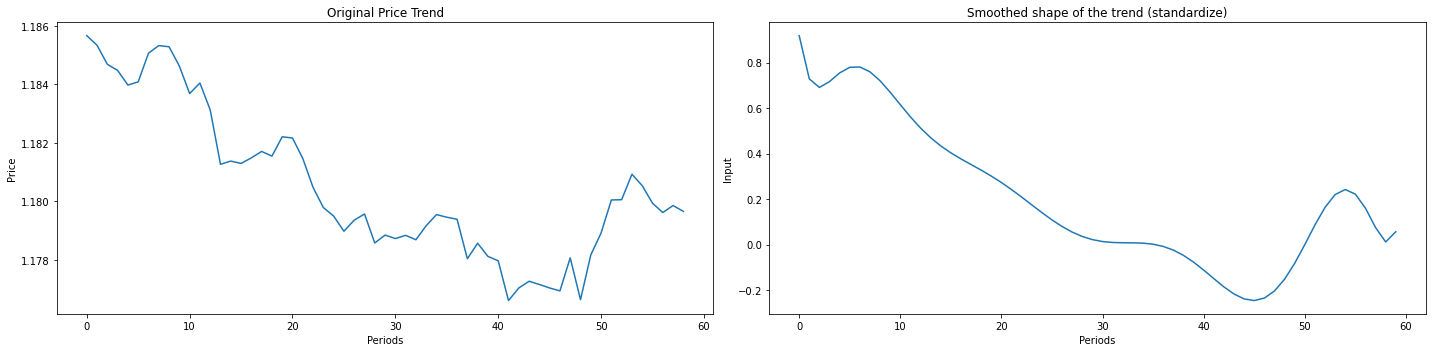

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

i=0

df = import_and_clean_df(currency='EURUSD')
ax1.set_title('Original Price Trend')
ax1.set_xlabel('Periods')
ax1.set_ylabel('Price')
ax1.plot(df['close'][i:i+timesteps-1].values)

ax2.set_title('Smoothed shape of the trend (standardize)')
ax2.set_xlabel('Periods')
ax2.set_ylabel('Input ')
ax2.plot(output.iloc[i,:-1].values)

fig.tight_layout()
plt.show()

Prepare the datasets for the training-test split:

In [13]:
def prepare_dataset(output, test_ratio=0.25):
    train_validation = output[:int(len(output)*(1-test_ratio))]
    train = train_validation[:int(len(train_validation)*(1-test_ratio))]
    validation = train_validation[int(len(train_validation)*(1-test_ratio)):]
    test = output[int(len(output)*(1-test_ratio)):] 

    X_train = train.drop(name_target, axis=1)
    X_train = X_train.values.reshape((X_train.shape[0], timesteps, len(features)))
    y_train = train[name_target].values
    
    X_validation = validation.drop(name_target, axis=1)
    X_validation = X_validation.values.reshape((X_validation.shape[0], timesteps, len(features)))
    y_validation = validation[name_target].values

    X_test = test.drop(name_target, axis=1)
    X_test = X_test.values.reshape((X_test.shape[0], timesteps, len(features)))
    y_test = test[name_target].values
    return(train, validation, test, X_train, y_train, X_validation, y_validation, X_test, y_test)



train, validation, test, X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(output)

Define the model:

In [19]:
def run_lstm(layers=1, dropout=0, batch_size=1, nb_epoch=1, reset_states=True):
    
    keras.backend.clear_session()
    model = Sequential()
    
    for l in range(0,layers-1):
        model.add(LSTM(units=X_train.shape[1]*X_train.shape[2], batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True, recurrent_dropout=dropout, return_sequences=True))

    model.add(LSTM(units=X_train.shape[1]*X_train.shape[2], batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True, recurrent_dropout=dropout))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    for i in range(nb_epoch):
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0, shuffle=False, validation_data=(X_validation, y_validation))
        if reset_states==True:
            model.reset_states()
            
    accuracy_test = round(model.evaluate(X_test, y_test, batch_size=1, verbose=0)[1],3)
    accuracy_train = round(model.evaluate(X_train, y_train, batch_size=1, verbose=0)[1],3)
    print('\nModel Accuracy = {} ({} on training)'.format(accuracy_test, accuracy_train))
    
    
    
run_lstm()

C:\Users\diego.bettega\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:157: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.bool_val.extend([np.asscalar(x) for x in proto_values])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Model Accuracy = 0.493 (0.506 on training)


The model didn't learn anything. I can turn the problem into regression. Redefine the 'transform_data' and the 'run_lstm' functions and create a new one to visualize the results. Now the y is the percentage of difference between the price and the price 10 steps ahead.

In [14]:
def transform_data(sample=1,
                   lag=10,
                   timesteps=60,
                   features=['close'],
                   currency='EURUSD'):
    
    df = import_and_clean_df(currency=currency)
    df = df[:int(sample*len(df))]
    df = df[features]
    output_target = pd.DataFrame((df['close'].shift(-lag)-df['close'])/df['close'])
    name_target = 'close_(t+'+str(lag)+')'
    output_target.columns = [name_target]
    output_target

    cols_price, names_price = list(), list()
    for i in range(timesteps-1, -1, -1):
        cols_price.append(df['close'].shift(i)-df['close'])         
        names_price.append('close_(t-'+str(i)+')')
    output_price = pd.concat(cols_price, axis=1)
    output_price.columns = names_price
    output_price = output_price/(3*output_price.stack().std())
    output_price = pd.concat([output_price,output_target], axis=1)

    old_target = output_price.iloc[:,-1]
    old_inputs = output_price.iloc[:,:-1].values
    new_inputs = []
    for i in range(0,len(old_inputs)):
        y = old_inputs[i,:]
        x = np.arange(0,len(y))
        degree = 10
        coefficients = np.polyfit(x, y, degree)
        poly = np.poly1d(coefficients)
        new_y = poly(x)
        new_inputs.append(new_y)

    new_inputs = pd.DataFrame(new_inputs).set_index(old_target.index)
    new_inputs.columns = names_price
    output_price = pd.concat([new_inputs,old_target], axis=1)

    if len(features)>1:
        cols_volume, names_volume = list(), list()
        for i in range(timesteps-1, -1, -1):
            cols_volume.append(df['volume'].shift(i)-df['close'])         
            names_volume.append('volume_(t-'+str(i)+')')
        output_volume = pd.concat(cols_volume, axis=1)
        output_volume.columns = names_volume
        output_volume = output_volume/(3*output_volume.stack().std())
        output_volume = pd.concat([output_volume,output_target], axis=1)

        old_target = output_volume.iloc[:,-1]
        old_inputs = output_volume.iloc[:,:-1].values
        new_inputs = []
        for i in range(0,len(old_inputs)):
            y = old_inputs[i,:]
            x = np.arange(0,len(y))
            degree = 10
            coefficients = np.polyfit(x, y, degree)
            poly = np.poly1d(coefficients)
            new_y = poly(x)
            new_inputs.append(new_y)

        new_inputs = pd.DataFrame(new_inputs).set_index(old_target.index)
        new_inputs.columns = names_volume
        output_volume = pd.concat([new_inputs,old_target], axis=1)

        cols, names = list(), list()
        for i in range(0,output_price.shape[1]-1):
            cols.append(output_price.iloc[:,i])
            names.append(output_price.iloc[:,i].name)
            cols.append(output_volume.iloc[:,i])
            names.append(output_volume.iloc[:,i].name)

        output = pd.concat(cols, axis=1)
        output.columns = names
        output = pd.concat([output,output_target], axis=1)
    else:
        output = output_price
    
    output.dropna(inplace=True)
    return(output, df, lag, timesteps, features, name_target)


def prepare_dataset(output, test_ratio=0.25):
    train_validation = output[:int(len(output)*(1-test_ratio))]
    train = train_validation[:int(len(train_validation)*(1-test_ratio))]
    validation = train_validation[int(len(train_validation)*(1-test_ratio)):]
    test = output[int(len(output)*(1-test_ratio)):] 

    X_train = train.drop(name_target, axis=1)
    X_train = X_train.values.reshape((X_train.shape[0], timesteps, len(features)))
    y_train = train[name_target].values
    
    X_validation = validation.drop(name_target, axis=1)
    X_validation = X_validation.values.reshape((X_validation.shape[0], timesteps, len(features)))
    y_validation = validation[name_target].values

    X_test = test.drop(name_target, axis=1)
    X_test = X_test.values.reshape((X_test.shape[0], timesteps, len(features)))
    y_test = test[name_target].values
    return(train, validation, test, X_train, y_train, X_validation, y_validation, X_test, y_test)



def run_lstm(layers=1, dropout=0, batch_size=1, nb_epoch=1, reset_states=True, verbose=1, shuffle=False):
    
    keras.backend.clear_session()
    model = Sequential()
    
    for l in range(0,layers-1):
        model.add(LSTM(units=(int(timesteps)*int(len(features))), batch_input_shape=(1, int(timesteps), len(features)), stateful=True, recurrent_dropout=dropout, return_sequences=True))

    model.add(LSTM(units=(int(timesteps)*int(len(features))), batch_input_shape=(1, int(timesteps), len(features)), stateful=True, recurrent_dropout=dropout))

    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=verbose, shuffle=shuffle, validation_data=(X_validation, y_validation))
        if reset_states==True:
            model.reset_states()
    return(model)

Run the previously created functions:

In [ ]:
output, df, lag, timesteps, features, name_target = transform_data(timesteps=30, lag=10)
train, validation, test, X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(output)
model = run_lstm()

Define the function to visualize the results:

In [4]:
def visualize_lstm_results(model, df, k=500):
    
    y_preds = []
    for i in range(0,len(y_train)):
        y_pred = model.predict(X_train[i].reshape(1, X_train.shape[1], len(features)), batch_size=1)
        y_preds.append(y_pred[0,0])
        
    print('MSE Train = {}  (MSE Naive Train {})'.format(round(mean_squared_error(y_train, y_preds),7), round(mean_squared_error(y_train, np.zeros(len(y_train))),7)))
    
    y_preds = []
    for i in range(0,len(y_validation)):
        y_pred = model.predict(X_validation[i].reshape(1, X_validation.shape[1], len(features)), batch_size=1)
        y_preds.append(y_pred[0,0])
        
    print('MSE Validation = {}  (MSE Naive Validation {})'.format(round(mean_squared_error(y_validation, y_preds),7), round(mean_squared_error(y_validation, np.zeros(len(y_validation))),7)))
    
    y_preds = []
    for i in range(0,len(y_test)):
        y_pred = model.predict(X_test[i].reshape(1, X_test.shape[1], len(features)), batch_size=1)
        y_preds.append(y_pred[0,0])
        
    print('MSE Test = {}  (MSE Naive Test {})'.format(round(mean_squared_error(y_test, y_preds),7), round(mean_squared_error(y_test, np.zeros(len(y_test))),7)))
         
    k = int(min(k, len(y_test)))

    plt.figure(figsize=(30,8))
    plt.title('Prediction')
    plt.xlabel('Periods')
    plt.ylabel('Delta Price {} steps ahead'.format(lag))
    plt.plot(np.arange(0,len(y_test[:k-lag])), y_test[:k-lag], color='black', label='Real Delta Price')
    plt.plot(np.arange(0,len(y_preds[:k-lag])), y_preds[:k-lag], color='tab:red', label='Predicted Delta Price')
    plt.plot(np.arange(0,len(y_preds[:k-lag])), np.zeros(len(y_test[:k-lag])), color='tab:blue', label='Naive Delta Price')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    result = pd.concat([df['close'][-len(test)-lag:-len(test)+k-lag], test[:k].iloc[:,-1], pd.DataFrame(y_preds[:k]).set_index(test[:k].index)],axis=1)
    result.columns = ['close', 'y_test', 'y_pred']
    result['close_pred'] = (result['close'] + result['close']*result['y_pred']).shift(lag)
    result['close_pred_naive'] = (result['close']).shift(lag)
    result.dropna(inplace=True)
    result = result[:k]
    plt.figure(figsize=(30,8))
    plt.title('Predicted Price')
    plt.xlabel('Periods')
    plt.ylabel('Price')
    plt.plot(np.arange(0,len(result)), result['close'], color='black', label='Real Price')
    plt.plot(np.arange(0,len(result)), result['close_pred'], color='tab:red', label='Predicted Price')
    plt.plot(np.arange(0,len(result)), result['close_pred_naive'], color='tab:blue', label='Naive Prediction')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Visualize the results:

MSE Train = 7.6e-06  (MSE Naive Train 1.9e-06)
MSE Validation = 4.5e-06  (MSE Naive Validation 1.1e-06)
MSE Test = 7.3e-06  (MSE Naive Test 2.3e-06)


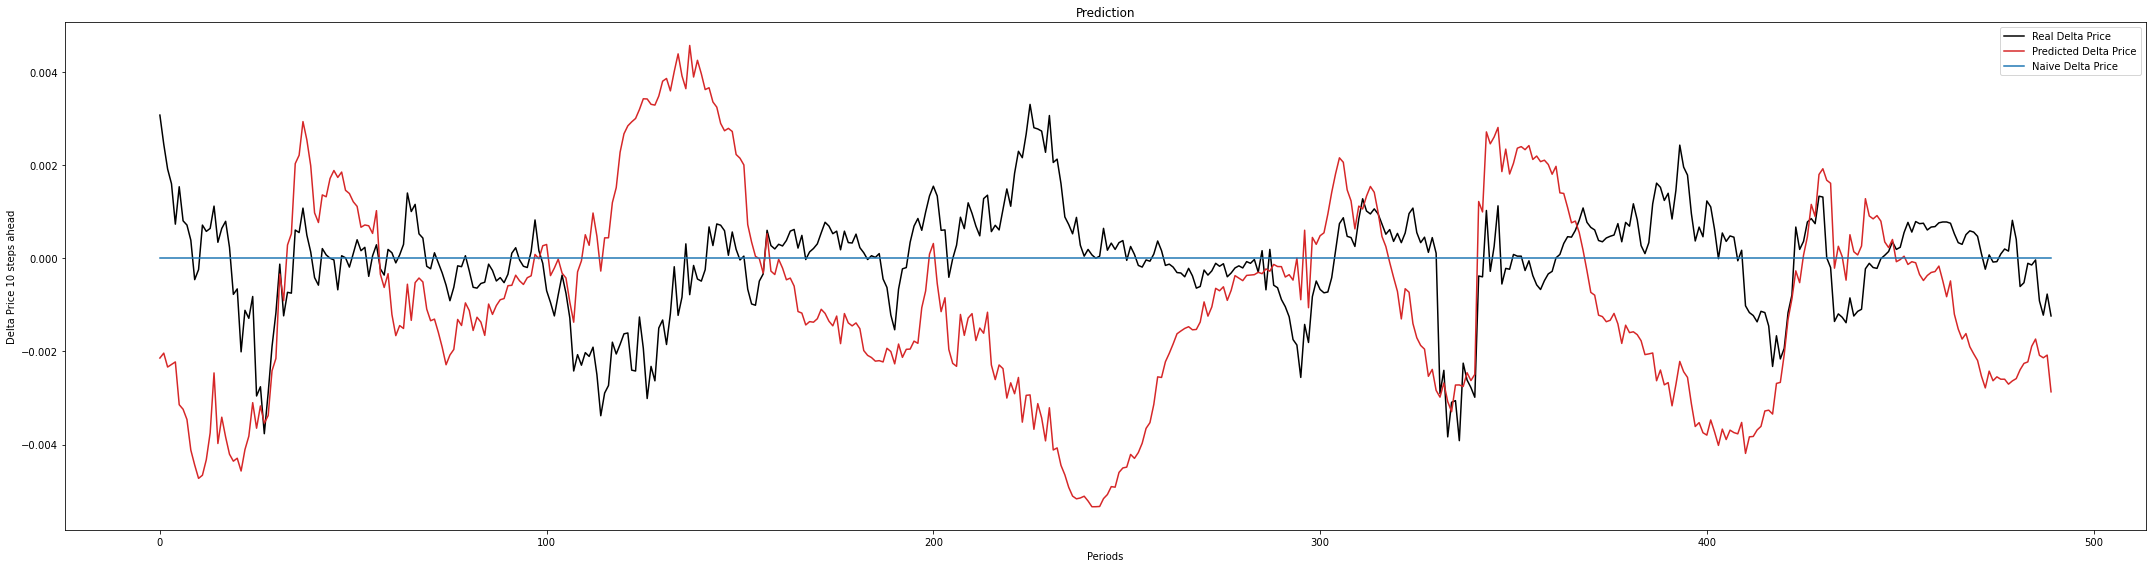

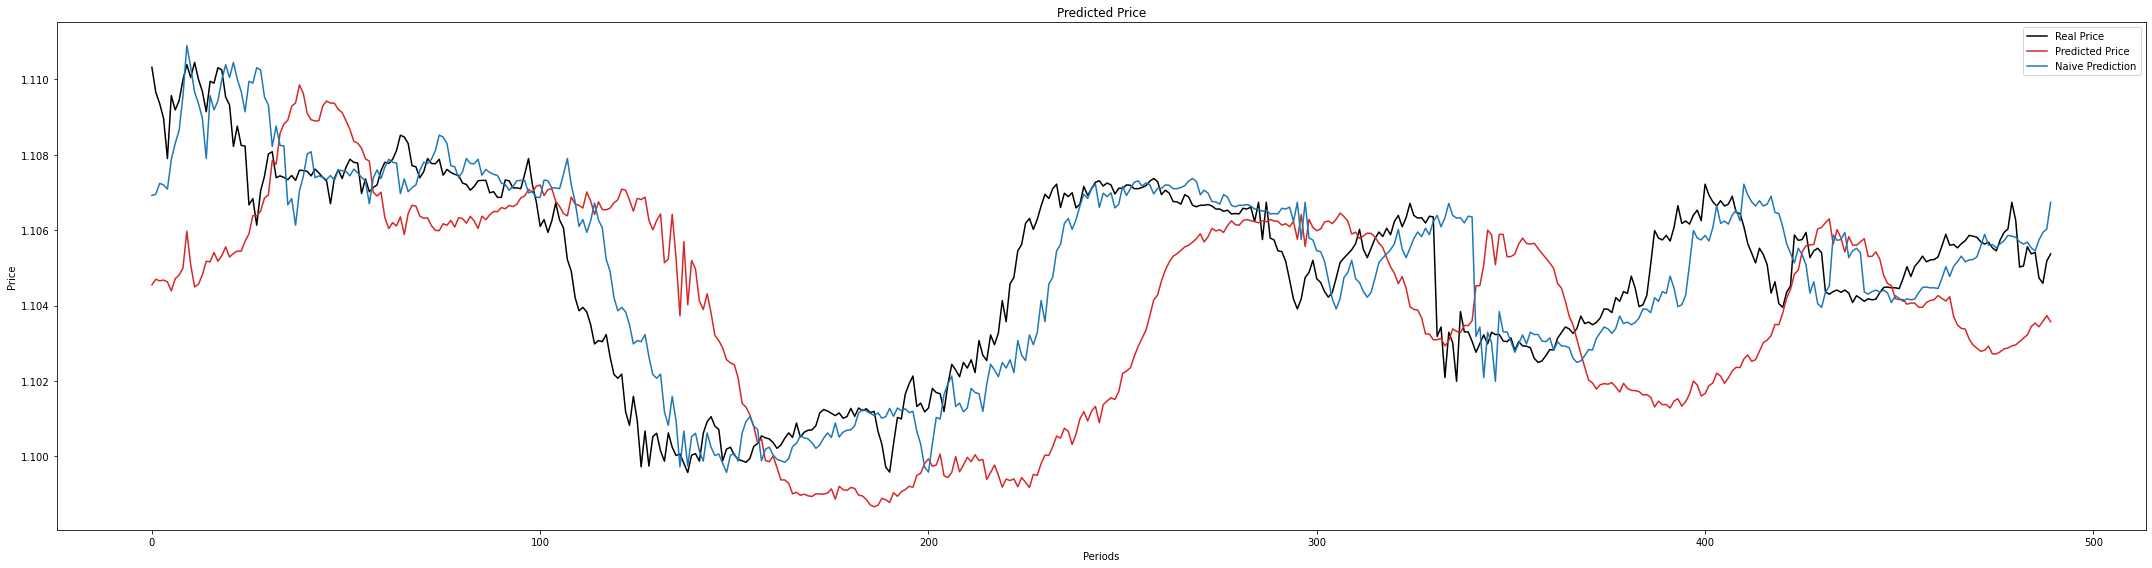

In [33]:
visualize_lstm_results(model, df, k=500)

Test 2:

In [ ]:
output, df, lag, timesteps, features, name_target = transform_data(timesteps=50, lag=10, features=['close','volume'])
train, validation, test, X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(output)
model = run_lstm(layers=5, dropout=0.3, nb_epoch=10, reset_states=True)

MSE Train = 4.3e-06  (MSE Naive Train 1.9e-06)
MSE Validation = 2.9e-06  (MSE Naive Validation 1.1e-06)
MSE Test = 4.2e-06  (MSE Naive Test 2.3e-06)


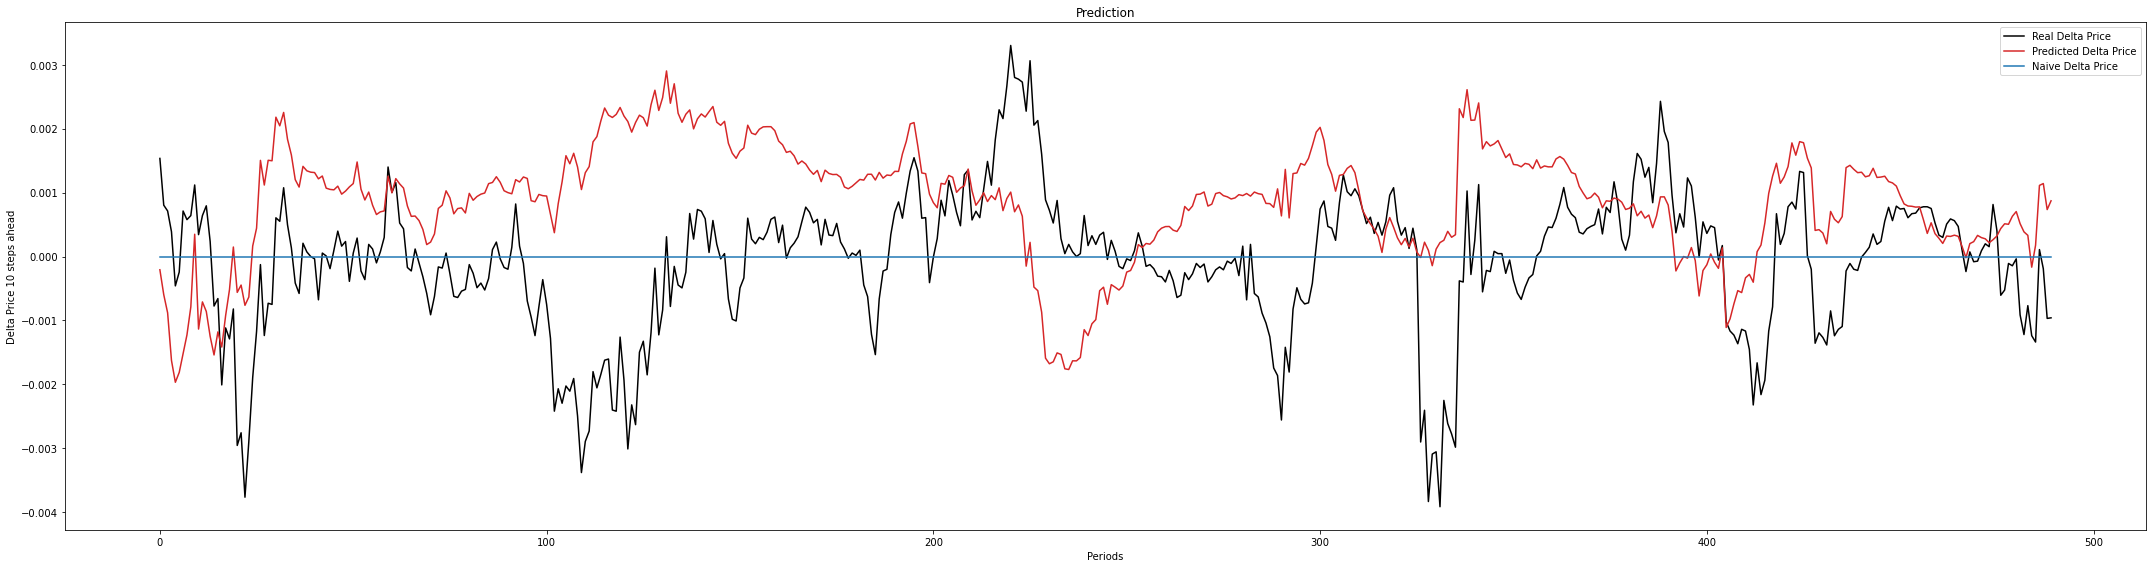

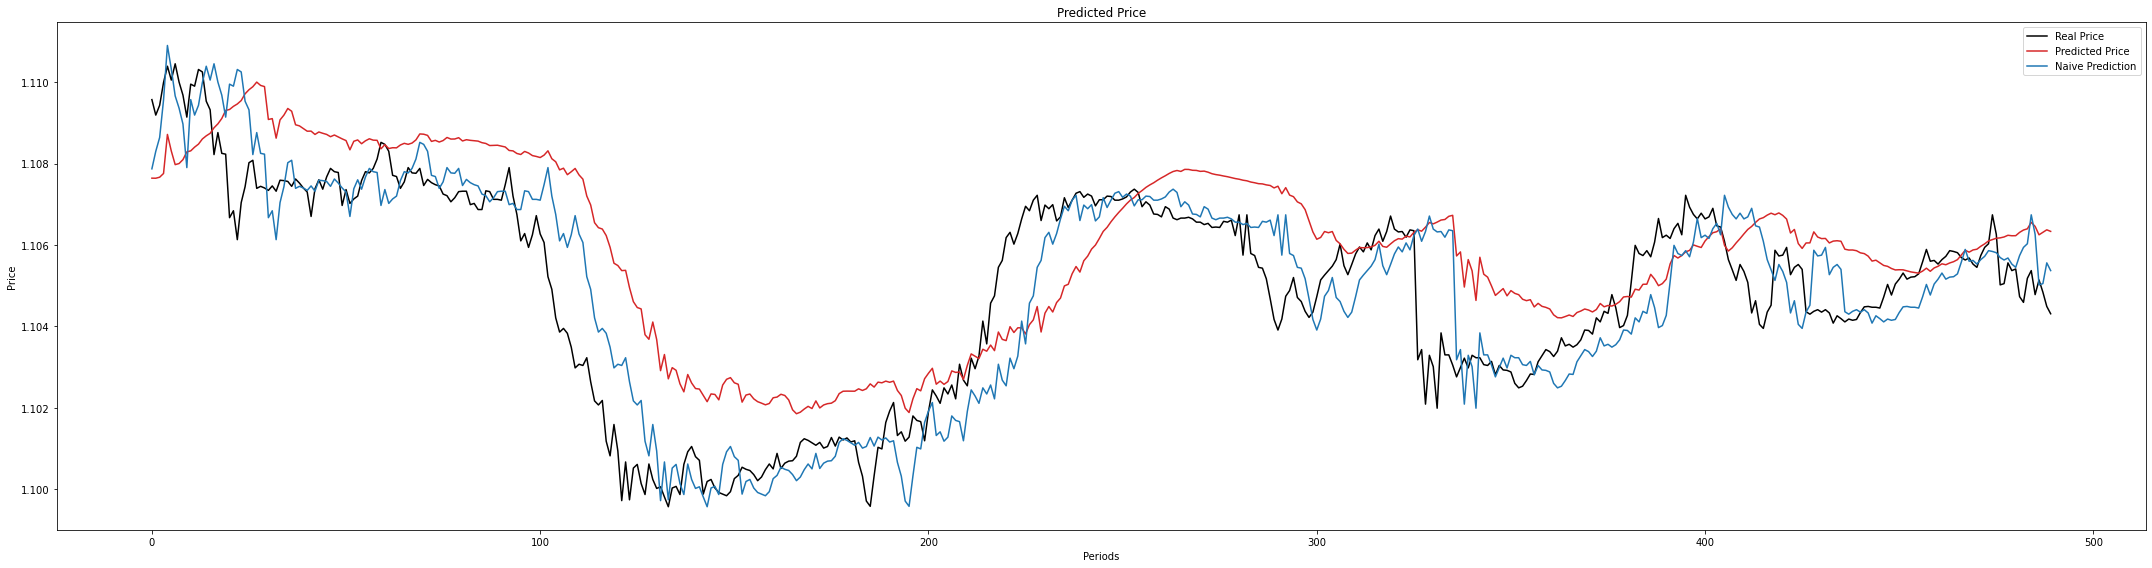

In [13]:
visualize_lstm_results(model, df)